In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models_extended import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = False

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn_permute_val/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp_permute_val/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn_permute_val/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp_permute_val/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[256], [512]]
linear_sizes_list = [[], [512]]
gcn_layers_list = [4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

permute_layer_list = [[], [0], [1], [2], [3], [0,1], [0,1,2], [0,1,2,3], [0,3], [2,3]]
pre_act_permute_gcn_list = [True]
post_act_permute_gcn_list = [False]

#permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn


In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list


#permute
param_combinations["permute_layer_list"] = permute_layer_list
param_combinations["pre_act_permute_gcn_list"] = pre_act_permute_gcn_list
param_combinations["post_act_permute_gcn_list"] = post_act_permute_gcn_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

120


run: 0
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}


[<torch.utils.data.dataset.Subset object at 0x000001555D887BE0>, <torch.utils.data.dataset.Subset object at 0x0000015561A1AD60>, <torch.utils.data.dataset.Subset object at 0x0000015561A20310>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.734383710225424 | Validation Loss 6.1036670207977295
Epoch 10 | Train Loss 2.9556593100229898 | Validation Loss 3.7753454446792603
Epoch 20 | Train Loss 2.292043415705363 | Validation Loss 3.7762291431427
Epoch 30 | Train Loss 1.6382646799087524 | Validation Loss 2.224806308746338
Epoch 40 | Train Loss 1.73412872950236 | Validation Loss 2.1067450642585754
Epoch 50 | Train Loss 1.5907954374949138 | Validation Loss 1.4763473272323608
Epoch 60 | Train Loss 1.240643056233724 | Validation Loss 1.5740119814872742
Epoch 70 | Train Loss 1.127033567428589 | Validation Loss 1.5162034630775452
Epoch 80 | Train Loss 0.9323569178581238 | Validation Loss 1.474427580833435
Epoch 90 | Train Loss 0.8857772707939148 | Validation Loss 1.3734199404716492
Epoch 100 | Train Loss 0.8956142723560333 | Validation Loss 1.568775236606598
Epoch 110 | Train Loss 1.0880476156870524 | Validation Loss 1.4163248538970947
Epoch 120 | Train Loss 0.8607423146565755 | Validation Loss 1.2258290648460

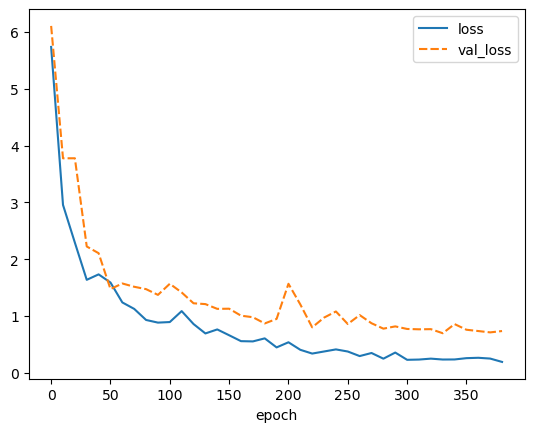

best weights loaded


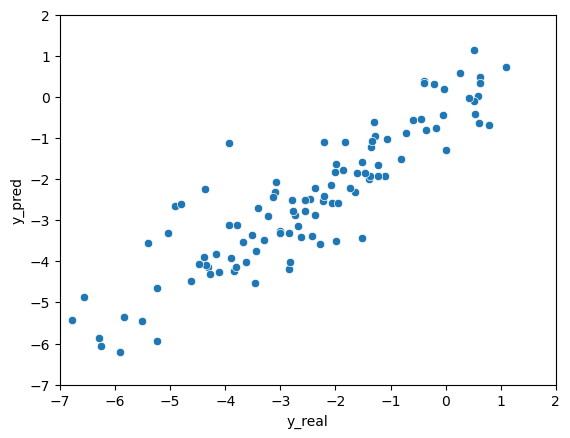

elapsed time: 127.31232905387878
run: 61
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155603F89D0>, <torch.utils.data.dataset.Subset object at 0x00000155D5C46D90>, <torch.utils.data.dataset.Subset object at 0x00000155D5C46F70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.311642615000407 | Validation Loss 5.9306347370147705
Epoch 10 | Train Loss 4.590119457244873 | Validation Loss 5.528141975402832
Epoch 20 | Train Loss 4.027058506011963 | Validation Loss 5.802639007568359
Epoch 30 | Train Loss 3.834997622172038 | Validation Loss 4.959851264953613
Epoch 40 | Train Loss 3.820193894704183 | Validation Loss 4.578416228294373
Epoch 50 | Train Loss 3.4412283579508465 | Validation Loss 5.125252723693848
Epoch 60 | Train Loss 3.315907899538676 | Validation Loss 4.483550429344177
Epoch 70 | Train Loss 3.5535073280334473 | Validation Loss 4.620154857635498
Epoch 80 | Train Loss 3.37111070950826 | Validation Loss 4.310907602310181
Epoch 90 | Train Loss 3.3678391615549725 | Validation Loss 4.363988637924194
Epoch 100 | Train Loss 3.2292458693186443 | Validation Loss 4.50562310218811
Epoch 110 | Train Loss 3.189750162760417 | Validation Loss 3.869376063346863
Epoch 120 | Train Loss 3.010767189661662 | Validation Loss 3.812586784362793
Epoch 1

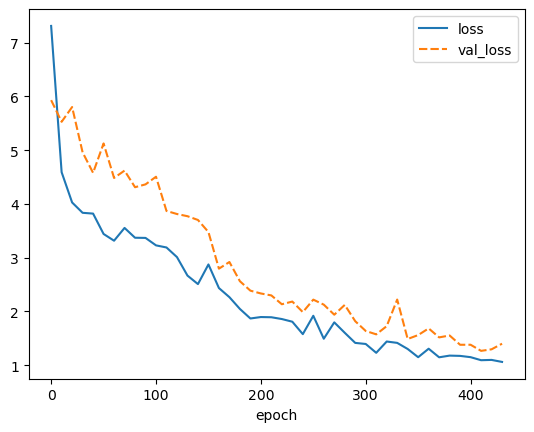

best weights loaded


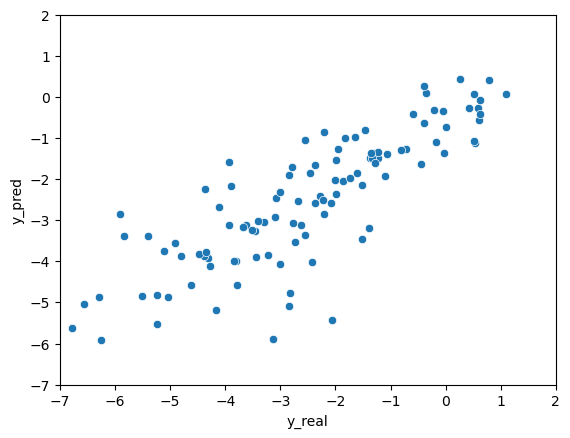

elapsed time: 149.33173871040344
run: 62
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605E5E20>, <torch.utils.data.dataset.Subset object at 0x0000015560557FD0>, <torch.utils.data.dataset.Subset object at 0x0000015560574130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.3140963872273765 | Validation Loss 6.33292031288147
Epoch 10 | Train Loss 3.7467782497406006 | Validation Loss 4.891372442245483
Epoch 20 | Train Loss 3.437754988670349 | Validation Loss 4.471052050590515
Epoch 30 | Train Loss 3.029260285695394 | Validation Loss 3.7852914333343506
Epoch 40 | Train Loss 2.6936839898427327 | Validation Loss 3.026833653450012
Epoch 50 | Train Loss 2.487918821970622 | Validation Loss 2.5327306985855103
Epoch 60 | Train Loss 2.574500632286072 | Validation Loss 2.6637696027755737
Epoch 70 | Train Loss 2.3794054269790648 | Validation Loss 2.5869638323783875
Epoch 80 | Train Loss 1.7589898665746053 | Validation Loss 2.2362643480300903
Epoch 90 | Train Loss 1.6357109308242799 | Validation Loss 2.2722957730293274
Epoch 100 | Train Loss 1.61650706132253 | Validation Loss 2.0496429204940796
Epoch 110 | Train Loss 1.3971844991048177 | Validation Loss 1.5180299282073975
Epoch 120 | Train Loss 1.412173835436503 | Validation Loss 1.6454010605812

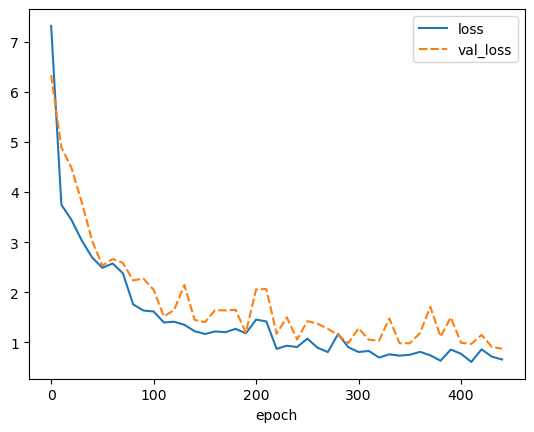

best weights loaded


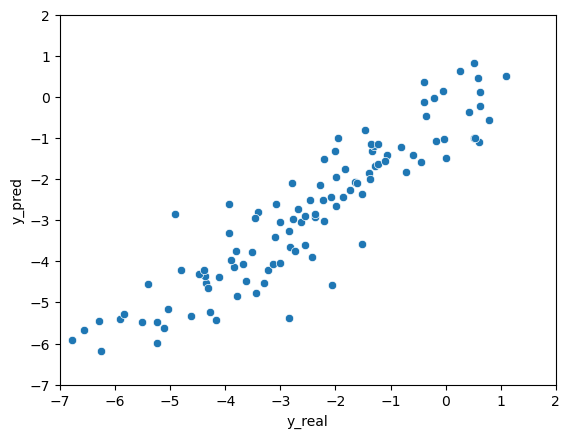

elapsed time: 148.55387473106384
run: 63
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556068FA60>, <torch.utils.data.dataset.Subset object at 0x00000155D7E06C70>, <torch.utils.data.dataset.Subset object at 0x00000155D7E0D1C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.970252895355225 | Validation Loss 6.018920183181763
Epoch 10 | Train Loss 3.612845293680827 | Validation Loss 4.801742792129517
Epoch 20 | Train Loss 3.794881057739258 | Validation Loss 4.233669757843018
Epoch 30 | Train Loss 2.6015934308369952 | Validation Loss 4.07528018951416
Epoch 40 | Train Loss 2.422651195526123 | Validation Loss 3.0710519552230835
Epoch 50 | Train Loss 2.2526684045791625 | Validation Loss 2.9895888566970825
Epoch 60 | Train Loss 1.7311620553334555 | Validation Loss 2.3028215169906616
Epoch 70 | Train Loss 1.714208221435547 | Validation Loss 2.089187443256378
Epoch 80 | Train Loss 1.832184088230133 | Validation Loss 2.5691099166870117
Epoch 90 | Train Loss 1.9559826374053955 | Validation Loss 2.0799039006233215
Epoch 100 | Train Loss 1.6436849315961202 | Validation Loss 2.0104914903640747
Epoch 110 | Train Loss 1.5885588645935058 | Validation Loss 1.7083115577697754
Epoch 120 | Train Loss 1.5954352378845216 | Validation Loss 2.2076661586761

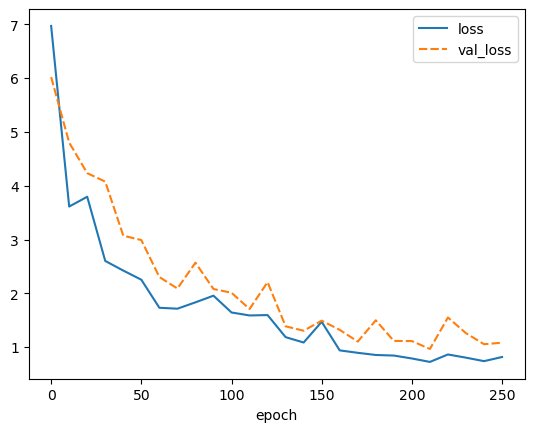

best weights loaded


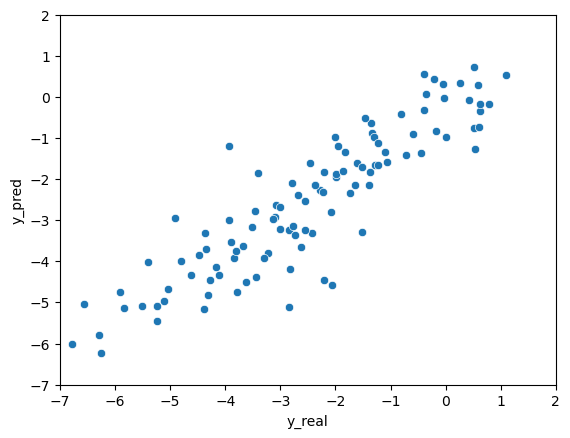

elapsed time: 91.3292543888092
run: 64
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556072BB80>, <torch.utils.data.dataset.Subset object at 0x00000155D7F3D220>, <torch.utils.data.dataset.Subset object at 0x00000155D7F3DD00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.444952487945557 | Validation Loss 5.750041961669922
Epoch 10 | Train Loss 4.0191858291625975 | Validation Loss 5.049226760864258
Epoch 20 | Train Loss 3.498694388071696 | Validation Loss 3.8295613527297974
Epoch 30 | Train Loss 2.7527370929718016 | Validation Loss 3.886260151863098
Epoch 40 | Train Loss 1.9927082459131877 | Validation Loss 2.5105332136154175
Epoch 50 | Train Loss 1.8188304583231607 | Validation Loss 2.141568183898926
Epoch 60 | Train Loss 1.5815074761708579 | Validation Loss 1.7562442421913147
Epoch 70 | Train Loss 1.7031776666641236 | Validation Loss 2.1615750789642334
Epoch 80 | Train Loss 1.364902170499166 | Validation Loss 1.7975817322731018
Epoch 90 | Train Loss 1.3142589648564658 | Validation Loss 1.7940441966056824
Epoch 100 | Train Loss 1.1648832122484842 | Validation Loss 1.4379522800445557
Epoch 110 | Train Loss 1.102903429667155 | Validation Loss 1.3786448240280151
Epoch 120 | Train Loss 1.0898230026165645 | Validation Loss 1.386468589

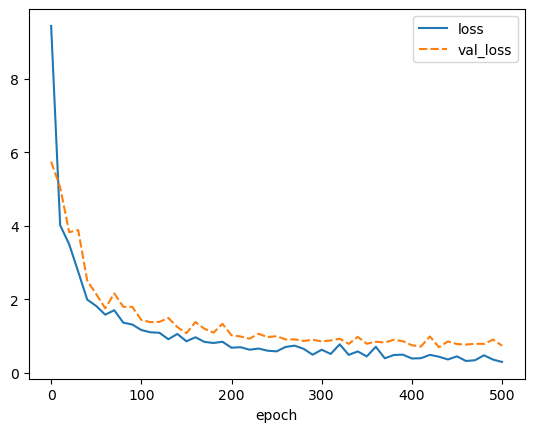

best weights loaded


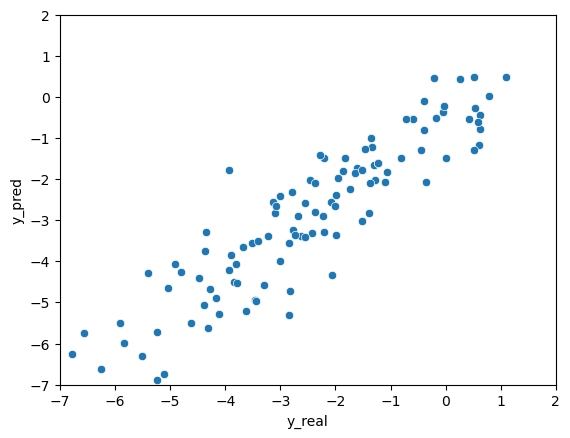

elapsed time: 176.0181348323822
run: 65
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155606B1670>, <torch.utils.data.dataset.Subset object at 0x00000155619CDFD0>, <torch.utils.data.dataset.Subset object at 0x0000015560565550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.889367707570394 | Validation Loss 5.5072479248046875
Epoch 10 | Train Loss 4.712026437123616 | Validation Loss 5.491226434707642
Epoch 20 | Train Loss 4.080617507298787 | Validation Loss 5.346127033233643
Epoch 30 | Train Loss 3.952067263921102 | Validation Loss 4.952662229537964
Epoch 40 | Train Loss 3.8197722593943277 | Validation Loss 4.772549867630005
Epoch 50 | Train Loss 3.54302609761556 | Validation Loss 4.894329309463501
Epoch 60 | Train Loss 3.498908440272013 | Validation Loss 4.882523775100708
Epoch 70 | Train Loss 3.307339249054591 | Validation Loss 4.410963773727417
Epoch 80 | Train Loss 3.157862643400828 | Validation Loss 4.254169344902039
Epoch 90 | Train Loss 3.1452524662017822 | Validation Loss 4.183967113494873
Epoch 100 | Train Loss 3.035494661331177 | Validation Loss 4.293179512023926
Epoch 110 | Train Loss 2.9937719980875652 | Validation Loss 3.697643518447876
Epoch 120 | Train Loss 2.5787113269170123 | Validation Loss 3.4837602376937866
Epoch

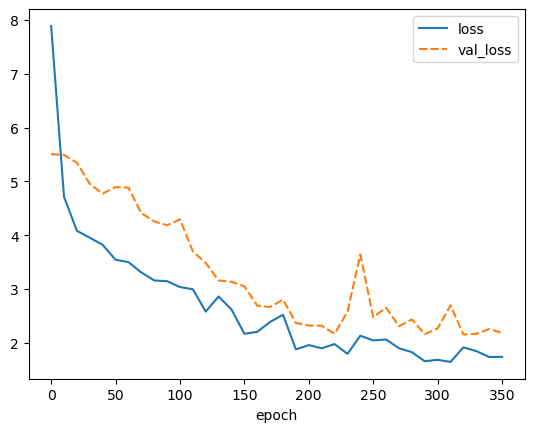

best weights loaded


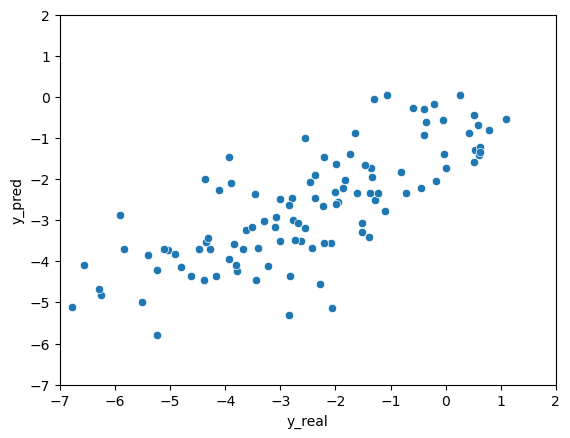

elapsed time: 146.57034468650818
run: 66
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155617F0340>, <torch.utils.data.dataset.Subset object at 0x00000155D5D60B50>, <torch.utils.data.dataset.Subset object at 0x00000155D5D660A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.46285638809204 | Validation Loss 6.118673801422119
Epoch 10 | Train Loss 4.1585697094599405 | Validation Loss 5.497368574142456
Epoch 20 | Train Loss 4.92877893447876 | Validation Loss 5.292348384857178
Epoch 30 | Train Loss 4.224699592590332 | Validation Loss 5.808564901351929
Epoch 40 | Train Loss 3.8984928766886395 | Validation Loss 5.244480609893799
Epoch 50 | Train Loss 3.5273839712142943 | Validation Loss 4.5406107902526855
Epoch 60 | Train Loss 3.9957494576772055 | Validation Loss 4.41744339466095
Epoch 70 | Train Loss 3.3694697539011638 | Validation Loss 4.942325830459595
Epoch 80 | Train Loss 3.3175210773944857 | Validation Loss 4.606015682220459
Epoch 90 | Train Loss 3.7282438119252523 | Validation Loss 4.0546510219573975
Epoch 100 | Train Loss 2.9888044516245524 | Validation Loss 4.4237353801727295
Epoch 110 | Train Loss 2.8482733170191445 | Validation Loss 3.3928165435791016
Epoch 120 | Train Loss 2.607476528485616 | Validation Loss 4.196017265319824


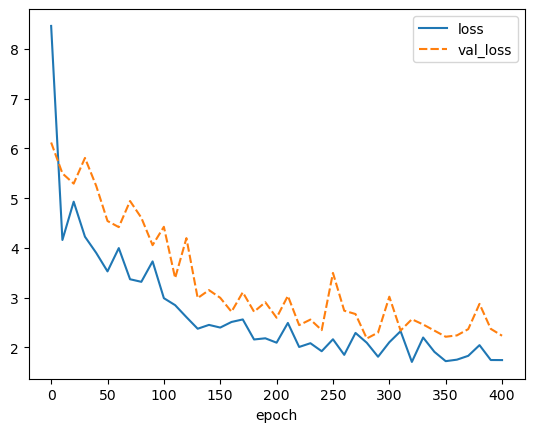

best weights loaded


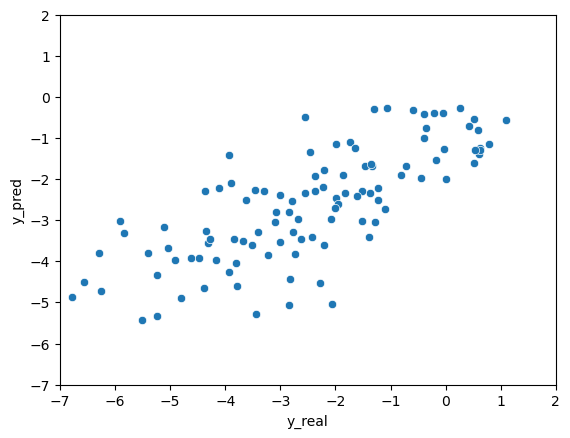

elapsed time: 176.7116734981537
run: 67
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155606D0C40>, <torch.utils.data.dataset.Subset object at 0x00000155605C7A60>, <torch.utils.data.dataset.Subset object at 0x0000015560568070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.635873508453368 | Validation Loss 10.746824741363525
Epoch 10 | Train Loss 4.29056749343872 | Validation Loss 5.872544527053833
Epoch 20 | Train Loss 4.153921175003052 | Validation Loss 5.375874280929565
Epoch 30 | Train Loss 4.32740216255188 | Validation Loss 4.988015651702881
Epoch 40 | Train Loss 4.184009329477946 | Validation Loss 4.733975648880005
Epoch 50 | Train Loss 4.027591562271118 | Validation Loss 4.717211008071899
Epoch 60 | Train Loss 3.545464102427165 | Validation Loss 5.555937051773071
Epoch 70 | Train Loss 3.535626220703125 | Validation Loss 5.505047798156738
Epoch 80 | Train Loss 3.6065738995869956 | Validation Loss 4.990467309951782
Epoch 90 | Train Loss 3.389929246902466 | Validation Loss 4.978929281234741
Epoch 100 | Train Loss 3.129371706644694 | Validation Loss 4.118932008743286
Epoch 110 | Train Loss 3.2620795567830405 | Validation Loss 3.6123799085617065
Epoch 120 | Train Loss 2.893700647354126 | Validation Loss 3.5398242473602295
Epoch 

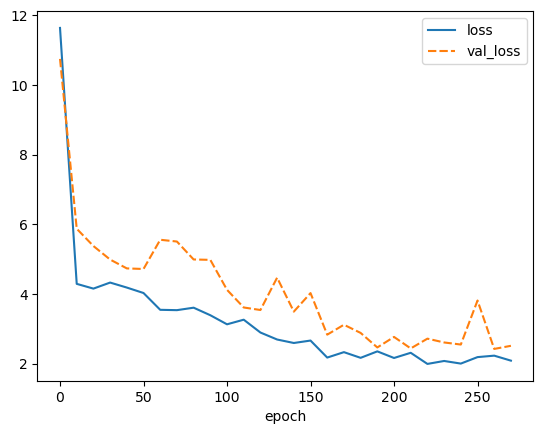

best weights loaded


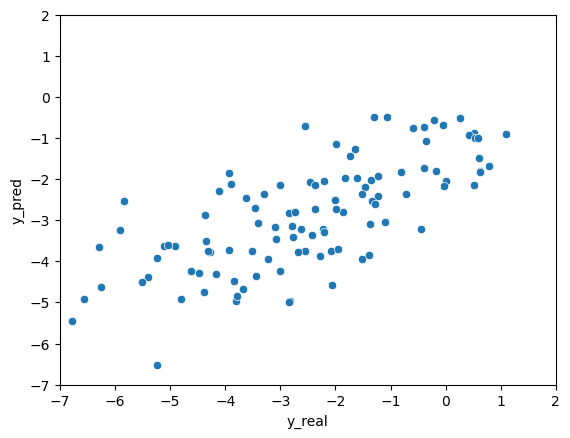

elapsed time: 132.4243564605713
run: 68
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556075ECD0>, <torch.utils.data.dataset.Subset object at 0x000001551900EAC0>, <torch.utils.data.dataset.Subset object at 0x000001551900EE80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.513746150334676 | Validation Loss 5.709606647491455
Epoch 10 | Train Loss 4.891689348220825 | Validation Loss 5.480337858200073
Epoch 20 | Train Loss 5.175573492050171 | Validation Loss 5.219248533248901
Epoch 30 | Train Loss 3.7459524313608807 | Validation Loss 5.388049125671387
Epoch 40 | Train Loss 3.8516422112782798 | Validation Loss 4.9228668212890625
Epoch 50 | Train Loss 3.790255657831828 | Validation Loss 4.678386807441711
Epoch 60 | Train Loss 3.6051242351531982 | Validation Loss 4.771919012069702
Epoch 70 | Train Loss 3.7449013233184814 | Validation Loss 4.537781476974487
Epoch 80 | Train Loss 3.6615821679433185 | Validation Loss 4.410143852233887
Epoch 90 | Train Loss 3.4897756735483805 | Validation Loss 4.32756781578064
Epoch 100 | Train Loss 3.3779143651326495 | Validation Loss 4.10359787940979
Epoch 110 | Train Loss 3.0534924507141112 | Validation Loss 4.305729866027832
Epoch 120 | Train Loss 2.9897403875986734 | Validation Loss 3.770722985267639
Ep

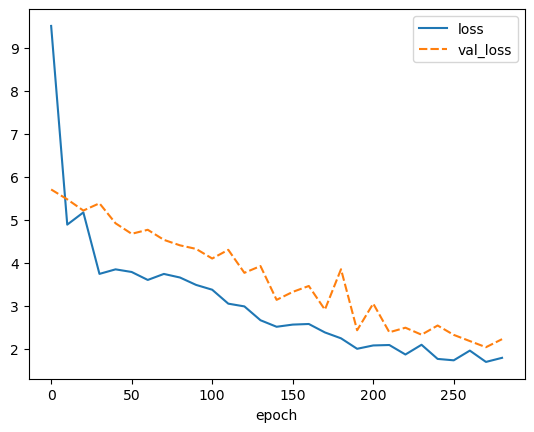

best weights loaded


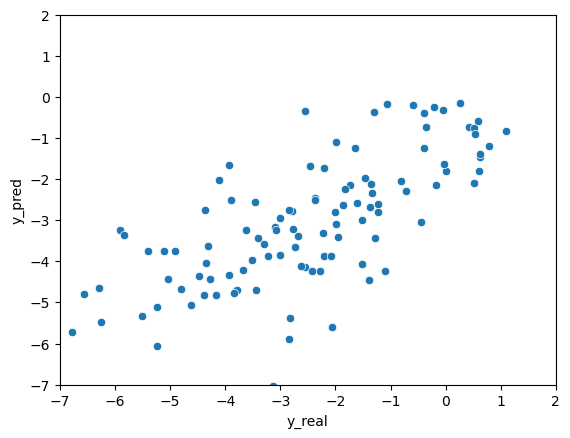

elapsed time: 115.17145490646362
run: 69
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015559FD7670>, <torch.utils.data.dataset.Subset object at 0x00000155605234C0>, <torch.utils.data.dataset.Subset object at 0x0000015560523D00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.701154804229736 | Validation Loss 7.514283657073975
Epoch 10 | Train Loss 3.954290008544922 | Validation Loss 5.111244440078735
Epoch 20 | Train Loss 3.2716007073720297 | Validation Loss 4.241041541099548
Epoch 30 | Train Loss 2.8947076638539633 | Validation Loss 3.247934579849243
Epoch 40 | Train Loss 2.814038562774658 | Validation Loss 2.927382230758667
Epoch 50 | Train Loss 2.0309441328048705 | Validation Loss 2.820194959640503
Epoch 60 | Train Loss 2.1440852681795755 | Validation Loss 1.979793131351471
Epoch 70 | Train Loss 1.8563571612040202 | Validation Loss 2.1978054642677307
Epoch 80 | Train Loss 1.5634726285934448 | Validation Loss 1.7148415446281433
Epoch 90 | Train Loss 1.5102335532506308 | Validation Loss 2.4232184886932373
Epoch 100 | Train Loss 1.4684584339459736 | Validation Loss 1.595681220293045
Epoch 110 | Train Loss 1.2694990595181783 | Validation Loss 1.8159440755844116
Epoch 120 | Train Loss 1.5051487048467 | Validation Loss 1.56282961368560

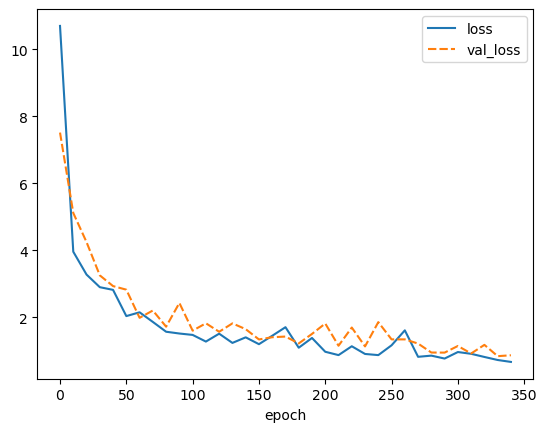

best weights loaded


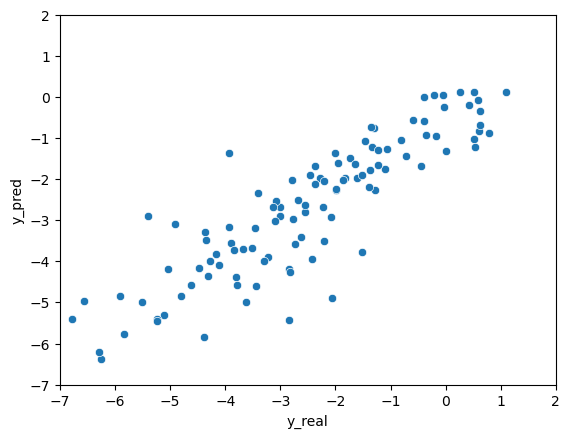

elapsed time: 146.34133577346802
run: 70
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155618ACBE0>, <torch.utils.data.dataset.Subset object at 0x00000155D5D0F6A0>, <torch.utils.data.dataset.Subset object at 0x00000155D5D0FD00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.897620423634847 | Validation Loss 5.86558985710144
Epoch 10 | Train Loss 3.458145189285278 | Validation Loss 4.293811798095703
Epoch 20 | Train Loss 3.1656335830688476 | Validation Loss 3.639625668525696
Epoch 30 | Train Loss 2.106105335553487 | Validation Loss 2.873536705970764
Epoch 40 | Train Loss 1.893926445643107 | Validation Loss 2.126305341720581
Epoch 50 | Train Loss 1.8252794027328492 | Validation Loss 2.062902092933655
Epoch 60 | Train Loss 1.448427641391754 | Validation Loss 1.7246273756027222
Epoch 70 | Train Loss 1.195270331700643 | Validation Loss 1.7480677366256714
Epoch 80 | Train Loss 1.2894157687822978 | Validation Loss 1.7220726013183594
Epoch 90 | Train Loss 1.1546300570170085 | Validation Loss 1.6039298176765442
Epoch 100 | Train Loss 1.1053878545761109 | Validation Loss 1.495361566543579
Epoch 110 | Train Loss 1.0783195773760477 | Validation Loss 1.3328892588615417
Epoch 120 | Train Loss 2.2865957101186116 | Validation Loss 2.455111145973205

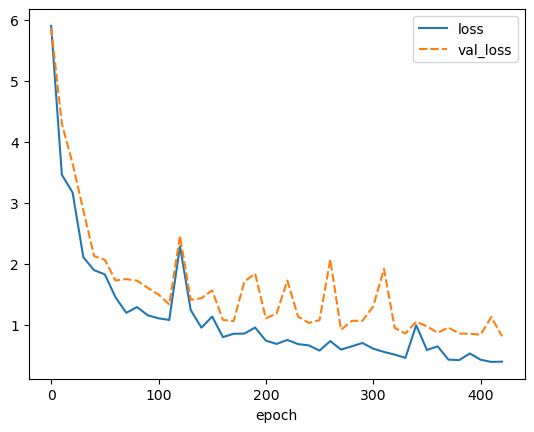

best weights loaded


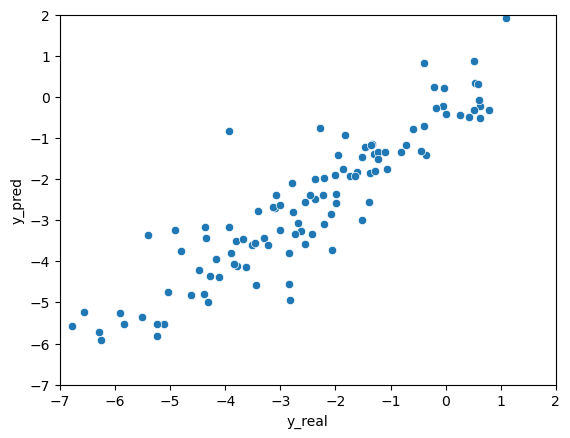

elapsed time: 149.7518401145935
run: 71
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605F7F70>, <torch.utils.data.dataset.Subset object at 0x0000015560457490>, <torch.utils.data.dataset.Subset object at 0x0000015560457B50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.852462100982666 | Validation Loss 5.822173833847046
Epoch 10 | Train Loss 4.229373900095622 | Validation Loss 5.625410079956055
Epoch 20 | Train Loss 4.222654740015666 | Validation Loss 5.713449954986572
Epoch 30 | Train Loss 3.84694619178772 | Validation Loss 4.825283527374268
Epoch 40 | Train Loss 4.486886215209961 | Validation Loss 4.960068464279175
Epoch 50 | Train Loss 3.6296314080556233 | Validation Loss 5.0663145780563354
Epoch 60 | Train Loss 3.6170520782470703 | Validation Loss 4.815716981887817
Epoch 70 | Train Loss 3.7287104447682697 | Validation Loss 4.724324345588684
Epoch 80 | Train Loss 3.812399419148763 | Validation Loss 4.910595774650574
Epoch 90 | Train Loss 3.468734073638916 | Validation Loss 4.437753677368164
Epoch 100 | Train Loss 3.379977480570475 | Validation Loss 4.2827489376068115
Epoch 110 | Train Loss 3.415592813491821 | Validation Loss 4.3230836391448975
Epoch 120 | Train Loss 3.0686936378479004 | Validation Loss 3.843186378479004
Epoc

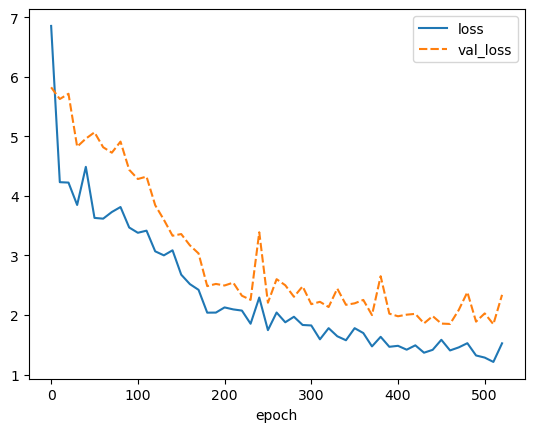

best weights loaded


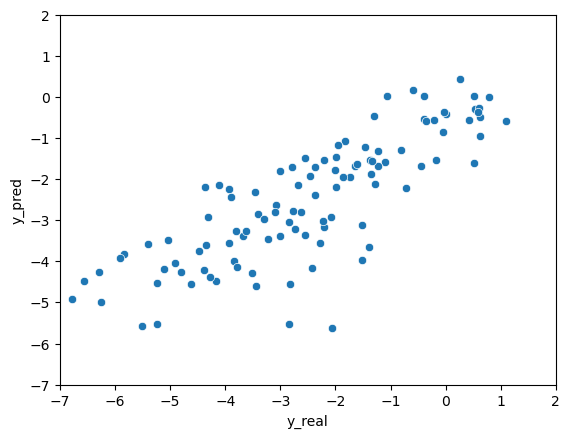

elapsed time: 194.902925491333
run: 72
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155617E42E0>, <torch.utils.data.dataset.Subset object at 0x00000155D7DF8700>, <torch.utils.data.dataset.Subset object at 0x00000155D7DF8C10>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.064695533116659 | Validation Loss 5.734260559082031
Epoch 10 | Train Loss 4.095005702972412 | Validation Loss 5.36452841758728
Epoch 20 | Train Loss 3.717281627655029 | Validation Loss 4.929356098175049
Epoch 30 | Train Loss 3.6393656889597574 | Validation Loss 4.464386940002441
Epoch 40 | Train Loss 3.0055254260698954 | Validation Loss 3.798895001411438
Epoch 50 | Train Loss 2.72672815322876 | Validation Loss 3.3420727252960205
Epoch 60 | Train Loss 2.457697598139445 | Validation Loss 2.8597851991653442
Epoch 70 | Train Loss 2.021115533510844 | Validation Loss 2.7161589860916138
Epoch 80 | Train Loss 2.2382534901301065 | Validation Loss 2.466542363166809
Epoch 90 | Train Loss 2.576770861943563 | Validation Loss 2.922564387321472
Epoch 100 | Train Loss 2.106568177541097 | Validation Loss 2.1742740869522095
Epoch 110 | Train Loss 1.602906099955241 | Validation Loss 2.0037350058555603
Epoch 120 | Train Loss 1.6641780098279317 | Validation Loss 1.8608121275901794
Ep

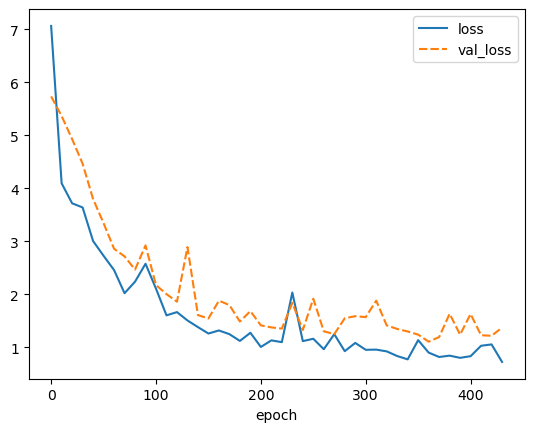

best weights loaded


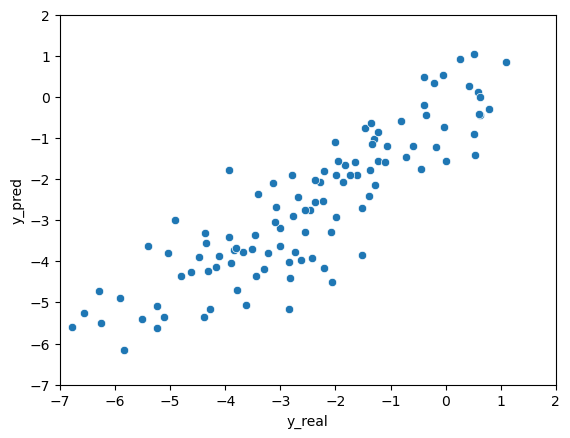

elapsed time: 152.25739073753357
run: 73
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155604CD100>, <torch.utils.data.dataset.Subset object at 0x0000015560472040>, <torch.utils.data.dataset.Subset object at 0x0000015560472EB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.770178000132243 | Validation Loss 5.858571767807007
Epoch 10 | Train Loss 3.650269556045532 | Validation Loss 4.693648815155029
Epoch 20 | Train Loss 3.271791195869446 | Validation Loss 4.178150653839111
Epoch 30 | Train Loss 3.527095063527425 | Validation Loss 4.097099542617798
Epoch 40 | Train Loss 2.5151230732599896 | Validation Loss 2.968532681465149
Epoch 50 | Train Loss 1.930536429087321 | Validation Loss 2.279882073402405
Epoch 60 | Train Loss 1.5428956985473632 | Validation Loss 2.128877282142639
Epoch 70 | Train Loss 1.4932725071907043 | Validation Loss 1.976973056793213
Epoch 80 | Train Loss 1.6235577503840128 | Validation Loss 2.0992534160614014
Epoch 90 | Train Loss 2.6696492115656536 | Validation Loss 1.9460172653198242
Epoch 100 | Train Loss 1.5382686376571655 | Validation Loss 2.8440414667129517
Epoch 110 | Train Loss 1.168909239768982 | Validation Loss 1.8086578249931335
Epoch 120 | Train Loss 1.251729432741801 | Validation Loss 1.5822060108184814

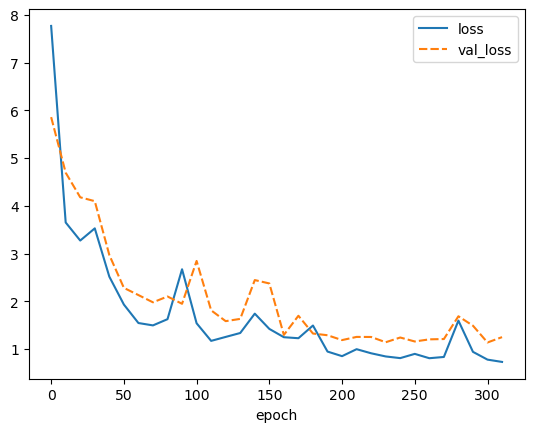

best weights loaded


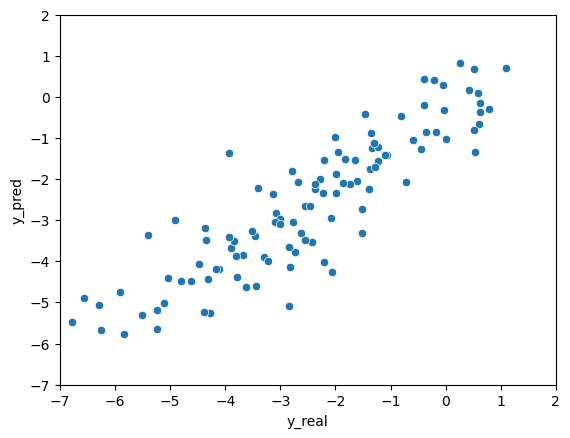

elapsed time: 109.3025872707367
run: 74
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605149A0>, <torch.utils.data.dataset.Subset object at 0x0000015516D80730>, <torch.utils.data.dataset.Subset object at 0x0000015516D80C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 11.530029678344727 | Validation Loss 9.152021884918213
Epoch 10 | Train Loss 3.778264061609904 | Validation Loss 5.031294345855713
Epoch 20 | Train Loss 3.712357425689697 | Validation Loss 4.6635565757751465
Epoch 30 | Train Loss 3.4484742482503257 | Validation Loss 4.50993275642395
Epoch 40 | Train Loss 3.3402071634928387 | Validation Loss 3.4580888748168945
Epoch 50 | Train Loss 2.3249865929285685 | Validation Loss 2.7976475954055786
Epoch 60 | Train Loss 1.9651574889818828 | Validation Loss 2.6681710481643677
Epoch 70 | Train Loss 2.4130627314249673 | Validation Loss 2.328143000602722
Epoch 80 | Train Loss 1.6735649744669596 | Validation Loss 1.9990893602371216
Epoch 90 | Train Loss 1.6093022664388021 | Validation Loss 1.945541799068451
Epoch 100 | Train Loss 1.648378880818685 | Validation Loss 1.7446839213371277
Epoch 110 | Train Loss 1.61106538772583 | Validation Loss 1.8965363502502441
Epoch 120 | Train Loss 1.257297690709432 | Validation Loss 1.8072149753570

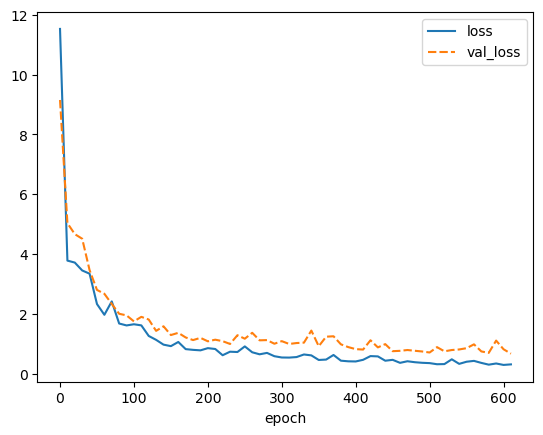

best weights loaded


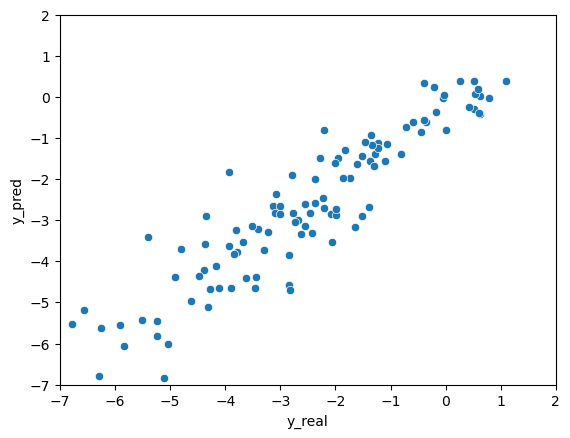

elapsed time: 189.6481420993805
run: 75
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155191A8400>, <torch.utils.data.dataset.Subset object at 0x00000155619A34C0>, <torch.utils.data.dataset.Subset object at 0x00000155619A3040>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.681566143035889 | Validation Loss 6.634400367736816
Epoch 10 | Train Loss 4.2669789552688595 | Validation Loss 5.666996002197266
Epoch 20 | Train Loss 3.9272945960362753 | Validation Loss 5.567001581192017
Epoch 30 | Train Loss 4.101167662938436 | Validation Loss 5.0076069831848145
Epoch 40 | Train Loss 3.7092945257822674 | Validation Loss 5.052580833435059
Epoch 50 | Train Loss 3.88040984471639 | Validation Loss 5.359527349472046
Epoch 60 | Train Loss 3.6829699834187823 | Validation Loss 4.658873081207275
Epoch 70 | Train Loss 3.5054887930552163 | Validation Loss 5.02114725112915
Epoch 80 | Train Loss 3.6424968083699545 | Validation Loss 4.973179578781128
Epoch 90 | Train Loss 3.333440097173055 | Validation Loss 4.390209913253784
Epoch 100 | Train Loss 3.389225689570109 | Validation Loss 4.091244697570801
Epoch 110 | Train Loss 2.8610549608866376 | Validation Loss 3.583674430847168
Epoch 120 | Train Loss 2.81180837949117 | Validation Loss 3.3039093017578125
Epoc

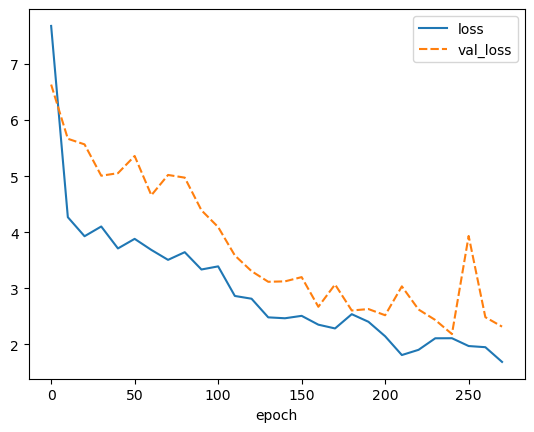

best weights loaded


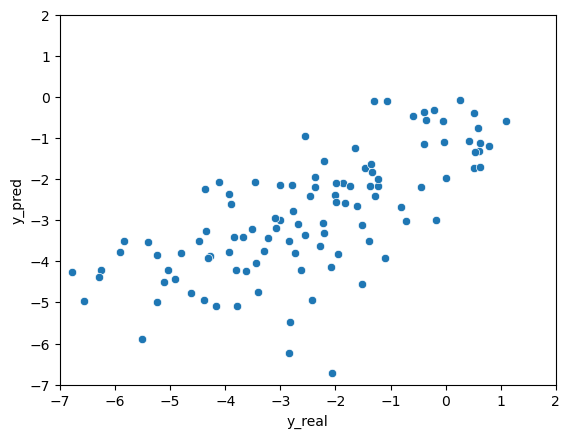

elapsed time: 94.65483379364014
run: 76
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556070D7C0>, <torch.utils.data.dataset.Subset object at 0x00000155D5D15850>, <torch.utils.data.dataset.Subset object at 0x00000155D5D159D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.541896073023478 | Validation Loss 6.002488613128662
Epoch 10 | Train Loss 4.658410437901815 | Validation Loss 5.805740833282471
Epoch 20 | Train Loss 4.069694439570109 | Validation Loss 5.520703554153442
Epoch 30 | Train Loss 4.054487784703572 | Validation Loss 6.109462261199951
Epoch 40 | Train Loss 3.878501574198405 | Validation Loss 4.9042582511901855
Epoch 50 | Train Loss 3.907057348887126 | Validation Loss 5.3007590770721436
Epoch 60 | Train Loss 4.264487393697103 | Validation Loss 4.948984861373901
Epoch 70 | Train Loss 3.8042745272318523 | Validation Loss 4.507875323295593
Epoch 80 | Train Loss 3.946768856048584 | Validation Loss 4.789106369018555
Epoch 90 | Train Loss 3.345727221171061 | Validation Loss 4.9675880670547485
Epoch 100 | Train Loss 3.2099509874979657 | Validation Loss 4.582708358764648
Epoch 110 | Train Loss 3.4175417105356853 | Validation Loss 3.960379481315613
Epoch 120 | Train Loss 3.2260952313741047 | Validation Loss 3.8767881393432617
Ep

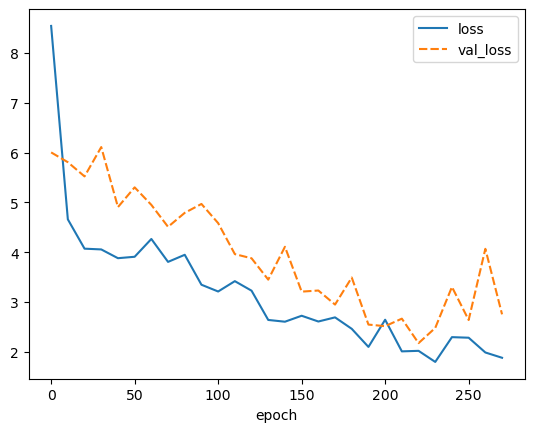

best weights loaded


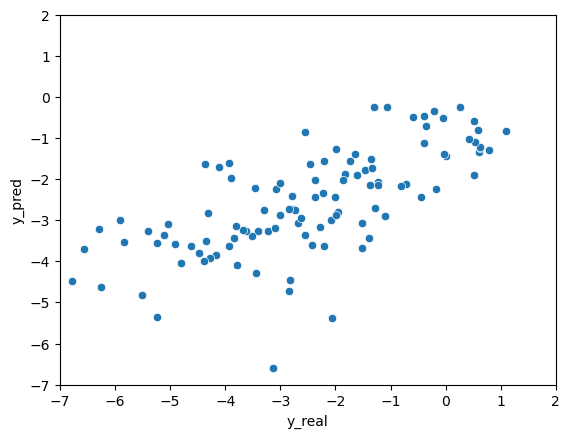

elapsed time: 100.60138940811157
run: 77
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561820CD0>, <torch.utils.data.dataset.Subset object at 0x00000155D7EB3340>, <torch.utils.data.dataset.Subset object at 0x00000155D7EB3850>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.885584290822347 | Validation Loss 14.163664817810059
Epoch 10 | Train Loss 4.634815756479899 | Validation Loss 5.717038869857788
Epoch 20 | Train Loss 4.059565703074138 | Validation Loss 5.5584189891815186
Epoch 30 | Train Loss 3.9909196217854817 | Validation Loss 4.884061694145203
Epoch 40 | Train Loss 3.770597298940023 | Validation Loss 6.550017833709717
Epoch 50 | Train Loss 3.6267865022023518 | Validation Loss 4.811376333236694
Epoch 60 | Train Loss 3.6482713143030803 | Validation Loss 4.834857225418091
Epoch 70 | Train Loss 3.576834201812744 | Validation Loss 4.471478462219238
Epoch 80 | Train Loss 3.539398447672526 | Validation Loss 4.449890851974487
Epoch 90 | Train Loss 3.438235791524251 | Validation Loss 4.324926018714905
Epoch 100 | Train Loss 3.341855001449585 | Validation Loss 4.003019571304321
Epoch 110 | Train Loss 2.9672608216603598 | Validation Loss 3.8937689065933228
Epoch 120 | Train Loss 3.115401299794515 | Validation Loss 3.4117642641067505
E

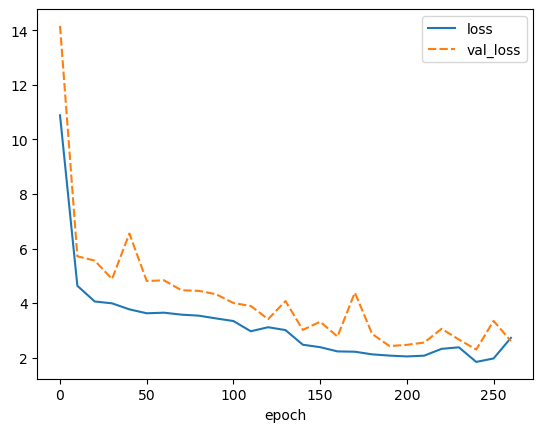

best weights loaded


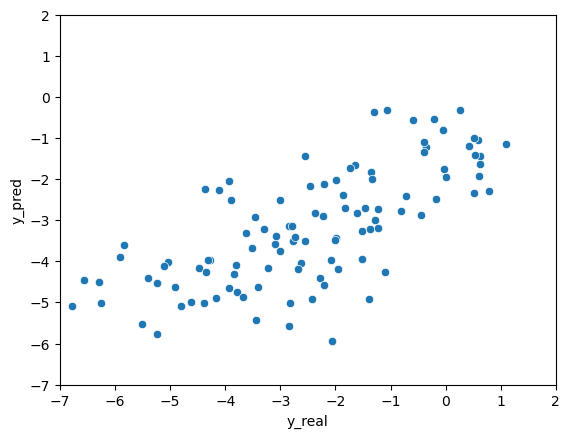

elapsed time: 106.1605155467987
run: 78
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5AD8CA0>, <torch.utils.data.dataset.Subset object at 0x00000155D5AACCA0>, <torch.utils.data.dataset.Subset object at 0x00000155D5AAC340>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 12.998769696553548 | Validation Loss 12.771152019500732
Epoch 10 | Train Loss 4.164025290807088 | Validation Loss 5.342116832733154
Epoch 20 | Train Loss 4.037717835108439 | Validation Loss 5.5500640869140625
Epoch 30 | Train Loss 4.127880223592123 | Validation Loss 5.083849191665649
Epoch 40 | Train Loss 3.956740713119507 | Validation Loss 5.113915205001831
Epoch 50 | Train Loss 4.059708563486735 | Validation Loss 5.049741506576538
Epoch 60 | Train Loss 3.5030673265457155 | Validation Loss 5.0981996059417725
Epoch 70 | Train Loss 3.880031188329061 | Validation Loss 4.7220635414123535
Epoch 80 | Train Loss 3.4908811410268146 | Validation Loss 4.860984802246094
Epoch 90 | Train Loss 3.2810383558273317 | Validation Loss 4.527804255485535
Epoch 100 | Train Loss 3.5127877871195476 | Validation Loss 4.124280214309692
Epoch 110 | Train Loss 3.1841832796732583 | Validation Loss 4.199419021606445
Epoch 120 | Train Loss 3.058000167210897 | Validation Loss 3.8436379432678223

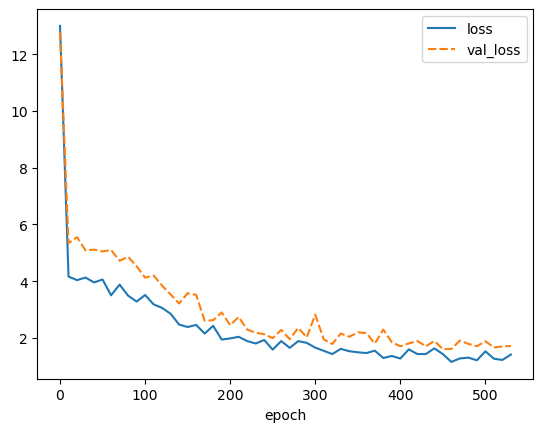

best weights loaded


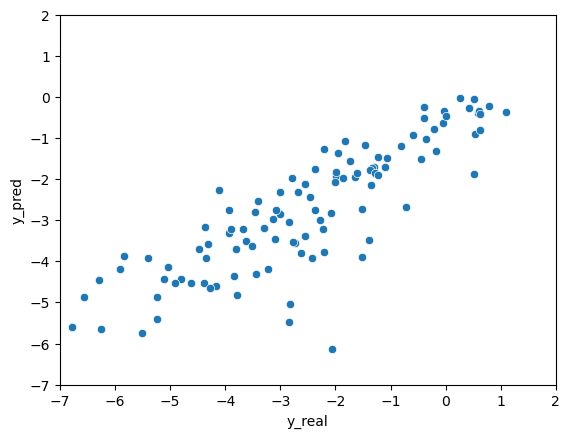

elapsed time: 179.9997525215149
run: 79
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155619C8B80>, <torch.utils.data.dataset.Subset object at 0x00000155D7E581F0>, <torch.utils.data.dataset.Subset object at 0x00000155D7E58700>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 12.597128518422444 | Validation Loss 13.445489406585693
Epoch 10 | Train Loss 3.8565024375915526 | Validation Loss 5.395854234695435
Epoch 20 | Train Loss 3.6847012678782147 | Validation Loss 4.847196936607361
Epoch 30 | Train Loss 3.4309319972991945 | Validation Loss 4.172197103500366
Epoch 40 | Train Loss 2.5756670951843263 | Validation Loss 3.650316834449768
Epoch 50 | Train Loss 2.3026349862416584 | Validation Loss 2.967614769935608
Epoch 60 | Train Loss 2.24526731967926 | Validation Loss 2.444849908351898
Epoch 70 | Train Loss 1.9073129733403524 | Validation Loss 2.1425357460975647
Epoch 80 | Train Loss 1.8180129607518514 | Validation Loss 2.4171743392944336
Epoch 90 | Train Loss 1.5269276738166808 | Validation Loss 2.1465746760368347
Epoch 100 | Train Loss 1.7085007667541503 | Validation Loss 2.3691481351852417
Epoch 110 | Train Loss 1.8885698000590005 | Validation Loss 1.8742298483848572
Epoch 120 | Train Loss 1.6198593815167746 | Validation Loss 2.007244706

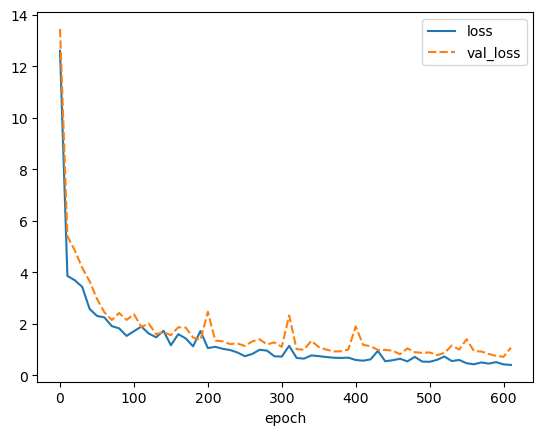

best weights loaded


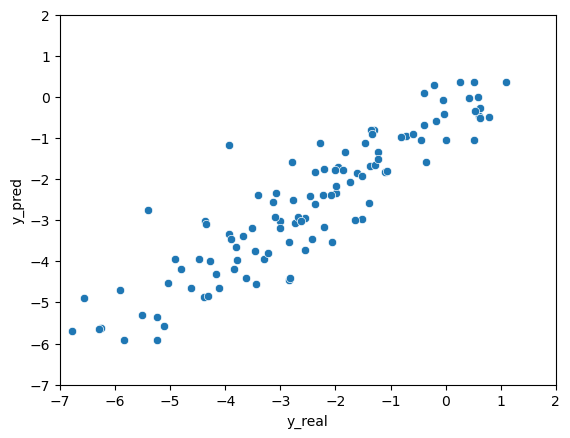

elapsed time: 248.78726410865784
run: 80
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605F7910>, <torch.utils.data.dataset.Subset object at 0x00000155D5CA2CA0>, <torch.utils.data.dataset.Subset object at 0x00000155D5D38C70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.274667485555013 | Validation Loss 6.648756742477417
Epoch 10 | Train Loss 3.1481270790100098 | Validation Loss 4.284897804260254
Epoch 20 | Train Loss 3.391496785481771 | Validation Loss 3.9155973196029663
Epoch 30 | Train Loss 2.214927808443705 | Validation Loss 2.1325069665908813
Epoch 40 | Train Loss 2.0512749751408896 | Validation Loss 2.254024028778076
Epoch 50 | Train Loss 1.3436171293258667 | Validation Loss 1.597040057182312
Epoch 60 | Train Loss 1.2627367973327637 | Validation Loss 1.488215446472168
Epoch 70 | Train Loss 1.3419876416524252 | Validation Loss 1.7888720035552979
Epoch 80 | Train Loss 1.0328848044077554 | Validation Loss 1.3978590965270996
Epoch 90 | Train Loss 0.9545691112677256 | Validation Loss 1.7019140124320984
Epoch 100 | Train Loss 0.9056225458780924 | Validation Loss 1.4025335907936096
Epoch 110 | Train Loss 0.8579380353291829 | Validation Loss 1.1476610004901886
Epoch 120 | Train Loss 0.7716246624787648 | Validation Loss 1.131630480

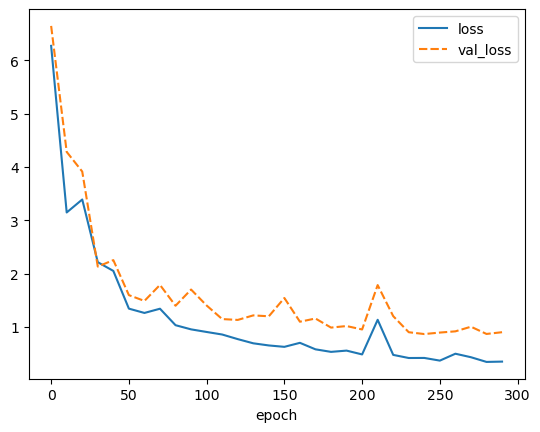

best weights loaded


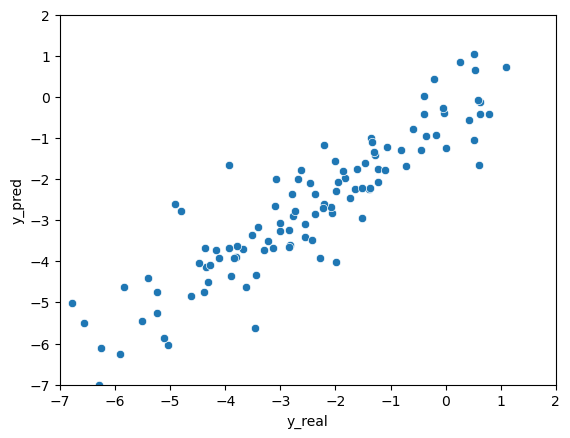

elapsed time: 104.48528790473938
run: 81
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001555D887BE0>, <torch.utils.data.dataset.Subset object at 0x00000155D5CB09A0>, <torch.utils.data.dataset.Subset object at 0x00000155D5CB0EB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.312379614512126 | Validation Loss 5.584772109985352
Epoch 10 | Train Loss 4.360194047292073 | Validation Loss 6.728431940078735
Epoch 20 | Train Loss 4.462015295028687 | Validation Loss 5.589487791061401
Epoch 30 | Train Loss 3.6048234621683757 | Validation Loss 4.816014051437378
Epoch 40 | Train Loss 3.529069169362386 | Validation Loss 5.158419609069824
Epoch 50 | Train Loss 3.5012960116068523 | Validation Loss 4.710083723068237
Epoch 60 | Train Loss 3.4828165849049886 | Validation Loss 4.677175521850586
Epoch 70 | Train Loss 3.512300984064738 | Validation Loss 5.1082985401153564
Epoch 80 | Train Loss 3.355678176879883 | Validation Loss 4.24322509765625
Epoch 90 | Train Loss 3.3132516066233317 | Validation Loss 4.060410857200623
Epoch 100 | Train Loss 3.0628074328104655 | Validation Loss 3.6862326860427856
Epoch 110 | Train Loss 2.7888619820276896 | Validation Loss 3.68573796749115
Epoch 120 | Train Loss 3.0030983765920003 | Validation Loss 3.4540940523147583
Ep

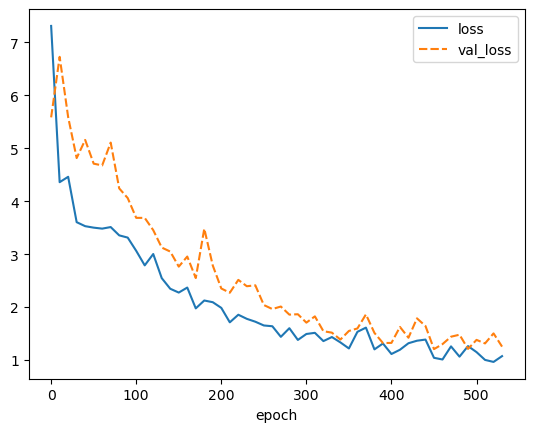

best weights loaded


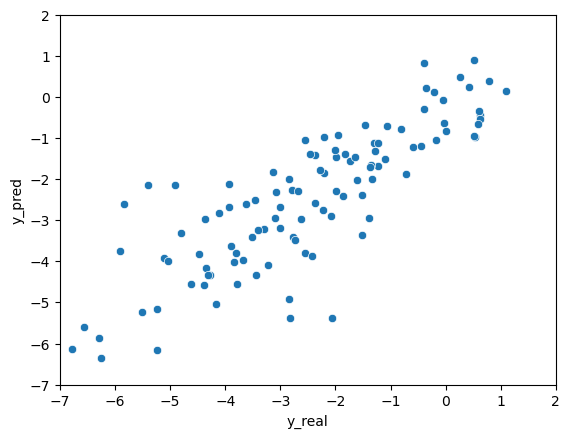

elapsed time: 209.93279027938843
run: 82
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561848550>, <torch.utils.data.dataset.Subset object at 0x00000155D5D69BE0>, <torch.utils.data.dataset.Subset object at 0x00000155D5CA2940>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.184677426020304 | Validation Loss 5.955906629562378
Epoch 10 | Train Loss 3.889676268895467 | Validation Loss 5.027443170547485
Epoch 20 | Train Loss 3.862924019495646 | Validation Loss 4.70210862159729
Epoch 30 | Train Loss 3.3423619906107587 | Validation Loss 4.190622806549072
Epoch 40 | Train Loss 2.78610596259435 | Validation Loss 3.5484516620635986
Epoch 50 | Train Loss 2.5996994574864707 | Validation Loss 3.0303568840026855
Epoch 60 | Train Loss 2.7097049315770465 | Validation Loss 2.9603826999664307
Epoch 70 | Train Loss 2.286843268076579 | Validation Loss 3.2185075283050537
Epoch 80 | Train Loss 2.1788020769755048 | Validation Loss 2.459701895713806
Epoch 90 | Train Loss 1.9852664868036907 | Validation Loss 3.3741957545280457
Epoch 100 | Train Loss 1.8879082679748536 | Validation Loss 2.2452714443206787
Epoch 110 | Train Loss 2.1759108781814573 | Validation Loss 2.4072360396385193
Epoch 120 | Train Loss 1.585080655415853 | Validation Loss 2.12970244884490

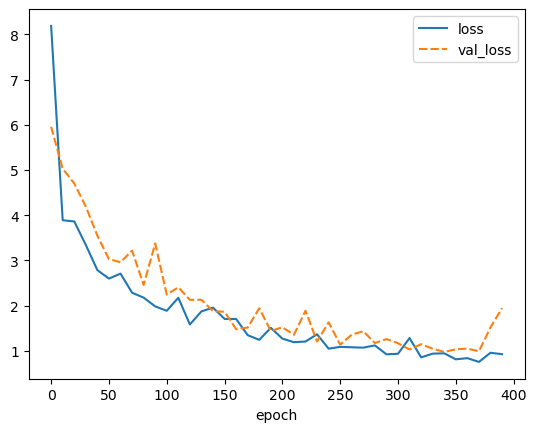

best weights loaded


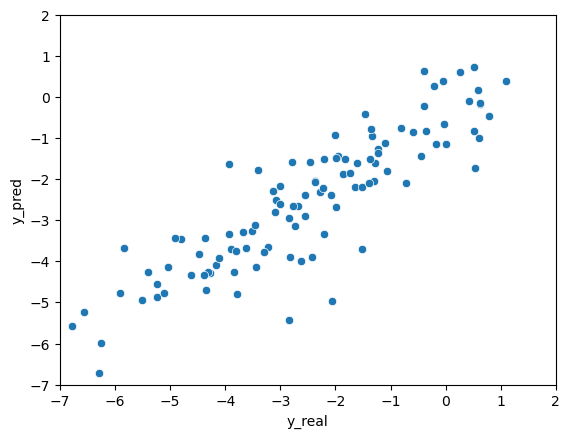

elapsed time: 175.56968212127686
run: 83
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560486F70>, <torch.utils.data.dataset.Subset object at 0x0000015519197310>, <torch.utils.data.dataset.Subset object at 0x0000015519197820>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.898182010650634 | Validation Loss 5.9023659229278564
Epoch 10 | Train Loss 3.968476390838623 | Validation Loss 4.709528684616089
Epoch 20 | Train Loss 3.698747221628825 | Validation Loss 4.147231101989746
Epoch 30 | Train Loss 2.6467820485432942 | Validation Loss 3.658951997756958
Epoch 40 | Train Loss 2.5703757206598916 | Validation Loss 3.1858428716659546
Epoch 50 | Train Loss 2.3742891788482665 | Validation Loss 3.175794005393982
Epoch 60 | Train Loss 2.016086713473002 | Validation Loss 2.4241669178009033
Epoch 70 | Train Loss 1.9519320090611776 | Validation Loss 3.168147563934326
Epoch 80 | Train Loss 1.7486340284347535 | Validation Loss 2.188845694065094
Epoch 90 | Train Loss 1.717450451850891 | Validation Loss 2.365314781665802
Epoch 100 | Train Loss 1.6846263567606607 | Validation Loss 2.7527137994766235
Epoch 110 | Train Loss 1.508797534306844 | Validation Loss 1.7364777326583862
Epoch 120 | Train Loss 1.337695801258087 | Validation Loss 1.834060549736023

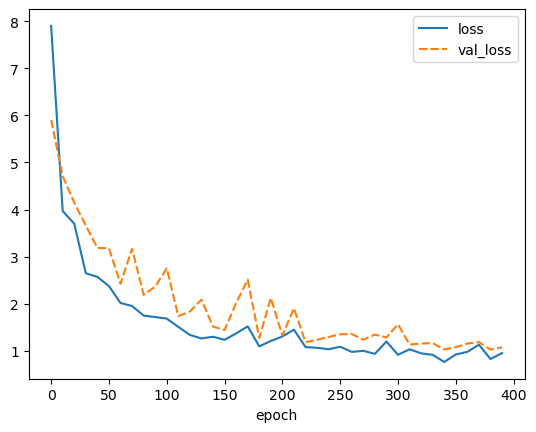

best weights loaded


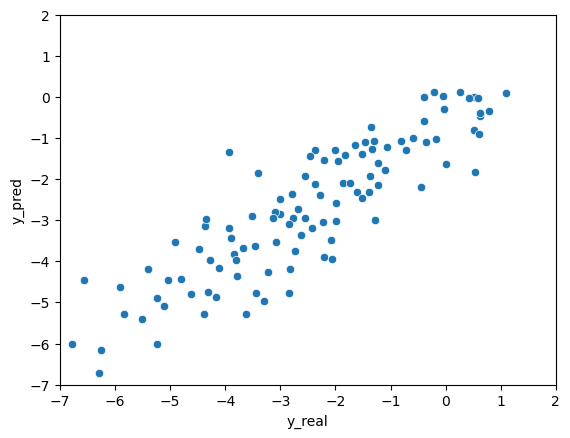

elapsed time: 173.06116318702698
run: 84
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155603F7BE0>, <torch.utils.data.dataset.Subset object at 0x000001553BD90340>, <torch.utils.data.dataset.Subset object at 0x000001556072BF10>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.19987154006958 | Validation Loss 6.369805812835693
Epoch 10 | Train Loss 4.071332613627116 | Validation Loss 5.412118673324585
Epoch 20 | Train Loss 4.133251905441284 | Validation Loss 4.316406011581421
Epoch 30 | Train Loss 2.899751663208008 | Validation Loss 3.8588759899139404
Epoch 40 | Train Loss 2.7228771527608235 | Validation Loss 2.949578642845154
Epoch 50 | Train Loss 1.9759187618891398 | Validation Loss 2.3556655645370483
Epoch 60 | Train Loss 1.8673564751942953 | Validation Loss 2.1634809970855713
Epoch 70 | Train Loss 1.6926788727442423 | Validation Loss 1.9279314875602722
Epoch 80 | Train Loss 1.6060592810312906 | Validation Loss 2.152694046497345
Epoch 90 | Train Loss 1.4877288738886516 | Validation Loss 1.8261496424674988
Epoch 100 | Train Loss 1.3865933179855348 | Validation Loss 1.718444585800171
Epoch 110 | Train Loss 1.3886329809824625 | Validation Loss 1.5944774746894836
Epoch 120 | Train Loss 1.3907641092936198 | Validation Loss 1.58706170320

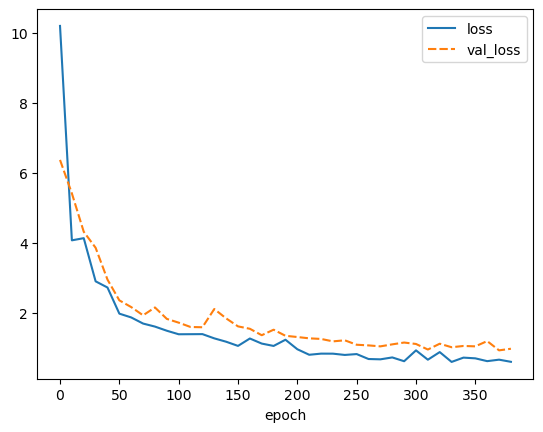

best weights loaded


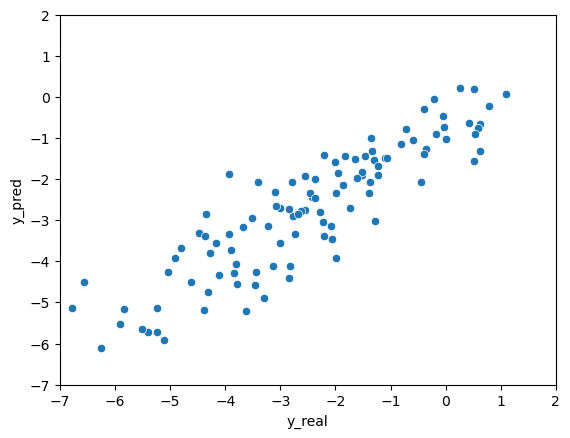

elapsed time: 168.03173923492432
run: 85
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155604DE1C0>, <torch.utils.data.dataset.Subset object at 0x00000155D5C493D0>, <torch.utils.data.dataset.Subset object at 0x00000155D5C49EB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.424685923258464 | Validation Loss 6.000432252883911
Epoch 10 | Train Loss 4.310740820566813 | Validation Loss 6.015683174133301
Epoch 20 | Train Loss 4.400221840540568 | Validation Loss 5.275898694992065
Epoch 30 | Train Loss 3.7797211011250815 | Validation Loss 5.888614654541016
Epoch 40 | Train Loss 3.6329363187154136 | Validation Loss 4.83869194984436
Epoch 50 | Train Loss 3.885904343922933 | Validation Loss 4.720962762832642
Epoch 60 | Train Loss 3.305579674243927 | Validation Loss 4.537149667739868
Epoch 70 | Train Loss 3.3408163865407308 | Validation Loss 4.670784950256348
Epoch 80 | Train Loss 3.4745981057484943 | Validation Loss 4.483103513717651
Epoch 90 | Train Loss 2.998581592241923 | Validation Loss 3.8698136806488037
Epoch 100 | Train Loss 2.8769673506418862 | Validation Loss 3.884466290473938
Epoch 110 | Train Loss 2.596049912770589 | Validation Loss 3.8755918741226196
Epoch 120 | Train Loss 2.643557643890381 | Validation Loss 3.1276479959487915
Epo

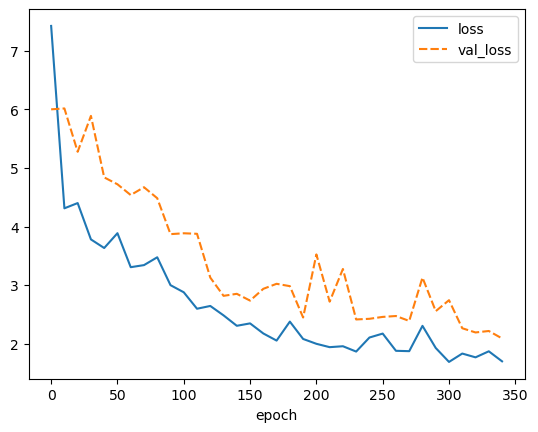

best weights loaded


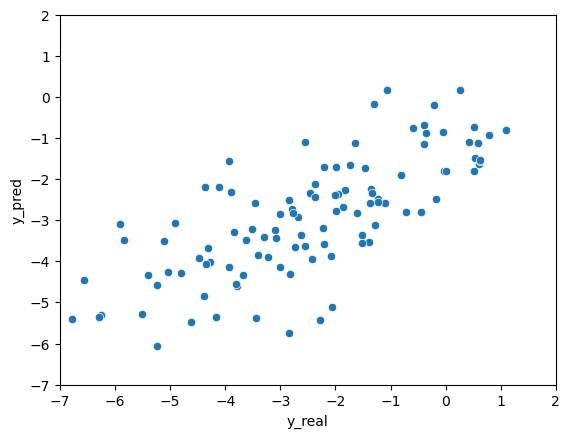

elapsed time: 160.30223035812378
run: 86
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001553BD86C10>, <torch.utils.data.dataset.Subset object at 0x00000155D5B22250>, <torch.utils.data.dataset.Subset object at 0x00000155D5D385B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.744289302825928 | Validation Loss 6.054363489151001
Epoch 10 | Train Loss 4.275534947713216 | Validation Loss 5.737827777862549
Epoch 20 | Train Loss 4.3269216855367025 | Validation Loss 5.81507134437561
Epoch 30 | Train Loss 4.338564491271972 | Validation Loss 4.953253269195557
Epoch 40 | Train Loss 3.9910529613494874 | Validation Loss 4.99053430557251
Epoch 50 | Train Loss 3.6319059213002522 | Validation Loss 5.156892538070679
Epoch 60 | Train Loss 4.034280268351237 | Validation Loss 4.819937229156494
Epoch 70 | Train Loss 3.4506350199381512 | Validation Loss 4.913001775741577
Epoch 80 | Train Loss 3.6002351601918536 | Validation Loss 4.427721977233887
Epoch 90 | Train Loss 3.4841218550999957 | Validation Loss 4.385109901428223
Epoch 100 | Train Loss 3.0128894885381063 | Validation Loss 3.9549390077590942
Epoch 110 | Train Loss 3.0345401763916016 | Validation Loss 3.6216018199920654
Epoch 120 | Train Loss 2.8102360486984255 | Validation Loss 3.476617217063904
E

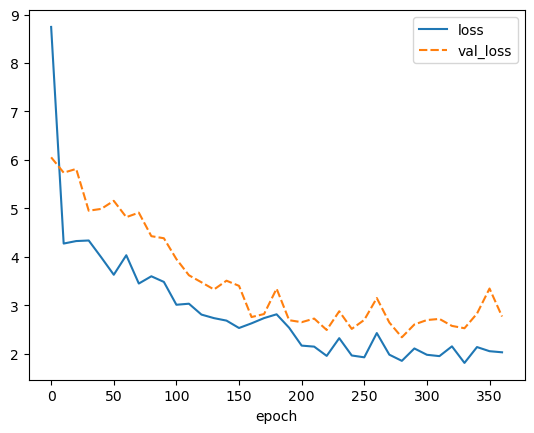

best weights loaded


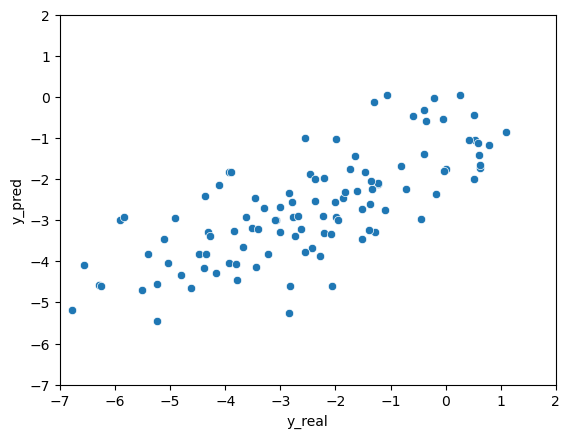

elapsed time: 190.40600752830505
run: 87
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015519178AF0>, <torch.utils.data.dataset.Subset object at 0x00000155D7E1D070>, <torch.utils.data.dataset.Subset object at 0x00000155D7E1D520>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.828930314381918 | Validation Loss 11.965181350708008
Epoch 10 | Train Loss 4.523668320973714 | Validation Loss 5.8785271644592285
Epoch 20 | Train Loss 4.002890491485596 | Validation Loss 5.743276119232178
Epoch 30 | Train Loss 3.915465307235718 | Validation Loss 5.5026280879974365
Epoch 40 | Train Loss 3.7177152315775555 | Validation Loss 5.058537244796753
Epoch 50 | Train Loss 4.030718517303467 | Validation Loss 4.468004107475281
Epoch 60 | Train Loss 3.6220367590586346 | Validation Loss 4.314351320266724
Epoch 70 | Train Loss 4.093807188669841 | Validation Loss 4.83635950088501
Epoch 80 | Train Loss 3.325997265179952 | Validation Loss 4.308643341064453
Epoch 90 | Train Loss 3.2651949405670164 | Validation Loss 4.244491338729858
Epoch 100 | Train Loss 3.023641848564148 | Validation Loss 3.996228575706482
Epoch 110 | Train Loss 3.0363535404205324 | Validation Loss 3.868728756904602
Epoch 120 | Train Loss 3.1665432771046955 | Validation Loss 3.8316863775253296
E

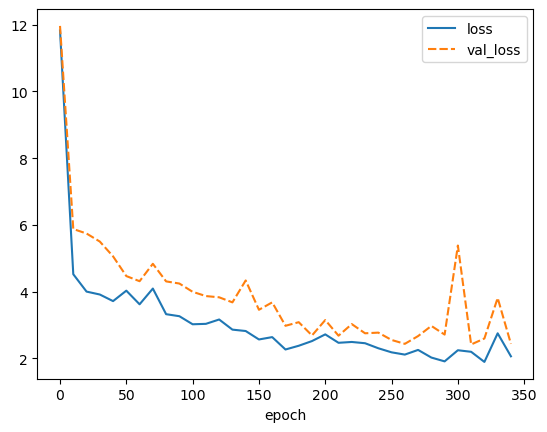

best weights loaded


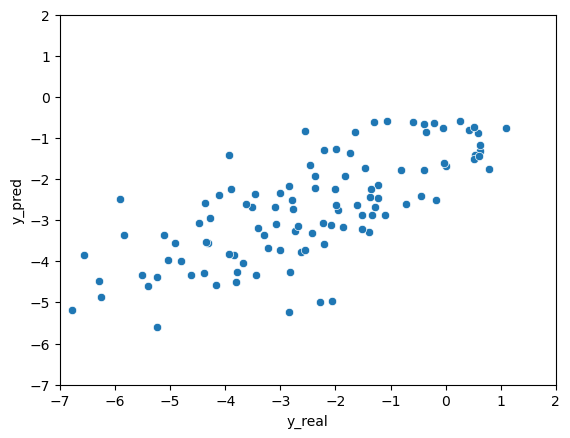

elapsed time: 229.37501287460327
run: 88
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155618D3AF0>, <torch.utils.data.dataset.Subset object at 0x000001556060DA00>, <torch.utils.data.dataset.Subset object at 0x0000015561817FD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.873527081807454 | Validation Loss 10.172904014587402
Epoch 10 | Train Loss 4.296995846430461 | Validation Loss 5.356010437011719
Epoch 20 | Train Loss 4.276708380381266 | Validation Loss 4.926238059997559
Epoch 30 | Train Loss 3.879555114110311 | Validation Loss 5.181824445724487
Epoch 40 | Train Loss 4.089526780446371 | Validation Loss 4.793166160583496
Epoch 50 | Train Loss 3.8808600107828775 | Validation Loss 4.584042072296143
Epoch 60 | Train Loss 3.6520766258239745 | Validation Loss 4.440605401992798
Epoch 70 | Train Loss 3.423498872915904 | Validation Loss 4.099911332130432
Epoch 80 | Train Loss 3.6082775433858236 | Validation Loss 4.798111438751221
Epoch 90 | Train Loss 3.3057077089945475 | Validation Loss 3.9532575607299805
Epoch 100 | Train Loss 3.0017355759938558 | Validation Loss 3.986039400100708
Epoch 110 | Train Loss 3.2109379450480144 | Validation Loss 3.6200621128082275
Epoch 120 | Train Loss 2.8312961657842 | Validation Loss 3.295371174812317
Ep

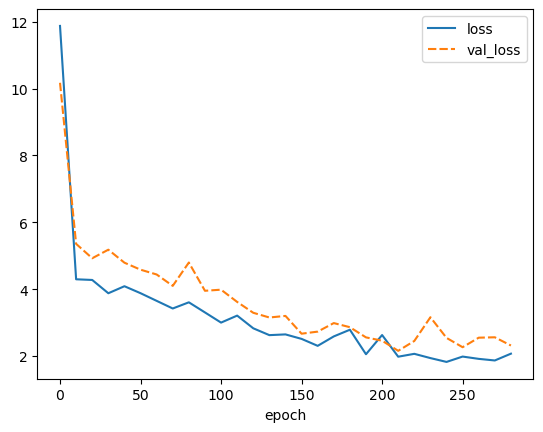

best weights loaded


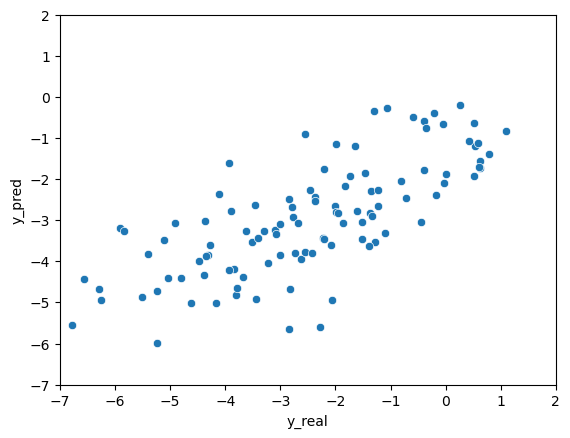

elapsed time: 147.0372338294983
run: 89
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561A15DC0>, <torch.utils.data.dataset.Subset object at 0x00000155604CE1F0>, <torch.utils.data.dataset.Subset object at 0x00000155604CE7C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 12.628229649861654 | Validation Loss 12.592771530151367
Epoch 10 | Train Loss 3.7773635228474935 | Validation Loss 5.040092945098877
Epoch 20 | Train Loss 3.59210467338562 | Validation Loss 4.272116184234619
Epoch 30 | Train Loss 3.3504096190134685 | Validation Loss 3.8204808235168457
Epoch 40 | Train Loss 2.45377828280131 | Validation Loss 3.151045083999634
Epoch 50 | Train Loss 2.4258325258890787 | Validation Loss 2.788198232650757
Epoch 60 | Train Loss 2.1470821539560956 | Validation Loss 2.9175405502319336
Epoch 70 | Train Loss 2.109914207458496 | Validation Loss 2.222180724143982
Epoch 80 | Train Loss 1.8189806540807087 | Validation Loss 2.779289960861206
Epoch 90 | Train Loss 1.7452431519826253 | Validation Loss 2.1055078506469727
Epoch 100 | Train Loss 1.7534125487009684 | Validation Loss 1.8884303569793701
Epoch 110 | Train Loss 1.5700610597928366 | Validation Loss 2.391439437866211
Epoch 120 | Train Loss 1.8980251868565878 | Validation Loss 1.9667171239852

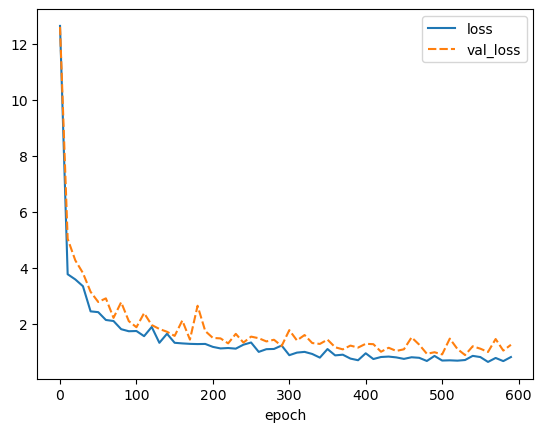

best weights loaded


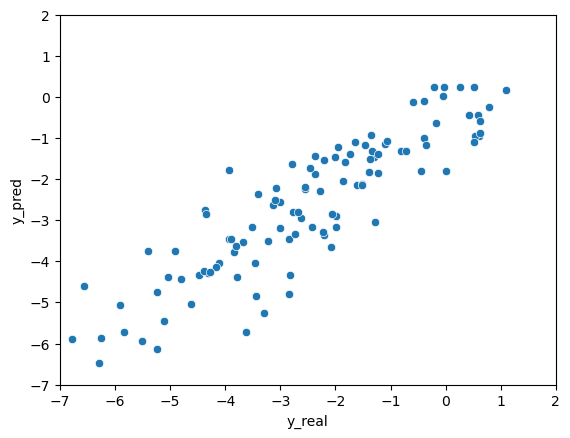

elapsed time: 243.3005406856537
run: 90
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561AB1490>, <torch.utils.data.dataset.Subset object at 0x00000155D7F5F580>, <torch.utils.data.dataset.Subset object at 0x00000155D7F5FA90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.236712900797526 | Validation Loss 6.364434480667114
Epoch 10 | Train Loss 3.2041627407073974 | Validation Loss 6.494936466217041
Epoch 20 | Train Loss 2.42858829498291 | Validation Loss 2.822087526321411
Epoch 30 | Train Loss 1.952728001276652 | Validation Loss 2.2955340147018433
Epoch 40 | Train Loss 1.4318672219912212 | Validation Loss 2.592256784439087
Epoch 50 | Train Loss 1.307160500685374 | Validation Loss 1.7111830711364746
Epoch 60 | Train Loss 1.2275400757789612 | Validation Loss 1.633958339691162
Epoch 70 | Train Loss 1.256655514240265 | Validation Loss 1.358910083770752
Epoch 80 | Train Loss 1.0341746846834818 | Validation Loss 1.30039644241333
Epoch 90 | Train Loss 1.0169991771380107 | Validation Loss 1.2462595701217651
Epoch 100 | Train Loss 0.9356740554173787 | Validation Loss 1.1922768354415894
Epoch 110 | Train Loss 0.8943672895431518 | Validation Loss 1.7578807473182678
Epoch 120 | Train Loss 0.6203445052107175 | Validation Loss 1.068381190299987

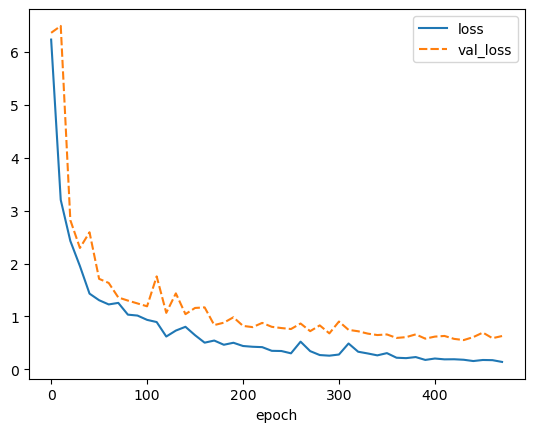

best weights loaded


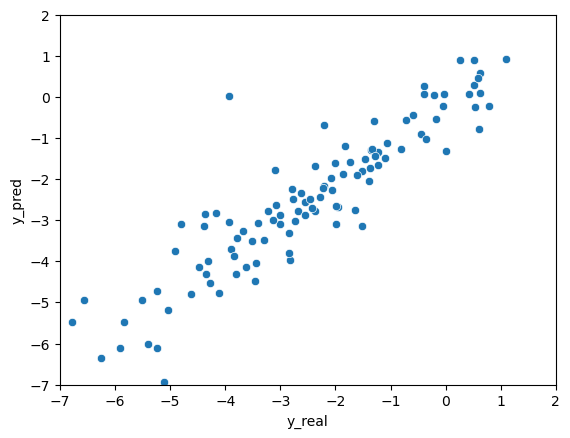

elapsed time: 164.3644905090332
run: 91
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155604D6250>, <torch.utils.data.dataset.Subset object at 0x00000155D7DC9820>, <torch.utils.data.dataset.Subset object at 0x00000155190A3DF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.920837386449178 | Validation Loss 7.006004333496094
Epoch 10 | Train Loss 4.257999038696289 | Validation Loss 5.302831172943115
Epoch 20 | Train Loss 3.863621187210083 | Validation Loss 5.8090198040008545
Epoch 30 | Train Loss 3.660083468755086 | Validation Loss 4.799866676330566
Epoch 40 | Train Loss 3.5117818832397463 | Validation Loss 5.327311992645264
Epoch 50 | Train Loss 3.3527650594711305 | Validation Loss 4.722025394439697
Epoch 60 | Train Loss 3.544486172993978 | Validation Loss 4.469729900360107
Epoch 70 | Train Loss 3.6189194679260255 | Validation Loss 4.5176191329956055
Epoch 80 | Train Loss 3.504908577601115 | Validation Loss 4.710943222045898
Epoch 90 | Train Loss 3.3576171239217123 | Validation Loss 4.409223794937134
Epoch 100 | Train Loss 3.2665628870328267 | Validation Loss 3.855343222618103
Epoch 110 | Train Loss 2.901639286677043 | Validation Loss 4.093562364578247
Epoch 120 | Train Loss 2.843318049112956 | Validation Loss 3.5299582481384277
Ep

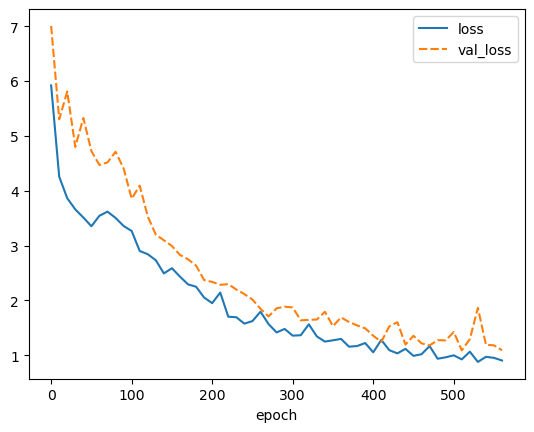

best weights loaded


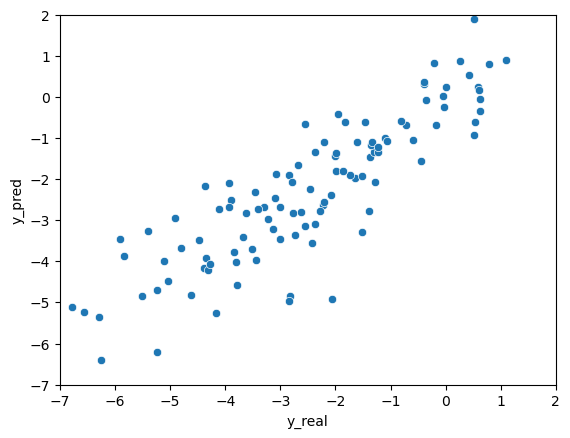

elapsed time: 228.70502519607544
run: 92
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5AD8B20>, <torch.utils.data.dataset.Subset object at 0x00000155D7FA8CD0>, <torch.utils.data.dataset.Subset object at 0x00000155D7FAE220>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.542626094818115 | Validation Loss 5.63564133644104
Epoch 10 | Train Loss 3.837501955032349 | Validation Loss 4.88956880569458
Epoch 20 | Train Loss 3.9093169848124187 | Validation Loss 4.469428658485413
Epoch 30 | Train Loss 4.064595794677734 | Validation Loss 4.084357380867004
Epoch 40 | Train Loss 3.4263304233551026 | Validation Loss 3.6434367895126343
Epoch 50 | Train Loss 2.5477200508117677 | Validation Loss 3.041927218437195
Epoch 60 | Train Loss 2.3276328921318052 | Validation Loss 2.8417391777038574
Epoch 70 | Train Loss 2.132233993212382 | Validation Loss 2.4072349071502686
Epoch 80 | Train Loss 2.0088722308476767 | Validation Loss 2.321076214313507
Epoch 90 | Train Loss 1.8984583536783854 | Validation Loss 2.1334530115127563
Epoch 100 | Train Loss 1.6629545529683432 | Validation Loss 1.9466348886489868
Epoch 110 | Train Loss 1.9192130486170451 | Validation Loss 3.255305051803589
Epoch 120 | Train Loss 1.6388449708620707 | Validation Loss 1.77294534444808

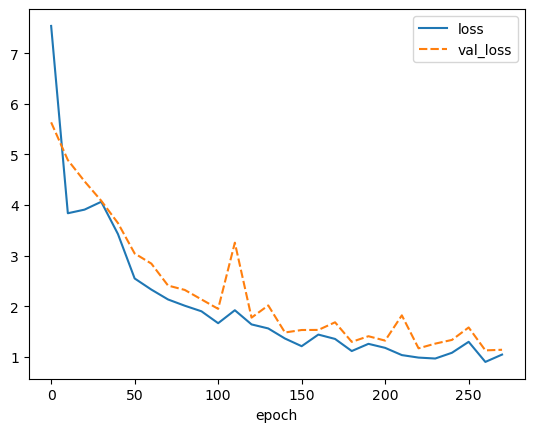

best weights loaded


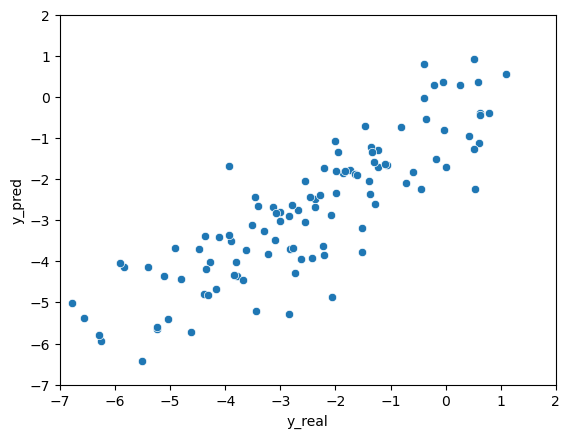

elapsed time: 105.63467335700989
run: 93
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5A9D3D0>, <torch.utils.data.dataset.Subset object at 0x00000155D7DD19A0>, <torch.utils.data.dataset.Subset object at 0x00000155D7DD1B20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.714680989583334 | Validation Loss 7.294544696807861
Epoch 10 | Train Loss 3.757337188720703 | Validation Loss 5.907439947128296
Epoch 20 | Train Loss 3.040139949321747 | Validation Loss 3.6091043949127197
Epoch 30 | Train Loss 2.4761984904607135 | Validation Loss 2.936175227165222
Epoch 40 | Train Loss 2.443643156687419 | Validation Loss 3.6797375679016113
Epoch 50 | Train Loss 2.0527100880940754 | Validation Loss 2.2009137868881226
Epoch 60 | Train Loss 1.7455466787020366 | Validation Loss 2.1223729848861694
Epoch 70 | Train Loss 1.5625999689102172 | Validation Loss 2.0890432596206665
Epoch 80 | Train Loss 1.9577770193417867 | Validation Loss 2.5092791318893433
Epoch 90 | Train Loss 1.3343751867612204 | Validation Loss 1.7943325638771057
Epoch 100 | Train Loss 1.4837474584579469 | Validation Loss 1.5871303081512451
Epoch 110 | Train Loss 1.3020780940850576 | Validation Loss 1.953490138053894
Epoch 120 | Train Loss 1.193663481871287 | Validation Loss 1.6430028676

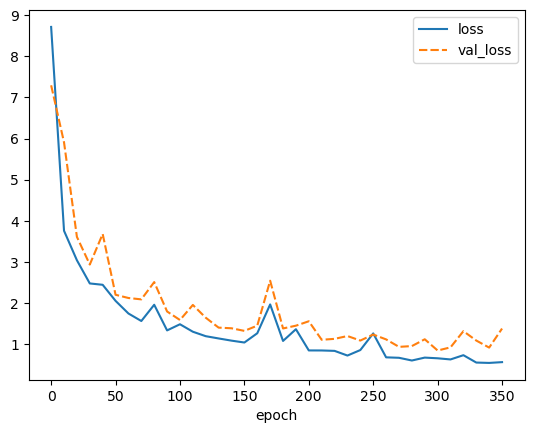

best weights loaded


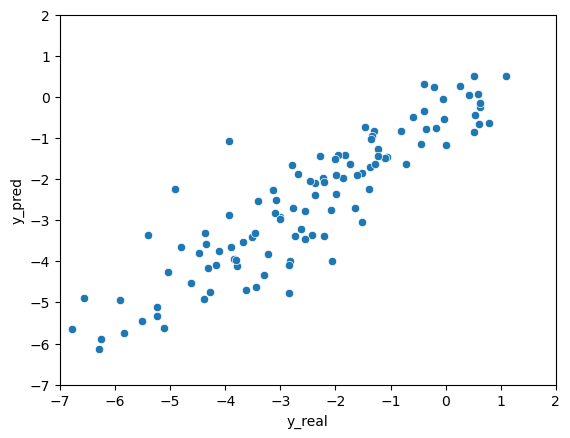

elapsed time: 138.4757194519043
run: 94
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5A9D520>, <torch.utils.data.dataset.Subset object at 0x00000155D7FCD4F0>, <torch.utils.data.dataset.Subset object at 0x00000155D7FCDA00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.738688278198243 | Validation Loss 5.744409799575806
Epoch 10 | Train Loss 3.789913543065389 | Validation Loss 5.258159160614014
Epoch 20 | Train Loss 3.3660215536753335 | Validation Loss 4.018364787101746
Epoch 30 | Train Loss 2.6027791182200115 | Validation Loss 3.016065776348114
Epoch 40 | Train Loss 2.539577118555705 | Validation Loss 2.3523870706558228
Epoch 50 | Train Loss 2.28915282090505 | Validation Loss 2.3768770694732666
Epoch 60 | Train Loss 1.8925479571024577 | Validation Loss 1.8580251932144165
Epoch 70 | Train Loss 1.4390183409055075 | Validation Loss 1.6866297125816345
Epoch 80 | Train Loss 1.1986993451913197 | Validation Loss 1.6287307143211365
Epoch 90 | Train Loss 1.197569990158081 | Validation Loss 1.4533807039260864
Epoch 100 | Train Loss 1.0780856331189475 | Validation Loss 1.47144216299057
Epoch 110 | Train Loss 0.9904224663972855 | Validation Loss 1.7697057723999023
Epoch 120 | Train Loss 1.018881630897522 | Validation Loss 1.35718691349029

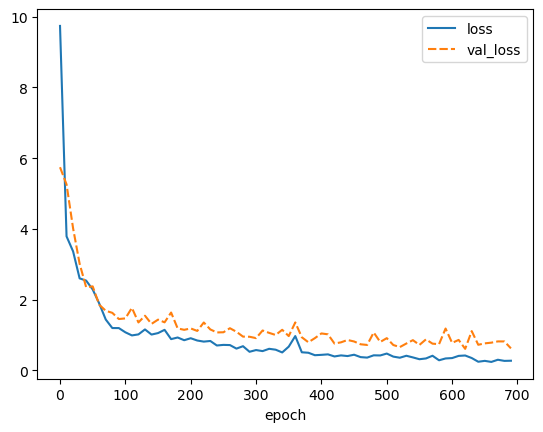

best weights loaded


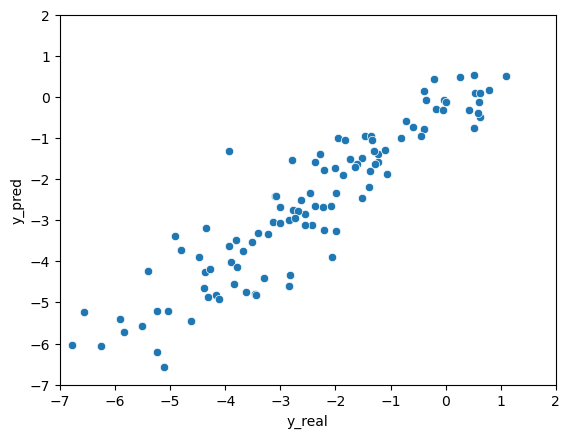

elapsed time: 291.95011043548584
run: 95
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155191663D0>, <torch.utils.data.dataset.Subset object at 0x0000015560655A30>, <torch.utils.data.dataset.Subset object at 0x0000015560655EB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.494764518737793 | Validation Loss 5.551801443099976
Epoch 10 | Train Loss 4.278281275431315 | Validation Loss 5.62642240524292
Epoch 20 | Train Loss 4.169241237640381 | Validation Loss 5.33296537399292
Epoch 30 | Train Loss 3.831359926859538 | Validation Loss 5.439164876937866
Epoch 40 | Train Loss 3.7786194483439126 | Validation Loss 4.827317714691162
Epoch 50 | Train Loss 3.776465161641439 | Validation Loss 4.726325988769531
Epoch 60 | Train Loss 3.839595158894857 | Validation Loss 4.434609413146973
Epoch 70 | Train Loss 3.5982977708180743 | Validation Loss 4.384639739990234
Epoch 80 | Train Loss 3.409065850575765 | Validation Loss 4.315513610839844
Epoch 90 | Train Loss 3.0750505208969114 | Validation Loss 4.042717337608337
Epoch 100 | Train Loss 3.207362341880798 | Validation Loss 4.236006021499634
Epoch 110 | Train Loss 2.7599682648976644 | Validation Loss 3.312081217765808
Epoch 120 | Train Loss 2.7221588373184202 | Validation Loss 4.419209241867065
Epoch 1

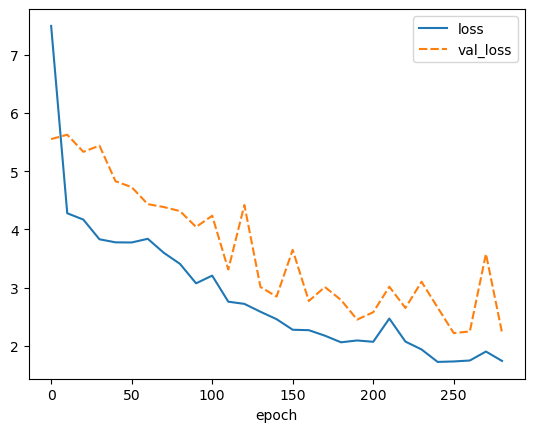

best weights loaded


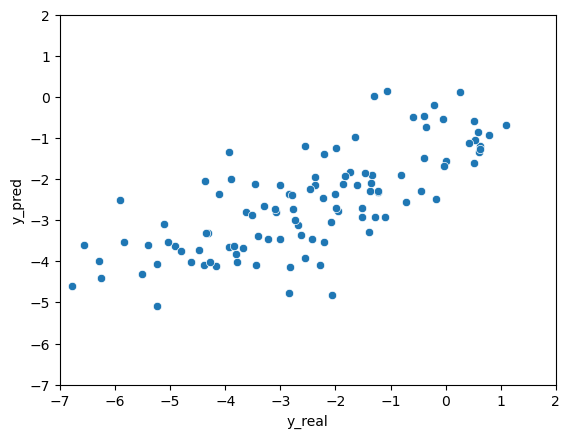

elapsed time: 121.60053825378418
run: 96
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5C12E50>, <torch.utils.data.dataset.Subset object at 0x00000155D7FDC310>, <torch.utils.data.dataset.Subset object at 0x00000155D7FDC820>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.49985560576121 | Validation Loss 7.463824510574341
Epoch 10 | Train Loss 4.200161186854045 | Validation Loss 6.302016258239746
Epoch 20 | Train Loss 4.338020483652751 | Validation Loss 5.130155563354492
Epoch 30 | Train Loss 4.468826770782471 | Validation Loss 5.301050901412964
Epoch 40 | Train Loss 4.04783821105957 | Validation Loss 5.299660921096802
Epoch 50 | Train Loss 3.6514930009841917 | Validation Loss 4.99238133430481
Epoch 60 | Train Loss 3.536190907160441 | Validation Loss 4.782154560089111
Epoch 70 | Train Loss 3.837938356399536 | Validation Loss 4.411535620689392
Epoch 80 | Train Loss 3.337602655092875 | Validation Loss 4.680910706520081
Epoch 90 | Train Loss 3.2795018196105956 | Validation Loss 4.035201668739319
Epoch 100 | Train Loss 3.31309076944987 | Validation Loss 4.0020517110824585
Epoch 110 | Train Loss 2.7276288906733197 | Validation Loss 3.674314498901367
Epoch 120 | Train Loss 2.7174540360768638 | Validation Loss 3.3528331518173218
Epoch 13

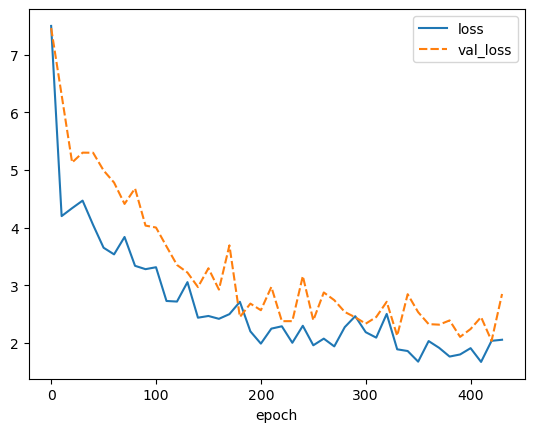

best weights loaded


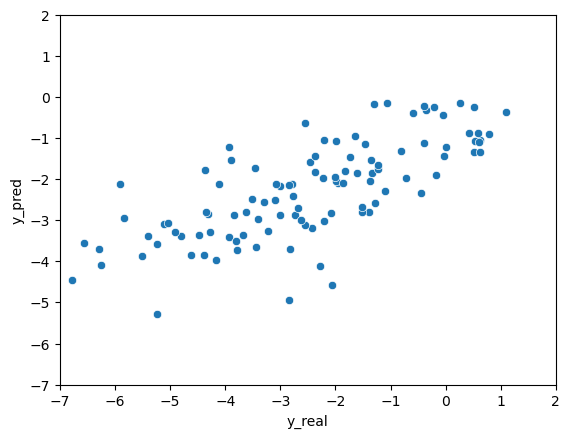

elapsed time: 235.952223777771
run: 97
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5BE1B80>, <torch.utils.data.dataset.Subset object at 0x00000155D7DDA400>, <torch.utils.data.dataset.Subset object at 0x0000015519153F70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.613940684000651 | Validation Loss 11.504326343536377
Epoch 10 | Train Loss 4.352429294586182 | Validation Loss 5.304803848266602
Epoch 20 | Train Loss 4.059043343861898 | Validation Loss 5.199950218200684
Epoch 30 | Train Loss 4.056688976287842 | Validation Loss 5.658792972564697
Epoch 40 | Train Loss 3.9137703736623126 | Validation Loss 4.591115117073059
Epoch 50 | Train Loss 4.1846879323323565 | Validation Loss 4.943662405014038
Epoch 60 | Train Loss 3.6785979588826496 | Validation Loss 5.288589954376221
Epoch 70 | Train Loss 4.961560773849487 | Validation Loss 5.106813907623291
Epoch 80 | Train Loss 3.4566425482432046 | Validation Loss 4.969852447509766
Epoch 90 | Train Loss 3.2550040086110434 | Validation Loss 4.025576591491699
Epoch 100 | Train Loss 2.931741642951965 | Validation Loss 3.880768060684204
Epoch 110 | Train Loss 2.89324893951416 | Validation Loss 3.606041431427002
Epoch 120 | Train Loss 2.6980738441149392 | Validation Loss 3.4770288467407227
Ep

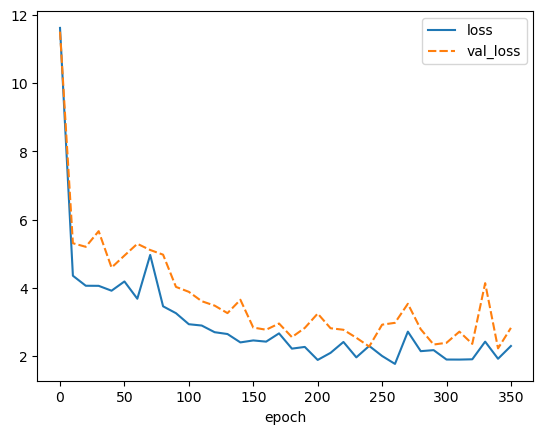

best weights loaded


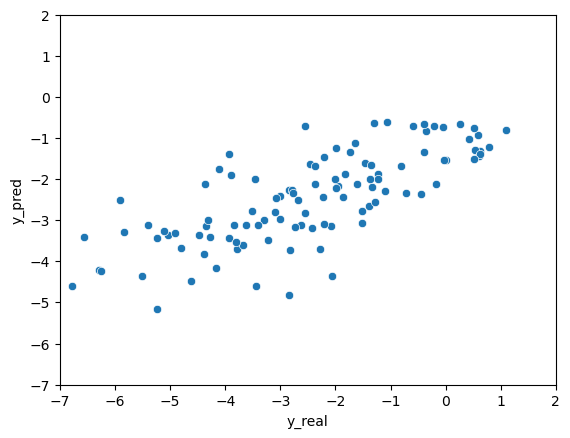

elapsed time: 205.01250433921814
run: 98
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015540EE9850>, <torch.utils.data.dataset.Subset object at 0x00000155D7FE8040>, <torch.utils.data.dataset.Subset object at 0x00000155D7FE8340>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.918380800882975 | Validation Loss 10.051674365997314
Epoch 10 | Train Loss 4.383403873443603 | Validation Loss 5.7143073081970215
Epoch 20 | Train Loss 4.415383529663086 | Validation Loss 5.709443807601929
Epoch 30 | Train Loss 4.0609883785247805 | Validation Loss 5.079959869384766
Epoch 40 | Train Loss 3.5291571776072184 | Validation Loss 4.697061538696289
Epoch 50 | Train Loss 3.8951024214426675 | Validation Loss 4.554778456687927
Epoch 60 | Train Loss 3.7156430880228677 | Validation Loss 4.534821033477783
Epoch 70 | Train Loss 3.6821519215901692 | Validation Loss 5.016209006309509
Epoch 80 | Train Loss 3.4202528556187946 | Validation Loss 4.594080686569214
Epoch 90 | Train Loss 3.3284942468007404 | Validation Loss 4.453394651412964
Epoch 100 | Train Loss 3.3374039491017657 | Validation Loss 4.1973631381988525
Epoch 110 | Train Loss 3.0980712890625 | Validation Loss 4.1488038301467896
Epoch 120 | Train Loss 2.9405556042989094 | Validation Loss 3.78097498416900

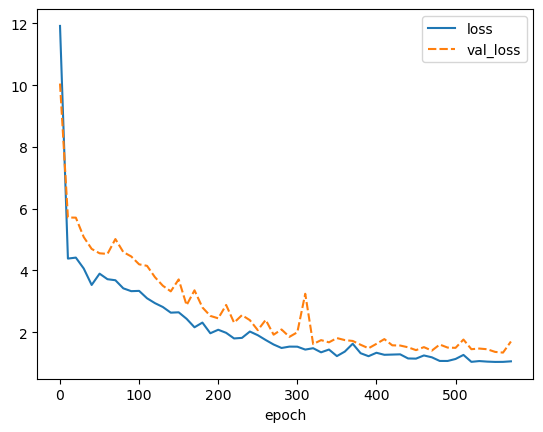

best weights loaded


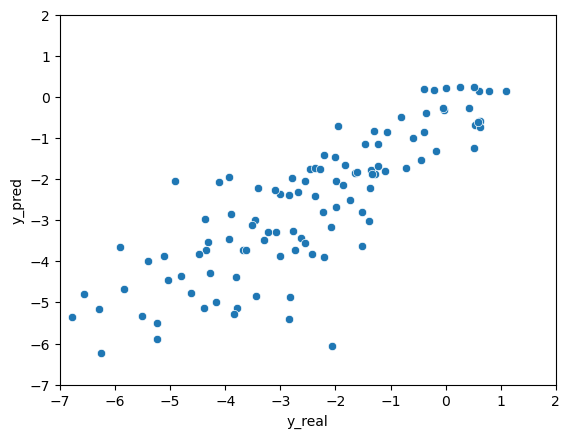

elapsed time: 281.11143040657043
run: 99
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556050D250>, <torch.utils.data.dataset.Subset object at 0x000001556078A760>, <torch.utils.data.dataset.Subset object at 0x000001556078A070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.11951036453247 | Validation Loss 7.420276880264282
Epoch 10 | Train Loss 3.6969197591145835 | Validation Loss 5.519790887832642
Epoch 20 | Train Loss 3.512044350306193 | Validation Loss 5.932934761047363
Epoch 30 | Train Loss 3.091303793589274 | Validation Loss 3.6345707178115845
Epoch 40 | Train Loss 2.3560399532318117 | Validation Loss 3.378659963607788
Epoch 50 | Train Loss 1.987415854136149 | Validation Loss 2.9961408376693726
Epoch 60 | Train Loss 1.8899140278498332 | Validation Loss 2.7780292630195618
Epoch 70 | Train Loss 1.966784652074178 | Validation Loss 2.138167977333069
Epoch 80 | Train Loss 1.7178423802057903 | Validation Loss 1.937953770160675
Epoch 90 | Train Loss 1.7132301489512125 | Validation Loss 1.7562246918678284
Epoch 100 | Train Loss 1.8989932775497436 | Validation Loss 2.3234928846359253
Epoch 110 | Train Loss 1.3373307466506958 | Validation Loss 2.240097761154175
Epoch 120 | Train Loss 1.4679378827412923 | Validation Loss 2.0469207763671

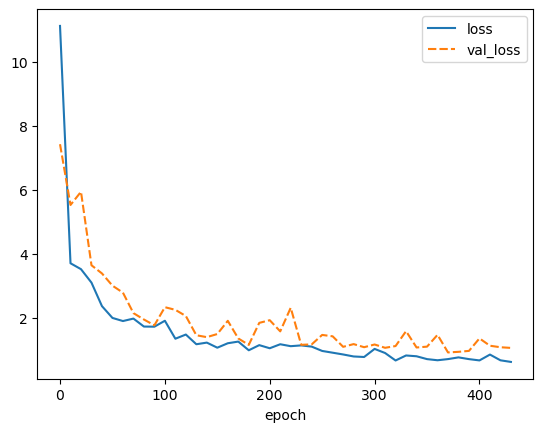

best weights loaded


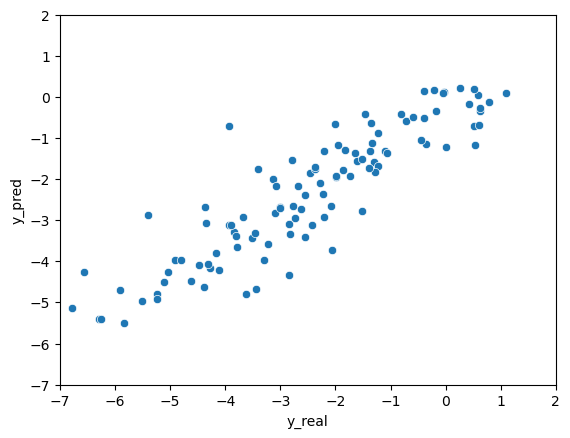

elapsed time: 206.61644983291626
run: 100
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5C35220>, <torch.utils.data.dataset.Subset object at 0x00000155D7D745E0>, <torch.utils.data.dataset.Subset object at 0x00000155D7D74AF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.136877250671387 | Validation Loss 6.909468173980713
Epoch 10 | Train Loss 3.367843023935954 | Validation Loss 4.449398994445801
Epoch 20 | Train Loss 3.0044647693634032 | Validation Loss 4.178679704666138
Epoch 30 | Train Loss 2.4106403907140095 | Validation Loss 3.27475905418396
Epoch 40 | Train Loss 1.9755804141362507 | Validation Loss 2.1040878295898438
Epoch 50 | Train Loss 1.956999452908834 | Validation Loss 1.9795548915863037
Epoch 60 | Train Loss 1.3648697932561238 | Validation Loss 2.2922698259353638
Epoch 70 | Train Loss 1.3702701091766358 | Validation Loss 1.5901615619659424
Epoch 80 | Train Loss 1.2392675141493479 | Validation Loss 1.644163727760315
Epoch 90 | Train Loss 1.25740780433019 | Validation Loss 1.5793736577033997
Epoch 100 | Train Loss 1.195347793896993 | Validation Loss 1.9177099466323853
Epoch 110 | Train Loss 1.0549882292747497 | Validation Loss 1.4644946455955505
Epoch 120 | Train Loss 1.0975250204404194 | Validation Loss 1.3221472501754

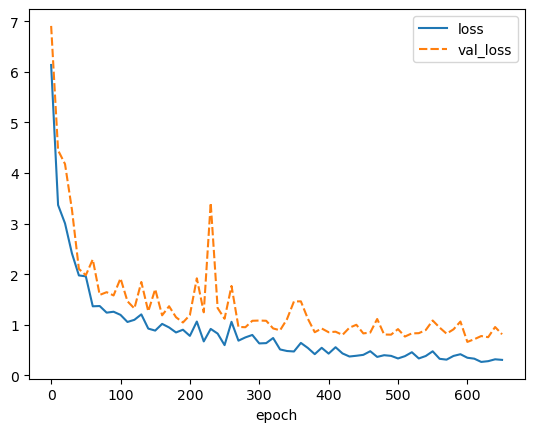

best weights loaded


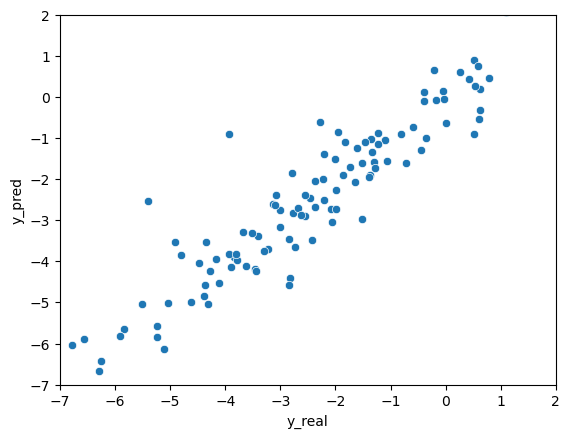

elapsed time: 259.63977122306824
run: 101
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605FDD60>, <torch.utils.data.dataset.Subset object at 0x00000155190D3D00>, <torch.utils.data.dataset.Subset object at 0x00000155190D3A30>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.01366605758667 | Validation Loss 5.875096082687378
Epoch 10 | Train Loss 4.599610964457194 | Validation Loss 5.8458411693573
Epoch 20 | Train Loss 3.9881879806518556 | Validation Loss 5.784644603729248
Epoch 30 | Train Loss 4.091968647638956 | Validation Loss 5.663505554199219
Epoch 40 | Train Loss 3.484458661079407 | Validation Loss 4.686721444129944
Epoch 50 | Train Loss 3.45296697417895 | Validation Loss 4.799232244491577
Epoch 60 | Train Loss 3.9186113357543944 | Validation Loss 4.860064744949341
Epoch 70 | Train Loss 3.6266136964162192 | Validation Loss 4.650468826293945
Epoch 80 | Train Loss 3.5760246753692626 | Validation Loss 4.66831374168396
Epoch 90 | Train Loss 3.3315287828445435 | Validation Loss 4.712000846862793
Epoch 100 | Train Loss 3.3461037158966063 | Validation Loss 4.283432245254517
Epoch 110 | Train Loss 3.1987673600514728 | Validation Loss 4.473216533660889
Epoch 120 | Train Loss 2.7901134570439656 | Validation Loss 3.750246286392212
Epoch 1

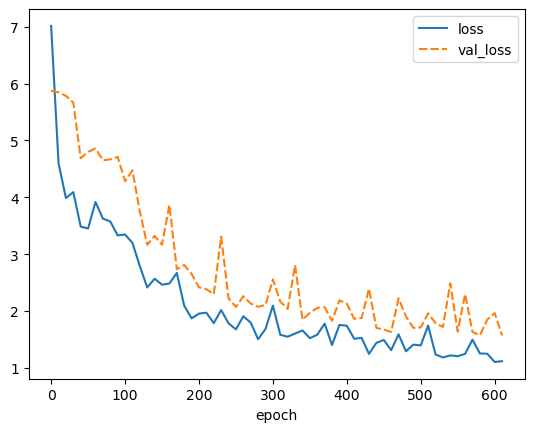

best weights loaded


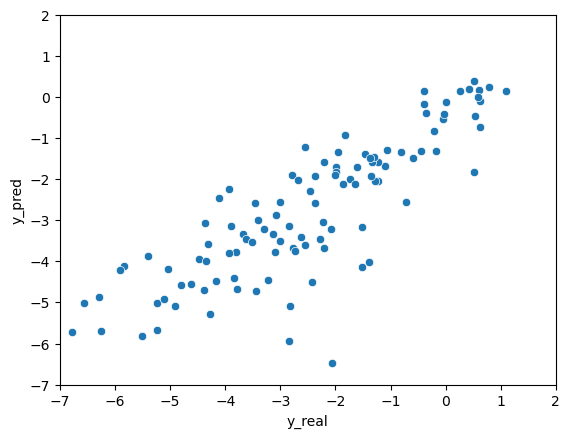

elapsed time: 220.65639400482178
run: 102
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5D2C310>, <torch.utils.data.dataset.Subset object at 0x00000155190976A0>, <torch.utils.data.dataset.Subset object at 0x0000015519097BB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.552362410227458 | Validation Loss 5.536290168762207
Epoch 10 | Train Loss 4.274416796366373 | Validation Loss 5.206637144088745
Epoch 20 | Train Loss 3.659702730178833 | Validation Loss 4.67780601978302
Epoch 30 | Train Loss 3.2633309364318848 | Validation Loss 4.50143575668335
Epoch 40 | Train Loss 2.7072043418884277 | Validation Loss 4.447486996650696
Epoch 50 | Train Loss 2.162096691131592 | Validation Loss 2.8318532705307007
Epoch 60 | Train Loss 2.214770714441935 | Validation Loss 2.8651793003082275
Epoch 70 | Train Loss 1.9182651042938232 | Validation Loss 2.7126790285110474
Epoch 80 | Train Loss 1.6956221421559652 | Validation Loss 2.241715431213379
Epoch 90 | Train Loss 1.775146738688151 | Validation Loss 2.1830888986587524
Epoch 100 | Train Loss 1.8170673926671346 | Validation Loss 2.3260810375213623
Epoch 110 | Train Loss 1.538929537932078 | Validation Loss 1.883542776107788
Epoch 120 | Train Loss 1.5172487854957581 | Validation Loss 2.1465210914611816


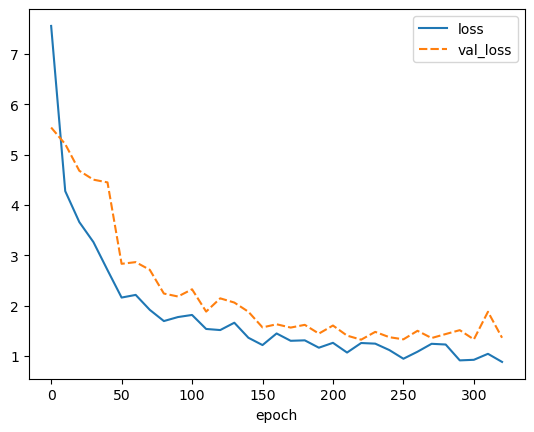

best weights loaded


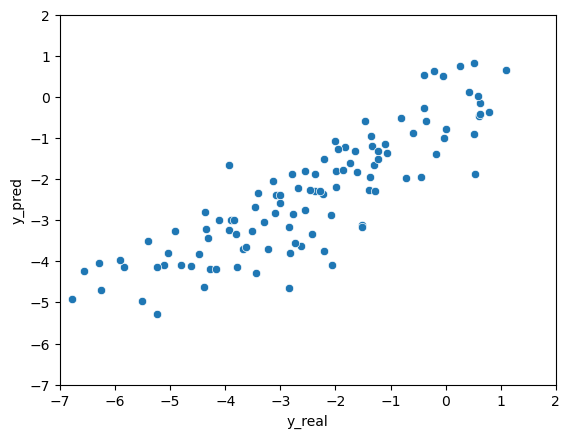

elapsed time: 96.22509932518005
run: 103
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560574460>, <torch.utils.data.dataset.Subset object at 0x00000155D5D51F70>, <torch.utils.data.dataset.Subset object at 0x00000155D5D51BE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.631887181599935 | Validation Loss 5.774928569793701
Epoch 10 | Train Loss 3.4720727761586505 | Validation Loss 4.854473948478699
Epoch 20 | Train Loss 3.217319059371948 | Validation Loss 5.024606227874756
Epoch 30 | Train Loss 2.713303780555725 | Validation Loss 3.326114296913147
Epoch 40 | Train Loss 2.403271190325419 | Validation Loss 2.538829207420349
Epoch 50 | Train Loss 1.7705185174942017 | Validation Loss 2.287194013595581
Epoch 60 | Train Loss 1.8567770719528198 | Validation Loss 2.7771579027175903
Epoch 70 | Train Loss 1.9351158221562703 | Validation Loss 1.8881900310516357
Epoch 80 | Train Loss 1.6852665742238362 | Validation Loss 1.7590319514274597
Epoch 90 | Train Loss 1.297629221280416 | Validation Loss 1.675163447856903
Epoch 100 | Train Loss 1.3008062720298768 | Validation Loss 2.2492533922195435
Epoch 110 | Train Loss 1.8482519706090292 | Validation Loss 2.115462839603424
Epoch 120 | Train Loss 1.1414895137151082 | Validation Loss 1.47954332828521

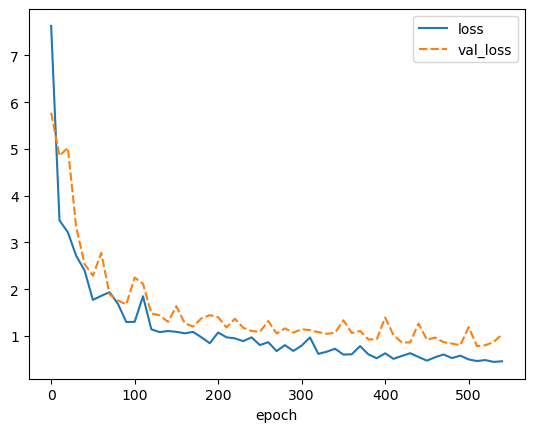

best weights loaded


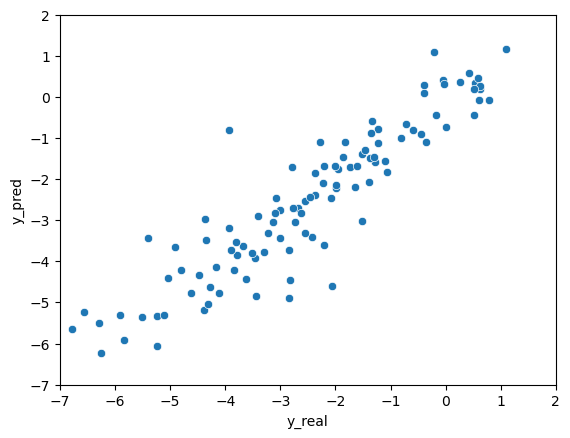

elapsed time: 161.54540729522705
run: 104
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560748340>, <torch.utils.data.dataset.Subset object at 0x00000155D7F940A0>, <torch.utils.data.dataset.Subset object at 0x00000155D7F945B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 12.943553606669107 | Validation Loss 10.013787269592285
Epoch 10 | Train Loss 4.288788302739461 | Validation Loss 5.023760557174683
Epoch 20 | Train Loss 4.266845480600993 | Validation Loss 4.791843056678772
Epoch 30 | Train Loss 3.464639488855998 | Validation Loss 4.36928915977478
Epoch 40 | Train Loss 3.306406331062317 | Validation Loss 3.587791085243225
Epoch 50 | Train Loss 2.9372005144755047 | Validation Loss 3.269397735595703
Epoch 60 | Train Loss 1.957090683778127 | Validation Loss 2.832382082939148
Epoch 70 | Train Loss 1.7653418064117432 | Validation Loss 2.216666102409363
Epoch 80 | Train Loss 1.9066165288289387 | Validation Loss 2.035589098930359
Epoch 90 | Train Loss 1.6742926756540935 | Validation Loss 1.9637081623077393
Epoch 100 | Train Loss 1.4623927831649781 | Validation Loss 2.6140278577804565
Epoch 110 | Train Loss 1.193555196126302 | Validation Loss 1.9031459093093872
Epoch 120 | Train Loss 1.1303612053394319 | Validation Loss 1.5230766534805298

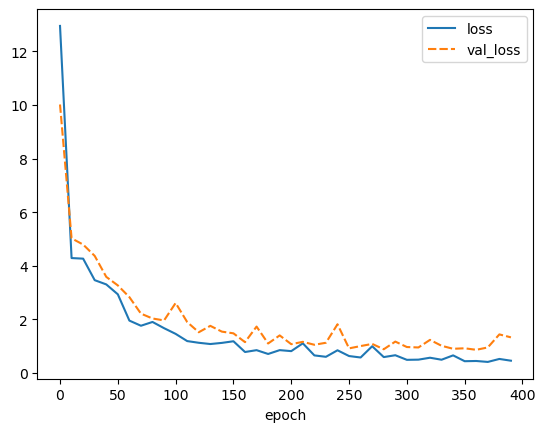

best weights loaded


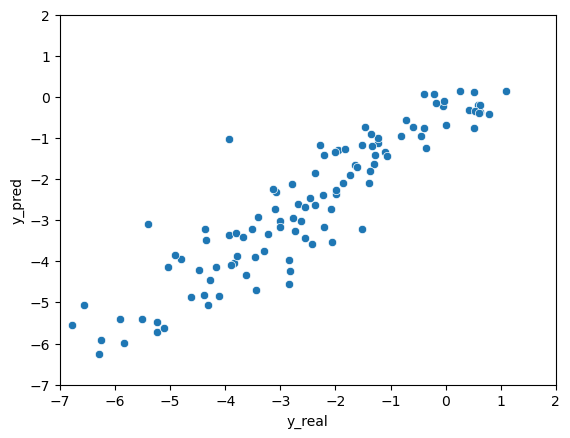

elapsed time: 110.7937364578247
run: 105
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561957160>, <torch.utils.data.dataset.Subset object at 0x00000155D5BC12E0>, <torch.utils.data.dataset.Subset object at 0x00000155D5BC13D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.370152425765991 | Validation Loss 6.346331596374512
Epoch 10 | Train Loss 4.395059569676717 | Validation Loss 6.868753910064697
Epoch 20 | Train Loss 3.9911705017089845 | Validation Loss 5.348338603973389
Epoch 30 | Train Loss 3.876168632507324 | Validation Loss 5.33421516418457
Epoch 40 | Train Loss 3.7238185087839764 | Validation Loss 4.798295497894287
Epoch 50 | Train Loss 3.984900681177775 | Validation Loss 4.93602728843689
Epoch 60 | Train Loss 3.4830368836720784 | Validation Loss 4.895241975784302
Epoch 70 | Train Loss 3.7044424374898273 | Validation Loss 6.047382354736328
Epoch 80 | Train Loss 3.722656075159709 | Validation Loss 4.610894203186035
Epoch 90 | Train Loss 3.3078458309173584 | Validation Loss 4.584432125091553
Epoch 100 | Train Loss 3.2130269209543862 | Validation Loss 4.082488775253296
Epoch 110 | Train Loss 3.1543442726135256 | Validation Loss 5.1894371509552
Epoch 120 | Train Loss 2.873516798019409 | Validation Loss 3.370538830757141
Epoch 1

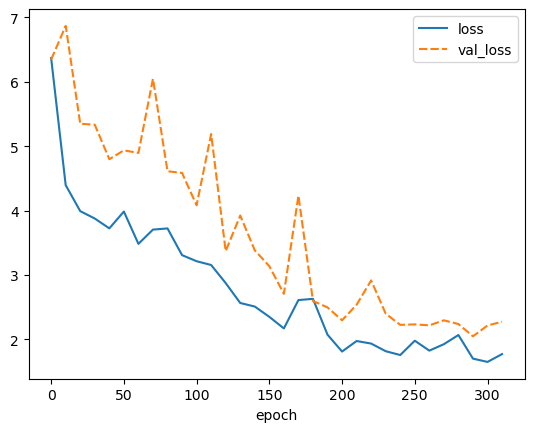

best weights loaded


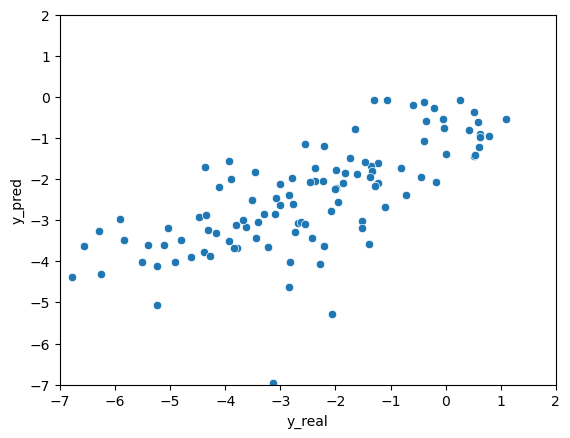

elapsed time: 98.15219449996948
run: 106
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560779C40>, <torch.utils.data.dataset.Subset object at 0x00000155D5D4F850>, <torch.utils.data.dataset.Subset object at 0x00000155D5D4FD60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.869910335540771 | Validation Loss 6.6528379917144775
Epoch 10 | Train Loss 4.4146994749705 | Validation Loss 5.585931301116943
Epoch 20 | Train Loss 3.89380251566569 | Validation Loss 5.228113412857056
Epoch 30 | Train Loss 4.905296277999878 | Validation Loss 5.027094602584839
Epoch 40 | Train Loss 3.859276612599691 | Validation Loss 5.198034286499023
Epoch 50 | Train Loss 3.753197606404622 | Validation Loss 5.096897006034851
Epoch 60 | Train Loss 3.860940170288086 | Validation Loss 5.058927297592163
Epoch 70 | Train Loss 3.5954248905181885 | Validation Loss 4.620631694793701
Epoch 80 | Train Loss 3.3615659634272257 | Validation Loss 4.670253157615662
Epoch 90 | Train Loss 3.559562397003174 | Validation Loss 4.425069093704224
Epoch 100 | Train Loss 3.2471404234568277 | Validation Loss 4.365091800689697
Epoch 110 | Train Loss 2.975530966122945 | Validation Loss 3.8294122219085693
Epoch 120 | Train Loss 2.7765039205551147 | Validation Loss 4.212282419204712
Epoch 1

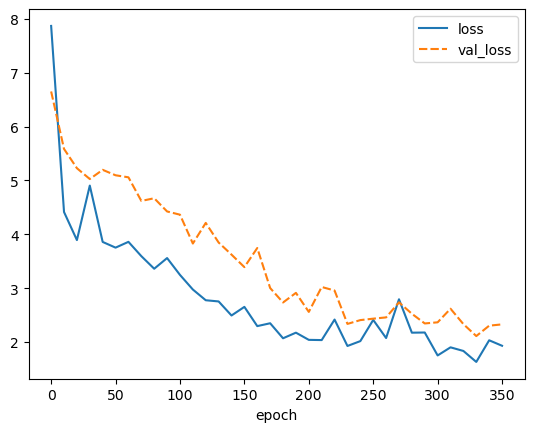

best weights loaded


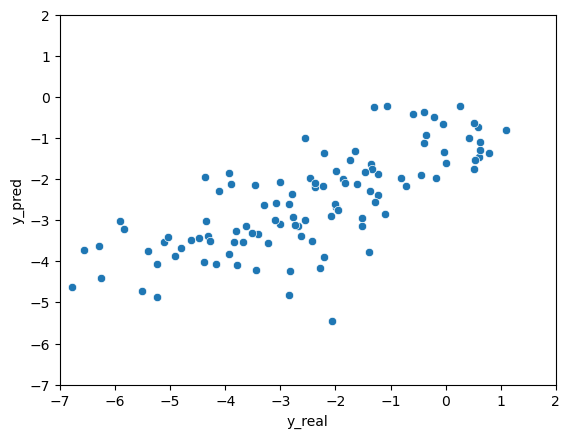

elapsed time: 125.84123182296753
run: 107
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5C0C070>, <torch.utils.data.dataset.Subset object at 0x0000015560648670>, <torch.utils.data.dataset.Subset object at 0x00000155D5D196D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 12.66395975748698 | Validation Loss 14.792858123779297
Epoch 10 | Train Loss 4.487864716847738 | Validation Loss 5.611710548400879
Epoch 20 | Train Loss 4.631210517883301 | Validation Loss 6.250711917877197
Epoch 30 | Train Loss 4.289443906148275 | Validation Loss 5.3025805950164795
Epoch 40 | Train Loss 3.921245002746582 | Validation Loss 5.271792650222778
Epoch 50 | Train Loss 3.884261719385783 | Validation Loss 5.340651512145996
Epoch 60 | Train Loss 3.80672295888265 | Validation Loss 4.725567579269409
Epoch 70 | Train Loss 3.7054749965667724 | Validation Loss 4.8796916007995605
Epoch 80 | Train Loss 3.481994454065959 | Validation Loss 4.796022653579712
Epoch 90 | Train Loss 3.628135601679484 | Validation Loss 5.2201642990112305
Epoch 100 | Train Loss 3.3865731716156007 | Validation Loss 4.371619701385498
Epoch 110 | Train Loss 2.9589593172073365 | Validation Loss 3.975618362426758
Epoch 120 | Train Loss 2.7485531489054362 | Validation Loss 3.521463632583618
Epo

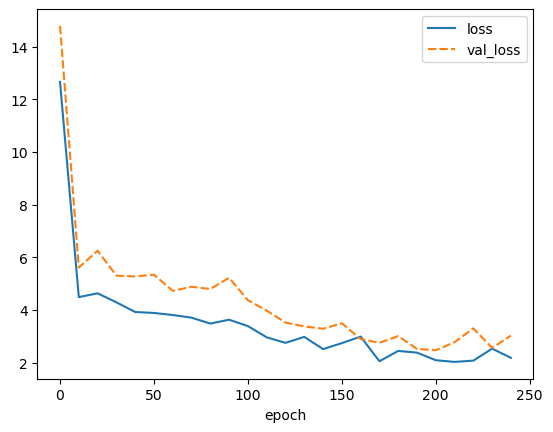

best weights loaded


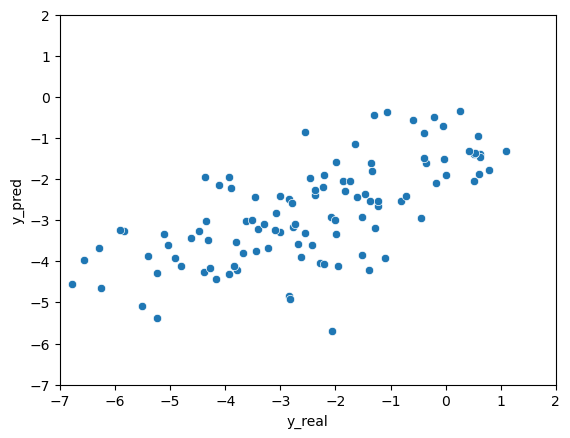

elapsed time: 90.34335708618164
run: 108
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155191B00D0>, <torch.utils.data.dataset.Subset object at 0x0000015560562910>, <torch.utils.data.dataset.Subset object at 0x0000015560562E20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 12.403159554799398 | Validation Loss 12.770084857940674
Epoch 10 | Train Loss 4.617401774724325 | Validation Loss 5.504487752914429
Epoch 20 | Train Loss 4.194055461883545 | Validation Loss 5.1939170360565186
Epoch 30 | Train Loss 3.8023989955584208 | Validation Loss 4.9955713748931885
Epoch 40 | Train Loss 3.85945192972819 | Validation Loss 5.30443000793457
Epoch 50 | Train Loss 3.8167856693267823 | Validation Loss 4.866738796234131
Epoch 60 | Train Loss 3.7068822622299193 | Validation Loss 5.089754343032837
Epoch 70 | Train Loss 3.530325094858805 | Validation Loss 4.75111997127533
Epoch 80 | Train Loss 3.5906044960021974 | Validation Loss 4.988916873931885
Epoch 90 | Train Loss 3.6388264973958333 | Validation Loss 4.736210107803345
Epoch 100 | Train Loss 3.411420297622681 | Validation Loss 4.90637731552124
Epoch 110 | Train Loss 3.366564416885376 | Validation Loss 4.565895080566406
Epoch 120 | Train Loss 3.2711202621459963 | Validation Loss 3.997454524040222
Epoc

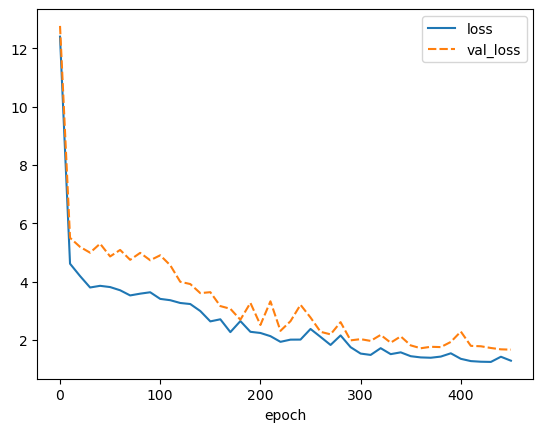

best weights loaded


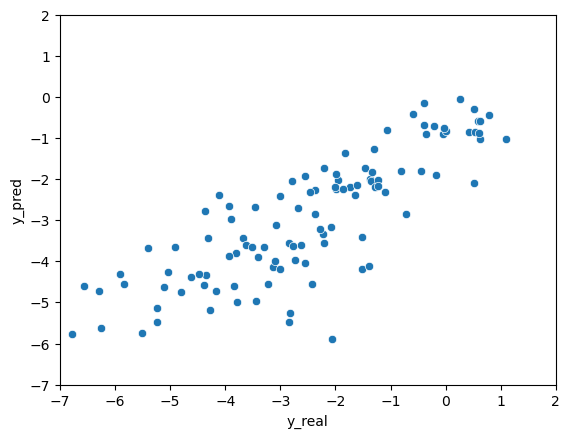

elapsed time: 161.37788796424866
run: 109
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605F72B0>, <torch.utils.data.dataset.Subset object at 0x00000155D80290D0>, <torch.utils.data.dataset.Subset object at 0x00000155D80296D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.703421179453532 | Validation Loss 8.024628639221191
Epoch 10 | Train Loss 4.00970180829366 | Validation Loss 5.288900136947632
Epoch 20 | Train Loss 3.788731241226196 | Validation Loss 4.7576682567596436
Epoch 30 | Train Loss 3.360548655192057 | Validation Loss 4.4985963106155396
Epoch 40 | Train Loss 2.902854601542155 | Validation Loss 3.803530216217041
Epoch 50 | Train Loss 2.473463996251424 | Validation Loss 3.244964599609375
Epoch 60 | Train Loss 2.220252744356791 | Validation Loss 2.7674903869628906
Epoch 70 | Train Loss 2.4643864313761394 | Validation Loss 3.056052327156067
Epoch 80 | Train Loss 1.7731071392695108 | Validation Loss 2.581700325012207
Epoch 90 | Train Loss 1.698350183169047 | Validation Loss 2.616759419441223
Epoch 100 | Train Loss 1.8435129086176554 | Validation Loss 2.071889102458954
Epoch 110 | Train Loss 1.605366047223409 | Validation Loss 2.1428619623184204
Epoch 120 | Train Loss 1.669107206662496 | Validation Loss 2.4818767309188843
Ep

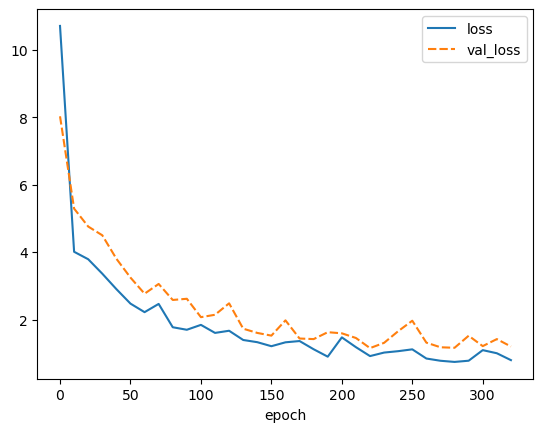

best weights loaded


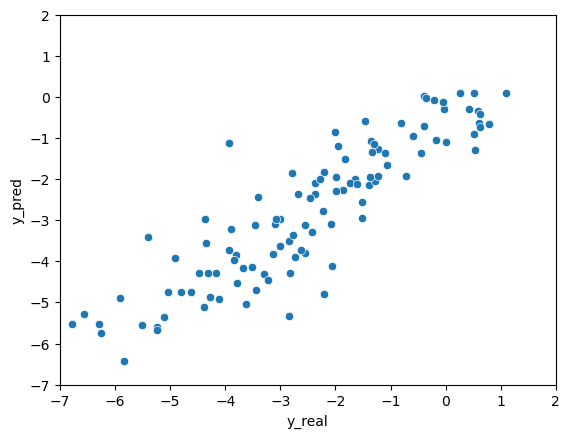

elapsed time: 133.97061252593994
run: 110
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5B47730>, <torch.utils.data.dataset.Subset object at 0x000001556056ED90>, <torch.utils.data.dataset.Subset object at 0x000001556056E7C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.547020657857259 | Validation Loss 6.0344767570495605
Epoch 10 | Train Loss 2.905602749188741 | Validation Loss 3.6877198219299316
Epoch 20 | Train Loss 2.573961591720581 | Validation Loss 3.1210473775863647
Epoch 30 | Train Loss 2.1119316736857097 | Validation Loss 2.003817558288574
Epoch 40 | Train Loss 1.7033838510513306 | Validation Loss 1.8458096385002136
Epoch 50 | Train Loss 1.3731206814448038 | Validation Loss 1.8044849038124084
Epoch 60 | Train Loss 1.3012222210566202 | Validation Loss 1.5753455758094788
Epoch 70 | Train Loss 1.2535495678583781 | Validation Loss 1.3919484615325928
Epoch 80 | Train Loss 1.0026004672050477 | Validation Loss 1.332817792892456
Epoch 90 | Train Loss 0.9590425511201223 | Validation Loss 1.362534999847412
Epoch 100 | Train Loss 0.9293419182300567 | Validation Loss 1.1947928667068481
Epoch 110 | Train Loss 0.8532881736755371 | Validation Loss 1.0831958055496216
Epoch 120 | Train Loss 0.752770604689916 | Validation Loss 1.19425427

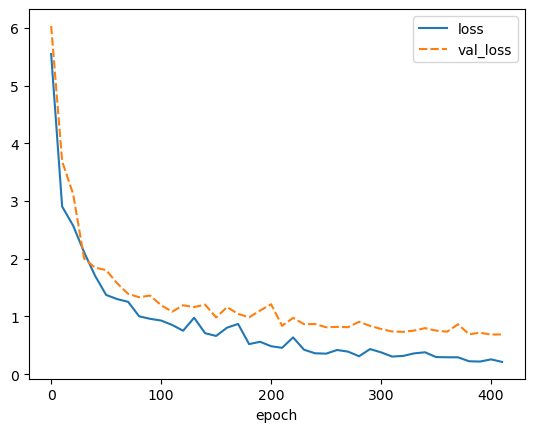

best weights loaded


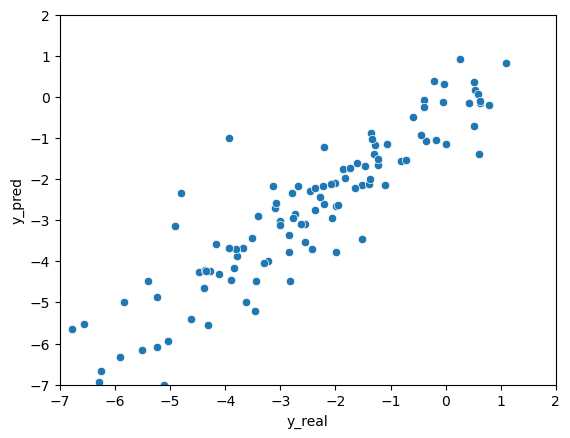

elapsed time: 149.38430190086365
run: 111
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561A01460>, <torch.utils.data.dataset.Subset object at 0x00000155D80391C0>, <torch.utils.data.dataset.Subset object at 0x00000155D80396D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.422623221079508 | Validation Loss 5.598214149475098
Epoch 10 | Train Loss 4.45242862701416 | Validation Loss 5.672729253768921
Epoch 20 | Train Loss 4.0201701641082765 | Validation Loss 5.579964637756348
Epoch 30 | Train Loss 3.5904685497283935 | Validation Loss 4.9489405155181885
Epoch 40 | Train Loss 3.538387982050578 | Validation Loss 4.528126120567322
Epoch 50 | Train Loss 3.4097622791926065 | Validation Loss 4.86889123916626
Epoch 60 | Train Loss 3.3316081523895265 | Validation Loss 4.273853540420532
Epoch 70 | Train Loss 3.5104259490966796 | Validation Loss 4.351248741149902
Epoch 80 | Train Loss 3.1229966560999554 | Validation Loss 4.330646991729736
Epoch 90 | Train Loss 3.1094509760538735 | Validation Loss 3.9966869354248047
Epoch 100 | Train Loss 2.7400941530863445 | Validation Loss 3.958592176437378
Epoch 110 | Train Loss 3.1928191741307574 | Validation Loss 3.3793752193450928
Epoch 120 | Train Loss 2.569426727294922 | Validation Loss 3.1848063468933105

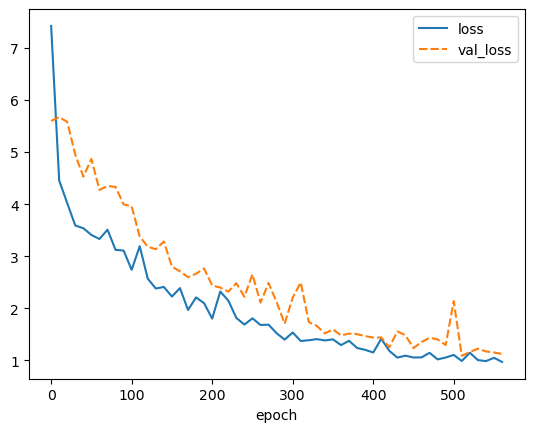

best weights loaded


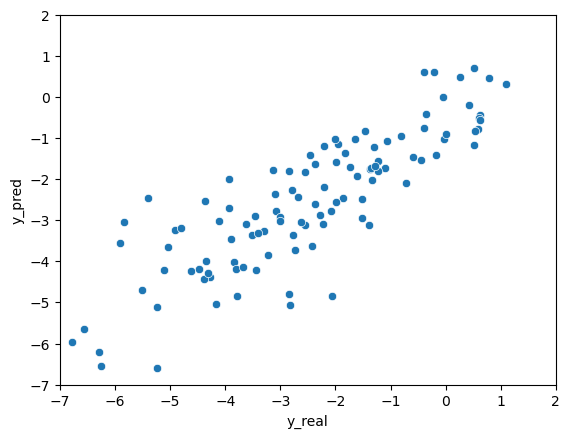

elapsed time: 211.7445511817932
run: 112
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5C00160>, <torch.utils.data.dataset.Subset object at 0x00000155D5B4C1C0>, <torch.utils.data.dataset.Subset object at 0x000001556185E280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.263655893007914 | Validation Loss 5.597774028778076
Epoch 10 | Train Loss 3.77081671555837 | Validation Loss 4.959116697311401
Epoch 20 | Train Loss 3.724010769526164 | Validation Loss 4.665389776229858
Epoch 30 | Train Loss 3.4503759225209554 | Validation Loss 3.990149974822998
Epoch 40 | Train Loss 2.8364943822224933 | Validation Loss 3.6323556900024414
Epoch 50 | Train Loss 2.5656908988952636 | Validation Loss 3.2552887201309204
Epoch 60 | Train Loss 2.252319343884786 | Validation Loss 3.009707450866699
Epoch 70 | Train Loss 2.188312021891276 | Validation Loss 3.0686084032058716
Epoch 80 | Train Loss 2.3393476724624636 | Validation Loss 2.5855553150177
Epoch 90 | Train Loss 1.808521326382955 | Validation Loss 2.0804625153541565
Epoch 100 | Train Loss 1.8498841484387716 | Validation Loss 2.1397050619125366
Epoch 110 | Train Loss 1.8657300233840943 | Validation Loss 1.9014869928359985
Epoch 120 | Train Loss 2.0557472467422486 | Validation Loss 3.177181363105774


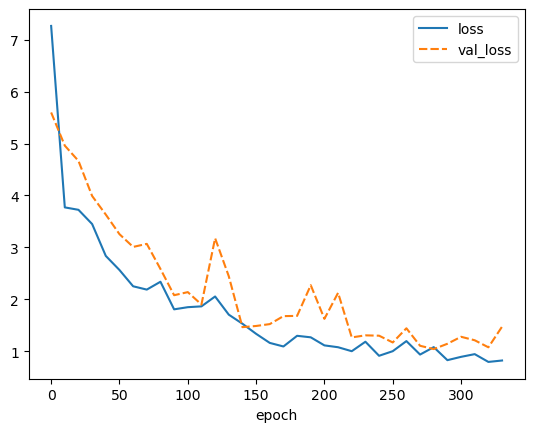

best weights loaded


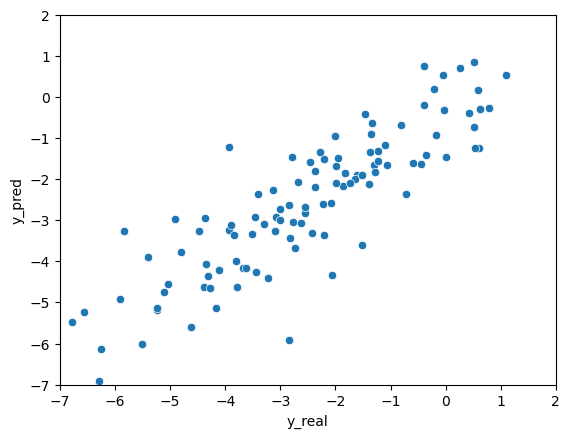

elapsed time: 129.33892560005188
run: 113
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561AA5970>, <torch.utils.data.dataset.Subset object at 0x00000155D7FEBBB0>, <torch.utils.data.dataset.Subset object at 0x00000155D7E80100>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.592911370595297 | Validation Loss 5.948977470397949
Epoch 10 | Train Loss 3.863875993092855 | Validation Loss 4.876919984817505
Epoch 20 | Train Loss 3.006003753344218 | Validation Loss 4.049995303153992
Epoch 30 | Train Loss 2.66127823193868 | Validation Loss 3.8506025075912476
Epoch 40 | Train Loss 2.454577573140462 | Validation Loss 3.589469075202942
Epoch 50 | Train Loss 2.3107938528060914 | Validation Loss 2.909466028213501
Epoch 60 | Train Loss 2.0343137343724567 | Validation Loss 2.9681535959243774
Epoch 70 | Train Loss 2.094595257441203 | Validation Loss 2.6864386796951294
Epoch 80 | Train Loss 1.832588005065918 | Validation Loss 2.1389021277427673
Epoch 90 | Train Loss 1.6546384731928507 | Validation Loss 2.1321884393692017
Epoch 100 | Train Loss 1.772266165415446 | Validation Loss 2.306127429008484
Epoch 110 | Train Loss 1.5333239912986756 | Validation Loss 1.8893834948539734
Epoch 120 | Train Loss 1.6680219888687133 | Validation Loss 1.8966701030731201

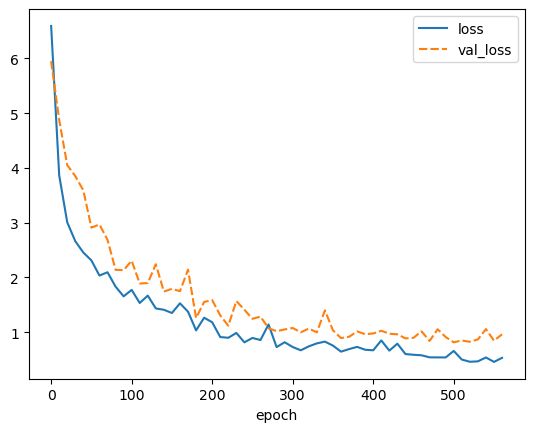

best weights loaded


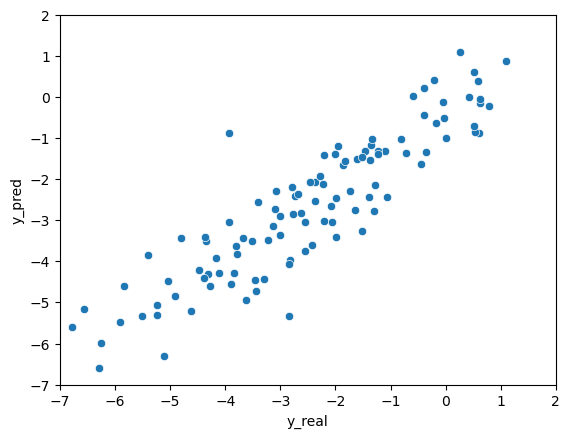

elapsed time: 218.3651089668274
run: 114
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561866640>, <torch.utils.data.dataset.Subset object at 0x00000155191284C0>, <torch.utils.data.dataset.Subset object at 0x00000155606957C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.915014330546061 | Validation Loss 11.63630485534668
Epoch 10 | Train Loss 4.092242606480917 | Validation Loss 6.863872528076172
Epoch 20 | Train Loss 3.67589750289917 | Validation Loss 4.620198965072632
Epoch 30 | Train Loss 2.866713519891103 | Validation Loss 4.4095669984817505
Epoch 40 | Train Loss 2.5941563129425047 | Validation Loss 3.443562150001526
Epoch 50 | Train Loss 2.032444461186727 | Validation Loss 2.622278153896332
Epoch 60 | Train Loss 2.2160818258921307 | Validation Loss 2.3426434993743896
Epoch 70 | Train Loss 1.7636286934216818 | Validation Loss 1.7436421513557434
Epoch 80 | Train Loss 1.5608984549840292 | Validation Loss 1.8583883047103882
Epoch 90 | Train Loss 1.5316187918186188 | Validation Loss 1.881425380706787
Epoch 100 | Train Loss 1.3038339138031005 | Validation Loss 1.6323025822639465
Epoch 110 | Train Loss 1.2215576370557149 | Validation Loss 1.5321504473686218
Epoch 120 | Train Loss 1.5602564454078673 | Validation Loss 1.5738114118576

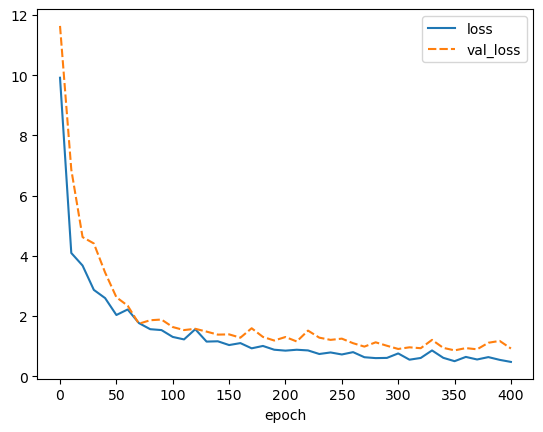

best weights loaded


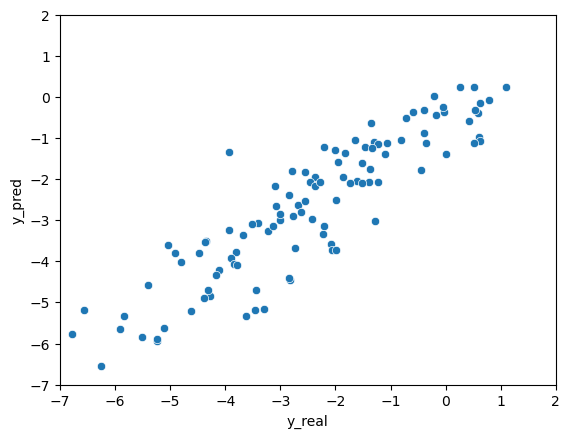

elapsed time: 157.29831218719482
run: 115
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5AB5C40>, <torch.utils.data.dataset.Subset object at 0x00000155D7F760A0>, <torch.utils.data.dataset.Subset object at 0x00000155D7F765B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.678482071558634 | Validation Loss 5.9776976108551025
Epoch 10 | Train Loss 4.031358655293783 | Validation Loss 5.534587383270264
Epoch 20 | Train Loss 4.106580988566081 | Validation Loss 5.501392841339111
Epoch 30 | Train Loss 3.85971999168396 | Validation Loss 5.093835353851318
Epoch 40 | Train Loss 3.698710536956787 | Validation Loss 4.629157781600952
Epoch 50 | Train Loss 3.7495317776997883 | Validation Loss 4.456950545310974
Epoch 60 | Train Loss 3.649280293782552 | Validation Loss 4.911956310272217
Epoch 70 | Train Loss 3.747310694058736 | Validation Loss 4.650511741638184
Epoch 80 | Train Loss 3.3942798137664796 | Validation Loss 4.278517246246338
Epoch 90 | Train Loss 3.2122814814249674 | Validation Loss 4.195450305938721
Epoch 100 | Train Loss 2.87451016108195 | Validation Loss 3.7072300910949707
Epoch 110 | Train Loss 2.8562801281611123 | Validation Loss 3.569001078605652
Epoch 120 | Train Loss 2.7034175912539165 | Validation Loss 3.3754905462265015
Epoc

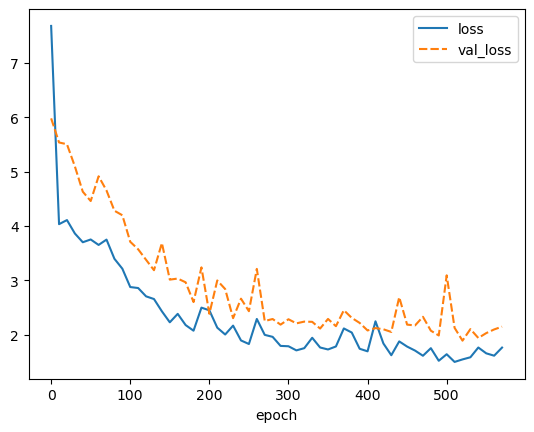

best weights loaded


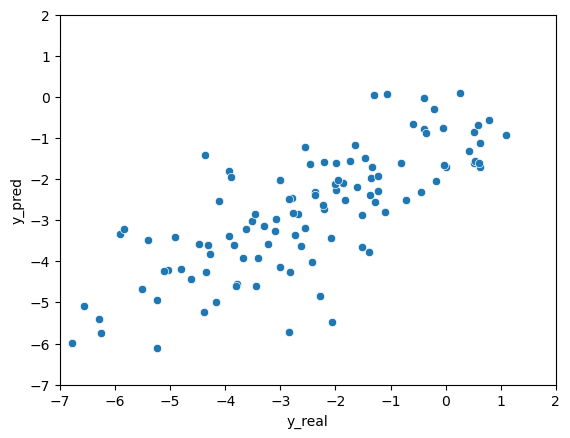

elapsed time: 264.2654824256897
run: 116
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015559FEEF40>, <torch.utils.data.dataset.Subset object at 0x00000155191287C0>, <torch.utils.data.dataset.Subset object at 0x000001551914F310>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.861570024490357 | Validation Loss 6.179029941558838
Epoch 10 | Train Loss 4.339305996894836 | Validation Loss 6.759854316711426
Epoch 20 | Train Loss 4.525475430488586 | Validation Loss 5.515082240104675
Epoch 30 | Train Loss 3.843060755729675 | Validation Loss 5.242677211761475
Epoch 40 | Train Loss 3.6632352828979493 | Validation Loss 4.957573771476746
Epoch 50 | Train Loss 3.5859225432078046 | Validation Loss 5.586184978485107
Epoch 60 | Train Loss 3.4530471245447796 | Validation Loss 5.131271600723267
Epoch 70 | Train Loss 3.5427613576253254 | Validation Loss 5.425445556640625
Epoch 80 | Train Loss 3.4150950431823732 | Validation Loss 4.656132459640503
Epoch 90 | Train Loss 3.236173486709595 | Validation Loss 4.5357325077056885
Epoch 100 | Train Loss 3.1441542148590087 | Validation Loss 4.081722259521484
Epoch 110 | Train Loss 3.062981669108073 | Validation Loss 3.683242082595825
Epoch 120 | Train Loss 2.8684847354888916 | Validation Loss 3.789940595626831
Ep

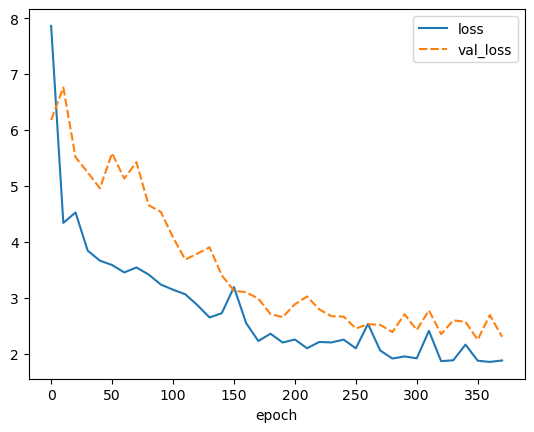

best weights loaded


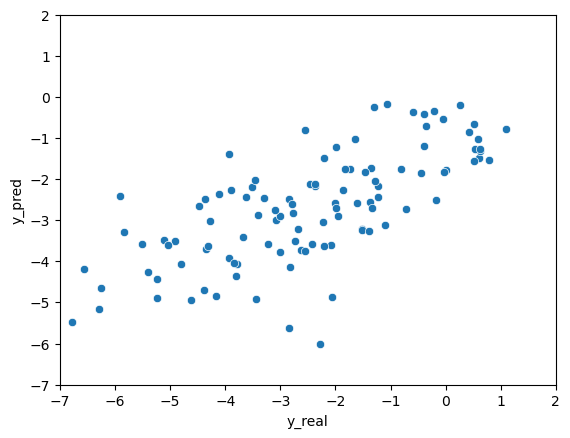

elapsed time: 203.77420091629028
run: 117
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155619AE160>, <torch.utils.data.dataset.Subset object at 0x00000155D800A040>, <torch.utils.data.dataset.Subset object at 0x00000155D800A430>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 12.103878815968832 | Validation Loss 12.388063430786133
Epoch 10 | Train Loss 4.729709466298421 | Validation Loss 5.397446513175964
Epoch 20 | Train Loss 4.362202628453573 | Validation Loss 5.1931822299957275
Epoch 30 | Train Loss 4.100210444132487 | Validation Loss 5.190744876861572
Epoch 40 | Train Loss 3.8917578856150308 | Validation Loss 4.787457823753357
Epoch 50 | Train Loss 4.128452269236247 | Validation Loss 4.768482446670532
Epoch 60 | Train Loss 3.5926868120829263 | Validation Loss 4.517838001251221
Epoch 70 | Train Loss 3.663947105407715 | Validation Loss 4.356348276138306
Epoch 80 | Train Loss 3.4759331305821735 | Validation Loss 4.4835755825042725
Epoch 90 | Train Loss 3.6492912769317627 | Validation Loss 4.463294148445129
Epoch 100 | Train Loss 3.3083327611287436 | Validation Loss 4.170974254608154
Epoch 110 | Train Loss 3.0083057085673013 | Validation Loss 3.841660261154175
Epoch 120 | Train Loss 2.6709917386372886 | Validation Loss 3.912618160247802

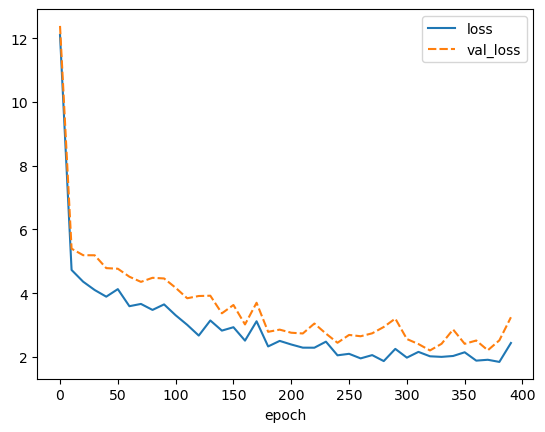

best weights loaded


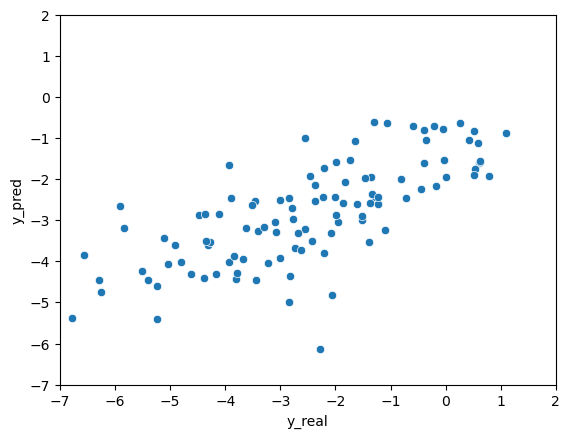

elapsed time: 253.53657793998718
run: 118
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5A9FA60>, <torch.utils.data.dataset.Subset object at 0x00000155D5B4C1F0>, <torch.utils.data.dataset.Subset object at 0x00000155D5B4CC70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 13.85874220530192 | Validation Loss 16.96426010131836
Epoch 10 | Train Loss 4.877200063069662 | Validation Loss 6.608083009719849
Epoch 20 | Train Loss 4.32281125386556 | Validation Loss 6.0057878494262695
Epoch 30 | Train Loss 4.0154346625010175 | Validation Loss 4.9982709884643555
Epoch 40 | Train Loss 3.987148078282674 | Validation Loss 4.286680340766907
Epoch 50 | Train Loss 3.682778803507487 | Validation Loss 4.85938024520874
Epoch 60 | Train Loss 3.753633960088094 | Validation Loss 5.168288230895996
Epoch 70 | Train Loss 3.223750694592794 | Validation Loss 4.41204309463501
Epoch 80 | Train Loss 3.2100325504938763 | Validation Loss 4.572311878204346
Epoch 90 | Train Loss 3.3325833479563394 | Validation Loss 4.310999035835266
Epoch 100 | Train Loss 3.1097433090209963 | Validation Loss 4.209047198295593
Epoch 110 | Train Loss 2.848329710960388 | Validation Loss 3.6306854486465454
Epoch 120 | Train Loss 2.985257943471273 | Validation Loss 3.947924256324768
Epoch 

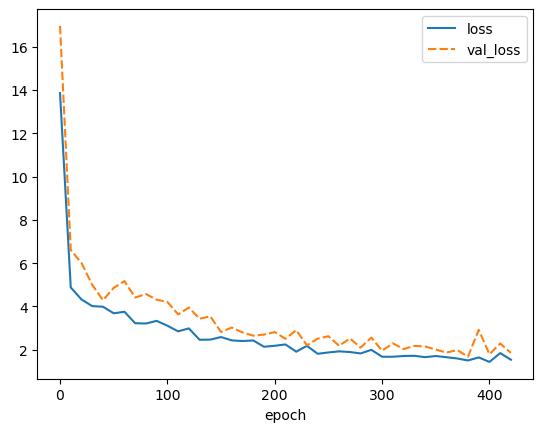

best weights loaded


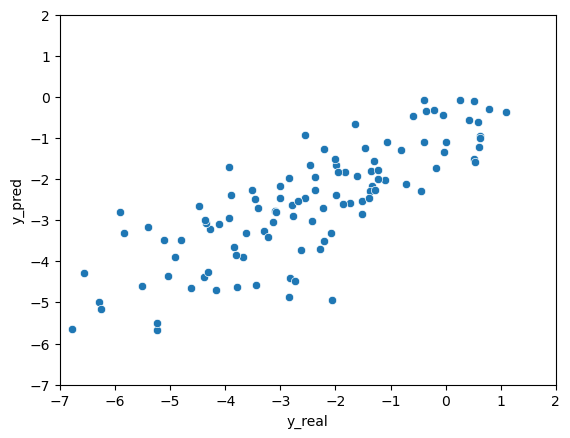

elapsed time: 250.37427496910095
run: 119
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561985670>, <torch.utils.data.dataset.Subset object at 0x00000155D8027670>, <torch.utils.data.dataset.Subset object at 0x00000155D8027CD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.521123472849528 | Validation Loss 9.419015407562256
Epoch 10 | Train Loss 4.2068421840667725 | Validation Loss 5.293226480484009
Epoch 20 | Train Loss 3.4746719280878704 | Validation Loss 5.152694582939148
Epoch 30 | Train Loss 3.473174063364665 | Validation Loss 4.315042734146118
Epoch 40 | Train Loss 2.932213131586711 | Validation Loss 3.3257611989974976
Epoch 50 | Train Loss 2.4623940785725913 | Validation Loss 3.302605152130127
Epoch 60 | Train Loss 2.202882440884908 | Validation Loss 2.6108349561691284
Epoch 70 | Train Loss 2.086323086420695 | Validation Loss 2.4666171073913574
Epoch 80 | Train Loss 1.736538553237915 | Validation Loss 2.1271448135375977
Epoch 90 | Train Loss 1.8534042755762736 | Validation Loss 2.0407124757766724
Epoch 100 | Train Loss 1.8449230432510375 | Validation Loss 1.9368982315063477
Epoch 110 | Train Loss 1.4339770952860513 | Validation Loss 1.930207908153534
Epoch 120 | Train Loss 1.6214725971221924 | Validation Loss 2.034591197967

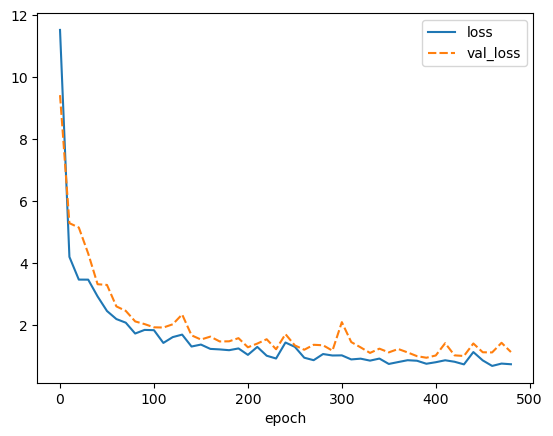

best weights loaded


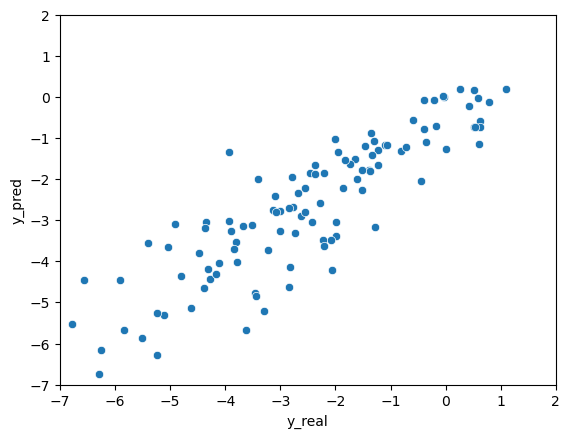

elapsed time: 250.8488233089447
run: 120
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560620880>, <torch.utils.data.dataset.Subset object at 0x000001556078AA90>, <torch.utils.data.dataset.Subset object at 0x00000155D7F6D730>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.883257261912028 | Validation Loss 5.527678966522217
Epoch 10 | Train Loss 3.5490986347198485 | Validation Loss 4.139546990394592
Epoch 20 | Train Loss 2.17875083287557 | Validation Loss 2.5368999242782593
Epoch 30 | Train Loss 1.688582189877828 | Validation Loss 1.906036138534546
Epoch 40 | Train Loss 1.7207931359608968 | Validation Loss 1.79141366481781
Epoch 50 | Train Loss 1.4262494007746378 | Validation Loss 1.8416737914085388
Epoch 60 | Train Loss 1.2331032435099283 | Validation Loss 1.2999719381332397
Epoch 70 | Train Loss 1.1301966071128846 | Validation Loss 1.1544702053070068
Epoch 80 | Train Loss 0.9319392959276835 | Validation Loss 1.21524578332901
Epoch 90 | Train Loss 0.6859380682309468 | Validation Loss 1.0184979140758514
Epoch 100 | Train Loss 0.7324575841426849 | Validation Loss 1.0005619823932648
Epoch 110 | Train Loss 0.7438716431458791 | Validation Loss 0.9551161229610443
Epoch 120 | Train Loss 0.5411788880825043 | Validation Loss 0.867108792066

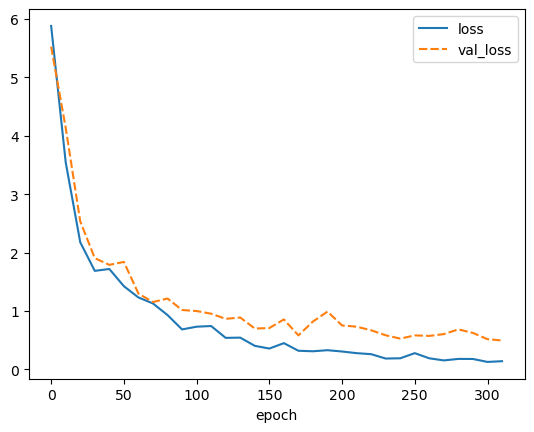

best weights loaded


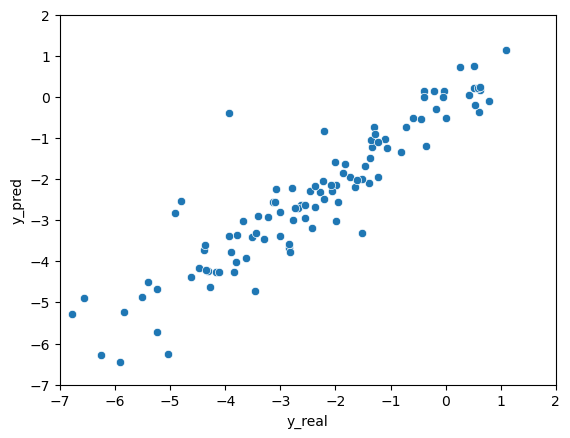

elapsed time: 171.13820791244507
run: 121
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155606367F0>, <torch.utils.data.dataset.Subset object at 0x0000015516DB49D0>, <torch.utils.data.dataset.Subset object at 0x0000015516DB4EE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.923735650380452 | Validation Loss 5.751275539398193
Epoch 10 | Train Loss 4.583457152048747 | Validation Loss 5.456876754760742
Epoch 20 | Train Loss 4.080454111099243 | Validation Loss 5.385913610458374
Epoch 30 | Train Loss 3.7904780228932697 | Validation Loss 4.9824278354644775
Epoch 40 | Train Loss 4.009764655431112 | Validation Loss 4.746431827545166
Epoch 50 | Train Loss 3.6640629291534426 | Validation Loss 4.3753228187561035
Epoch 60 | Train Loss 3.3781282107035318 | Validation Loss 4.8250391483306885
Epoch 70 | Train Loss 3.2680968046188354 | Validation Loss 4.498553991317749
Epoch 80 | Train Loss 3.3445239702860516 | Validation Loss 4.34628438949585
Epoch 90 | Train Loss 3.320340887705485 | Validation Loss 4.058588981628418
Epoch 100 | Train Loss 2.8552281141281126 | Validation Loss 3.7829021215438843
Epoch 110 | Train Loss 2.798864475886027 | Validation Loss 4.203590989112854
Epoch 120 | Train Loss 2.9893313725789388 | Validation Loss 3.4651355743408203

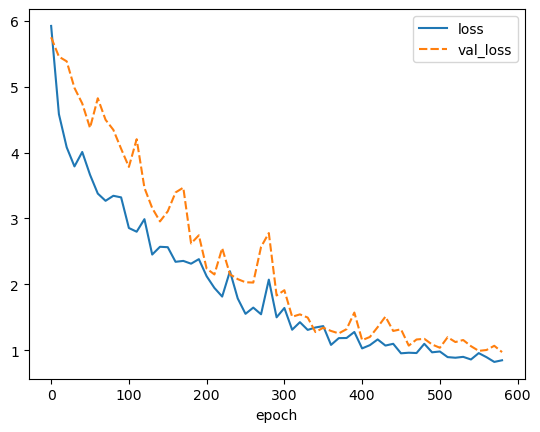

best weights loaded


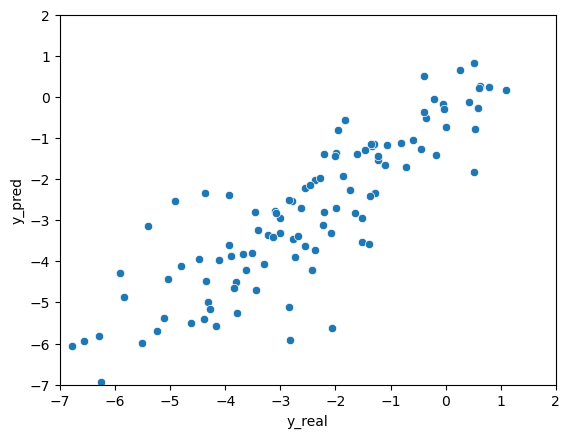

elapsed time: 350.4563055038452
run: 122
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015519052490>, <torch.utils.data.dataset.Subset object at 0x0000015561AA0F40>, <torch.utils.data.dataset.Subset object at 0x0000015561AA0130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.8263660907745365 | Validation Loss 5.492863655090332
Epoch 10 | Train Loss 4.3393047968546545 | Validation Loss 6.496896982192993
Epoch 20 | Train Loss 4.238932005564371 | Validation Loss 5.874710321426392
Epoch 30 | Train Loss 3.7183135032653807 | Validation Loss 5.024359941482544
Epoch 40 | Train Loss 3.290470027923584 | Validation Loss 3.840959668159485
Epoch 50 | Train Loss 2.3073766271273297 | Validation Loss 3.0366921424865723
Epoch 60 | Train Loss 2.6668793121973673 | Validation Loss 3.5066288709640503
Epoch 70 | Train Loss 2.1554867108662923 | Validation Loss 3.4171139001846313
Epoch 80 | Train Loss 1.8311817010243734 | Validation Loss 2.753377318382263
Epoch 90 | Train Loss 1.7345059951146444 | Validation Loss 2.9043307304382324
Epoch 100 | Train Loss 1.7103103796641033 | Validation Loss 2.358175814151764
Epoch 110 | Train Loss 1.7265871524810792 | Validation Loss 1.9434195756912231
Epoch 120 | Train Loss 1.5231218735376995 | Validation Loss 1.8631508946

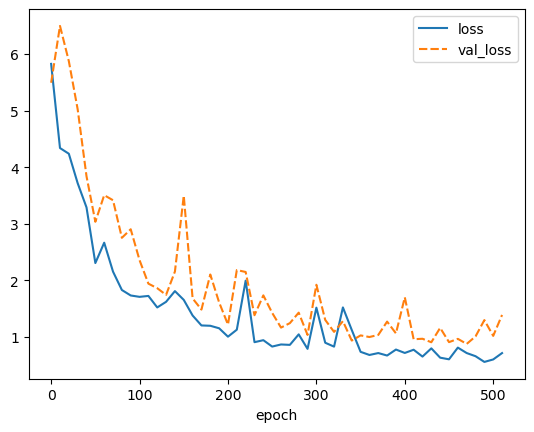

best weights loaded


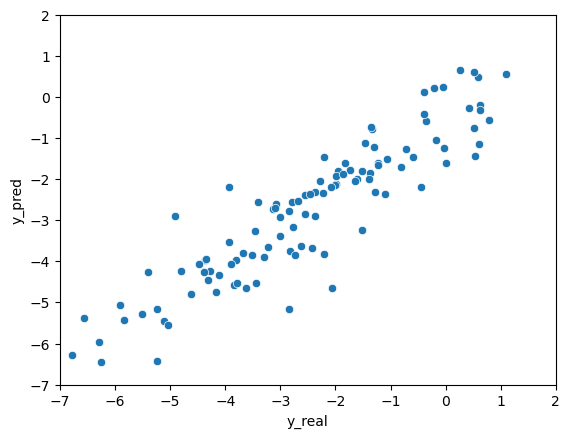

elapsed time: 303.1786091327667
run: 123
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5B64310>, <torch.utils.data.dataset.Subset object at 0x000001553BD65E50>, <torch.utils.data.dataset.Subset object at 0x00000155605B53A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.097284603118896 | Validation Loss 5.604970693588257
Epoch 10 | Train Loss 3.6492530981699627 | Validation Loss 6.504599094390869
Epoch 20 | Train Loss 3.3925620714823403 | Validation Loss 4.401862144470215
Epoch 30 | Train Loss 2.8484444777170816 | Validation Loss 2.934362769126892
Epoch 40 | Train Loss 2.699595093727112 | Validation Loss 2.6995992064476013
Epoch 50 | Train Loss 2.0103259722391766 | Validation Loss 2.3115646839141846
Epoch 60 | Train Loss 1.9992702682813008 | Validation Loss 3.5651334524154663
Epoch 70 | Train Loss 1.8371782541275024 | Validation Loss 2.033829152584076
Epoch 80 | Train Loss 1.5045230627059936 | Validation Loss 1.8316072821617126
Epoch 90 | Train Loss 1.332033924261729 | Validation Loss 1.5780684351921082
Epoch 100 | Train Loss 1.5234930435816447 | Validation Loss 1.6310712695121765
Epoch 110 | Train Loss 1.2144562562306722 | Validation Loss 1.6134819984436035
Epoch 120 | Train Loss 1.0863578120867412 | Validation Loss 1.264885902

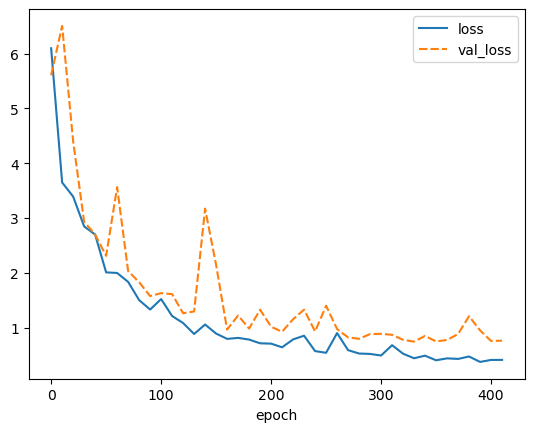

best weights loaded


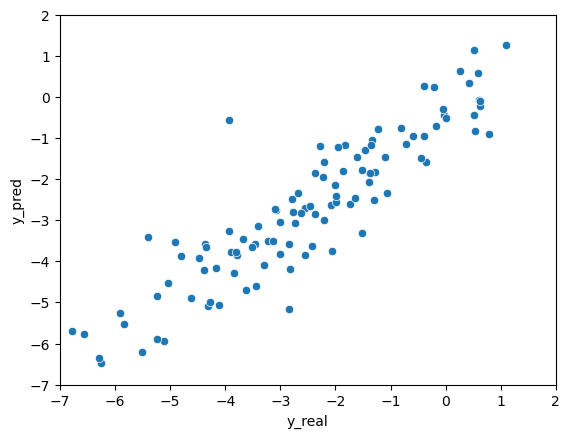

elapsed time: 213.31934332847595
run: 124
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001553BD9BD90>, <torch.utils.data.dataset.Subset object at 0x00000155DB122040>, <torch.utils.data.dataset.Subset object at 0x00000155DB122550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.330249245961507 | Validation Loss 5.666887521743774
Epoch 10 | Train Loss 4.253976281483968 | Validation Loss 5.7005743980407715
Epoch 20 | Train Loss 3.076414696375529 | Validation Loss 3.9636623859405518
Epoch 30 | Train Loss 2.6750440994898477 | Validation Loss 2.746903896331787
Epoch 40 | Train Loss 2.015876046816508 | Validation Loss 1.9848610758781433
Epoch 50 | Train Loss 1.6699481010437012 | Validation Loss 1.8763697743415833
Epoch 60 | Train Loss 1.50398162206014 | Validation Loss 1.8438798785209656
Epoch 70 | Train Loss 1.5402101635932923 | Validation Loss 1.6558130383491516
Epoch 80 | Train Loss 1.1463361700375876 | Validation Loss 2.2062408328056335
Epoch 90 | Train Loss 1.5131760358810424 | Validation Loss 1.8489418029785156
Epoch 100 | Train Loss 1.5092821836471557 | Validation Loss 1.5656706094741821
Epoch 110 | Train Loss 1.1235039909680684 | Validation Loss 1.2884838581085205
Epoch 120 | Train Loss 0.9952666481335958 | Validation Loss 1.295233249

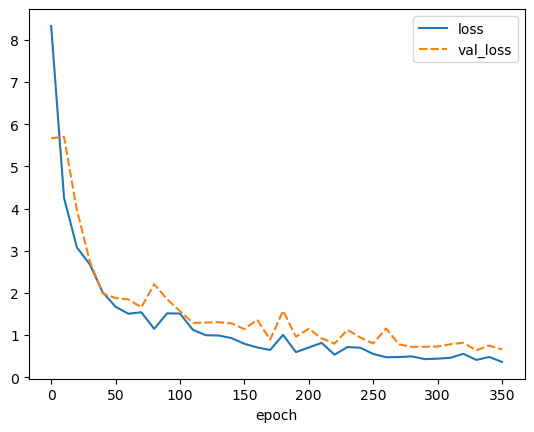

best weights loaded


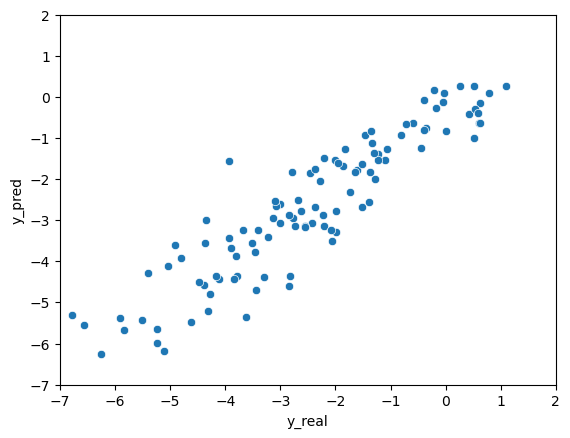

elapsed time: 110.40557432174683
run: 125
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560720250>, <torch.utils.data.dataset.Subset object at 0x00000155D5BFEF40>, <torch.utils.data.dataset.Subset object at 0x00000155D5BFEB80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.628918075561524 | Validation Loss 7.789152145385742
Epoch 10 | Train Loss 4.3890245914459225 | Validation Loss 5.425366401672363
Epoch 20 | Train Loss 4.0524851481119795 | Validation Loss 6.199331998825073
Epoch 30 | Train Loss 3.7985357920328777 | Validation Loss 4.920144557952881
Epoch 40 | Train Loss 3.7311639308929445 | Validation Loss 4.7028656005859375
Epoch 50 | Train Loss 3.575212279955546 | Validation Loss 4.903008937835693
Epoch 60 | Train Loss 3.597835985819499 | Validation Loss 4.478979468345642
Epoch 70 | Train Loss 3.6567603588104247 | Validation Loss 4.262876033782959
Epoch 80 | Train Loss 3.372128057479858 | Validation Loss 5.000273704528809
Epoch 90 | Train Loss 3.1043816725413005 | Validation Loss 3.896604895591736
Epoch 100 | Train Loss 2.890825096766154 | Validation Loss 3.592782497406006
Epoch 110 | Train Loss 2.9834858973821006 | Validation Loss 3.693563222885132
Epoch 120 | Train Loss 2.597204351425171 | Validation Loss 3.4566447734832764
E

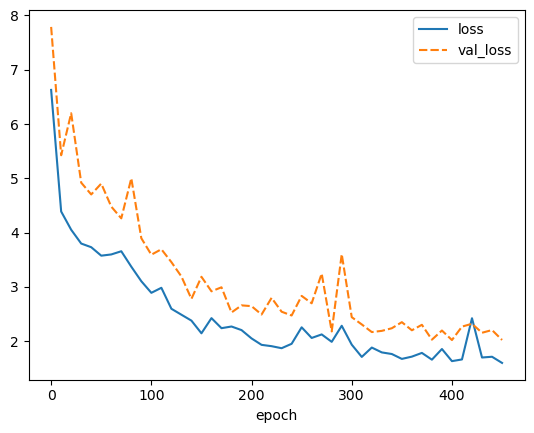

best weights loaded


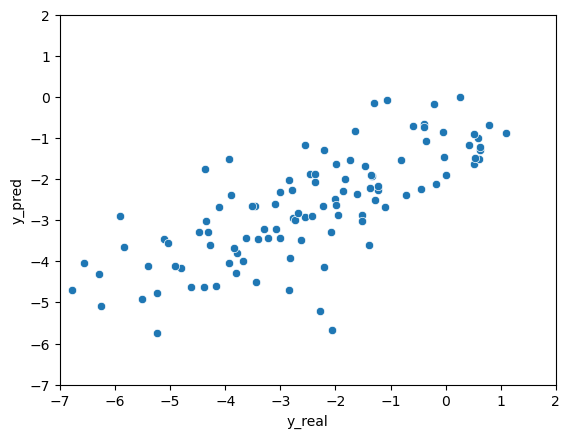

elapsed time: 158.776447057724
run: 126
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5B07B20>, <torch.utils.data.dataset.Subset object at 0x00000155606EB2B0>, <torch.utils.data.dataset.Subset object at 0x00000155606EBC40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.92317533493042 | Validation Loss 6.828222751617432
Epoch 10 | Train Loss 4.107502412796021 | Validation Loss 5.471811532974243
Epoch 20 | Train Loss 4.3560319423675535 | Validation Loss 5.920754909515381
Epoch 30 | Train Loss 3.7491715431213377 | Validation Loss 5.109529256820679
Epoch 40 | Train Loss 3.7351269721984863 | Validation Loss 4.5840911865234375
Epoch 50 | Train Loss 3.5665966192881267 | Validation Loss 4.346497893333435
Epoch 60 | Train Loss 3.5579739093780516 | Validation Loss 4.298725962638855
Epoch 70 | Train Loss 3.569087759653727 | Validation Loss 5.036711931228638
Epoch 80 | Train Loss 3.2336862564086912 | Validation Loss 4.567972898483276
Epoch 90 | Train Loss 3.0857078075408935 | Validation Loss 4.032405853271484
Epoch 100 | Train Loss 2.7517380714416504 | Validation Loss 3.6214863061904907
Epoch 110 | Train Loss 2.917303514480591 | Validation Loss 3.368298649787903
Epoch 120 | Train Loss 3.0656259377797443 | Validation Loss 3.7161617279052734

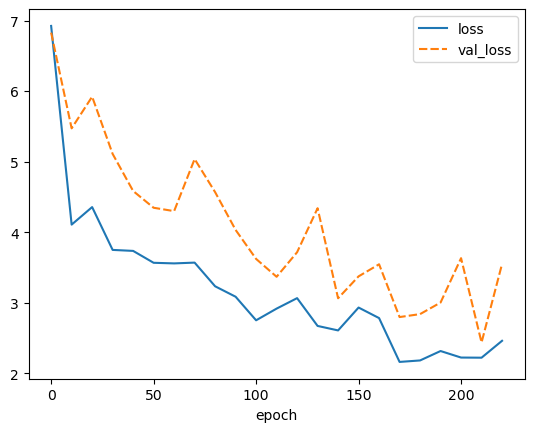

best weights loaded


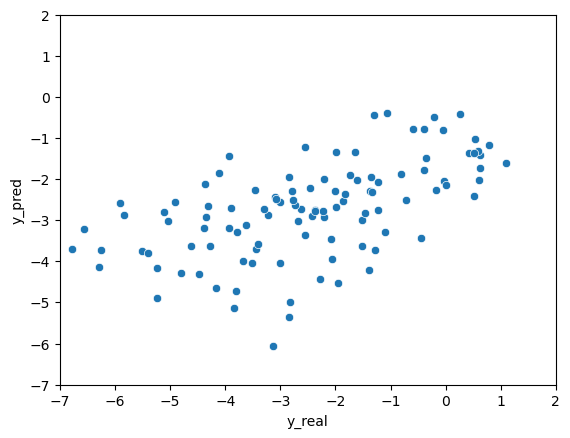

elapsed time: 84.1706132888794
run: 127
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5B64A00>, <torch.utils.data.dataset.Subset object at 0x000001556047B400>, <torch.utils.data.dataset.Subset object at 0x000001556047B490>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.203634484608967 | Validation Loss 5.485579967498779
Epoch 10 | Train Loss 4.47682081858317 | Validation Loss 5.078218221664429
Epoch 20 | Train Loss 4.006075541178386 | Validation Loss 5.582094192504883
Epoch 30 | Train Loss 4.180859327316284 | Validation Loss 5.456387758255005
Epoch 40 | Train Loss 3.9664344628651937 | Validation Loss 5.406043291091919
Epoch 50 | Train Loss 3.842684586842855 | Validation Loss 4.816280364990234
Epoch 60 | Train Loss 3.716500918070475 | Validation Loss 5.247755527496338
Epoch 70 | Train Loss 3.501964577039083 | Validation Loss 6.150051116943359
Epoch 80 | Train Loss 3.303020787239075 | Validation Loss 4.252826690673828
Epoch 90 | Train Loss 3.056585971514384 | Validation Loss 4.117602586746216
Epoch 100 | Train Loss 3.2174018303553265 | Validation Loss 4.516495227813721
Epoch 110 | Train Loss 3.6270318110783895 | Validation Loss 3.8910071849823
Epoch 120 | Train Loss 2.9561320463816325 | Validation Loss 3.5564515590667725
Epoch 13

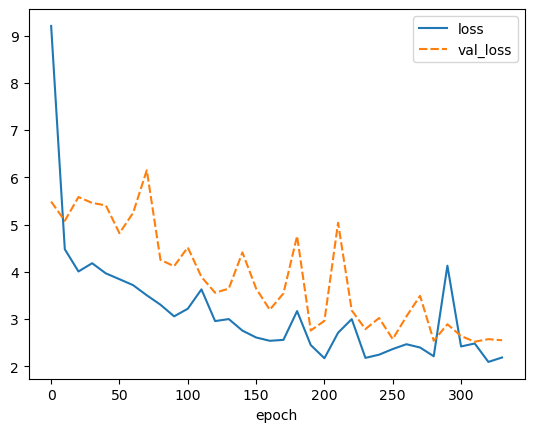

best weights loaded


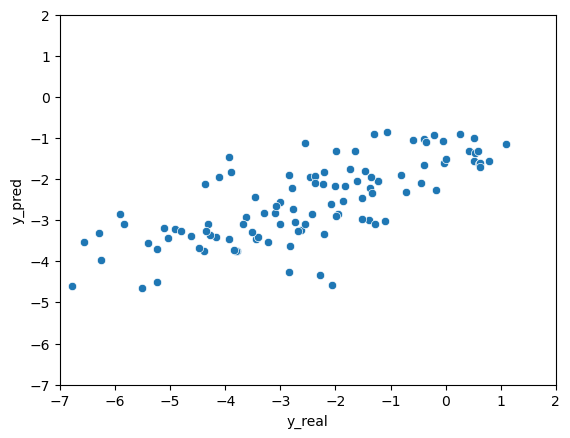

elapsed time: 123.30269527435303
run: 128
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605CCE80>, <torch.utils.data.dataset.Subset object at 0x00000155605E55E0>, <torch.utils.data.dataset.Subset object at 0x00000155606EBD90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.563000361124674 | Validation Loss 6.090434908866882
Epoch 10 | Train Loss 4.619985715548197 | Validation Loss 5.954890012741089
Epoch 20 | Train Loss 4.479462305704753 | Validation Loss 5.618154764175415
Epoch 30 | Train Loss 3.920285717646281 | Validation Loss 4.646826982498169
Epoch 40 | Train Loss 3.893392737706502 | Validation Loss 4.823018789291382
Epoch 50 | Train Loss 3.666504240036011 | Validation Loss 5.018150568008423
Epoch 60 | Train Loss 3.6302775859832765 | Validation Loss 4.65138053894043
Epoch 70 | Train Loss 3.7092421372731526 | Validation Loss 4.986173748970032
Epoch 80 | Train Loss 3.345945358276367 | Validation Loss 4.631216764450073
Epoch 90 | Train Loss 3.6148036162058514 | Validation Loss 4.519224166870117
Epoch 100 | Train Loss 3.5054514408111572 | Validation Loss 3.968919277191162
Epoch 110 | Train Loss 3.6731510798136395 | Validation Loss 4.110458612442017
Epoch 120 | Train Loss 2.8137323021888734 | Validation Loss 3.7958463430404663
Epoc

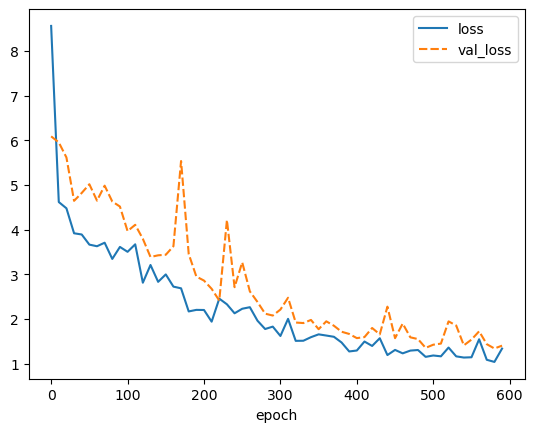

best weights loaded


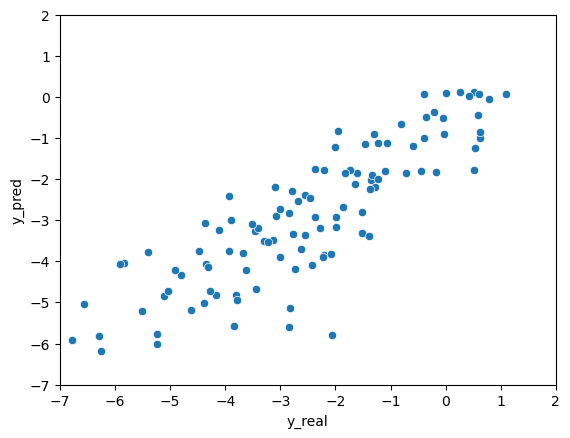

elapsed time: 188.03673100471497
run: 129
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560602400>, <torch.utils.data.dataset.Subset object at 0x0000015519120DF0>, <torch.utils.data.dataset.Subset object at 0x0000015519120850>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.883062012990316 | Validation Loss 5.603533744812012
Epoch 10 | Train Loss 3.957694498697917 | Validation Loss 4.359663248062134
Epoch 20 | Train Loss 3.0143364508946737 | Validation Loss 3.5867682695388794
Epoch 30 | Train Loss 2.519906226793925 | Validation Loss 3.5425833463668823
Epoch 40 | Train Loss 2.436985699335734 | Validation Loss 2.78932785987854
Epoch 50 | Train Loss 2.2495471477508544 | Validation Loss 2.602366626262665
Epoch 60 | Train Loss 2.122601850827535 | Validation Loss 2.400153398513794
Epoch 70 | Train Loss 2.007491040229797 | Validation Loss 2.471258759498596
Epoch 80 | Train Loss 1.8199403444925943 | Validation Loss 2.200021982192993
Epoch 90 | Train Loss 1.7566795190175375 | Validation Loss 2.1423821449279785
Epoch 100 | Train Loss 2.0105818271636964 | Validation Loss 2.567705273628235
Epoch 110 | Train Loss 1.8121649344762167 | Validation Loss 1.7848095297813416
Epoch 120 | Train Loss 1.6092660903930665 | Validation Loss 1.7886296510696411

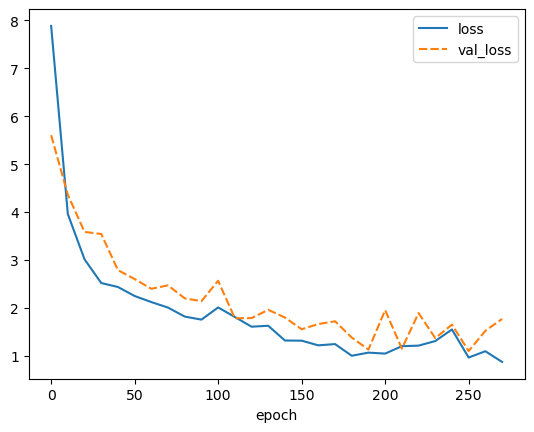

best weights loaded


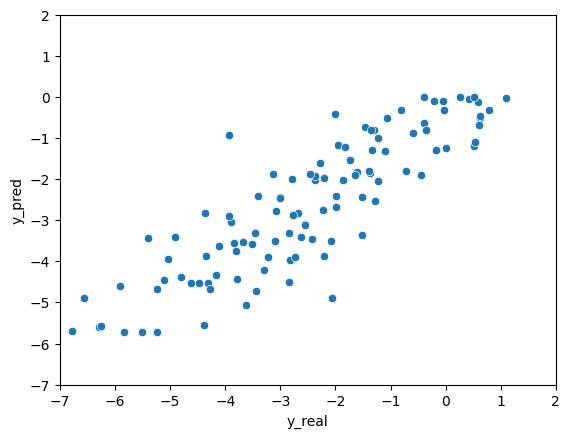

elapsed time: 86.22301578521729
run: 130
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001551915BD00>, <torch.utils.data.dataset.Subset object at 0x0000015560713FD0>, <torch.utils.data.dataset.Subset object at 0x00000155D5AD0BE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.0756258805592855 | Validation Loss 5.552510499954224
Epoch 10 | Train Loss 3.422462066014608 | Validation Loss 4.828588485717773
Epoch 20 | Train Loss 2.6459351539611817 | Validation Loss 3.5501270294189453
Epoch 30 | Train Loss 2.106734840075175 | Validation Loss 2.435778498649597
Epoch 40 | Train Loss 1.5610684275627136 | Validation Loss 2.03478741645813
Epoch 50 | Train Loss 1.3324059963226318 | Validation Loss 1.698834240436554
Epoch 60 | Train Loss 1.662305482228597 | Validation Loss 1.7927646040916443
Epoch 70 | Train Loss 1.2557420452435812 | Validation Loss 1.7640597224235535
Epoch 80 | Train Loss 1.1265344500541687 | Validation Loss 1.7124230861663818
Epoch 90 | Train Loss 1.1039656082789102 | Validation Loss 1.6613229513168335
Epoch 100 | Train Loss 0.7786017060279846 | Validation Loss 1.4389075636863708
Epoch 110 | Train Loss 0.8116448601086934 | Validation Loss 1.2363858222961426
Epoch 120 | Train Loss 0.8908772269884745 | Validation Loss 1.1462363004

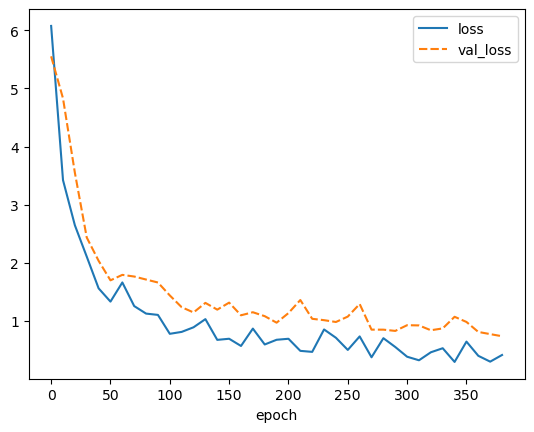

best weights loaded


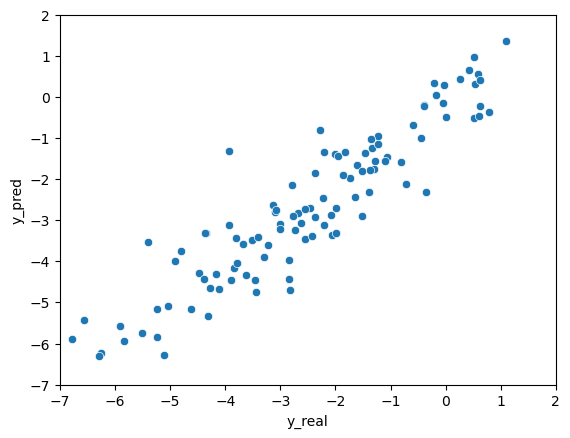

elapsed time: 94.92506980895996
run: 131
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556079C190>, <torch.utils.data.dataset.Subset object at 0x00000155D5B77910>, <torch.utils.data.dataset.Subset object at 0x00000155D5B77190>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.915890026092529 | Validation Loss 5.8496129512786865
Epoch 10 | Train Loss 4.195168972015381 | Validation Loss 5.775088548660278
Epoch 20 | Train Loss 3.874251429239909 | Validation Loss 5.341420412063599
Epoch 30 | Train Loss 4.01322242418925 | Validation Loss 5.259943246841431
Epoch 40 | Train Loss 3.7791207154591877 | Validation Loss 5.644181251525879
Epoch 50 | Train Loss 3.8207924207051596 | Validation Loss 5.273104429244995
Epoch 60 | Train Loss 3.9265645027160643 | Validation Loss 4.852668285369873
Epoch 70 | Train Loss 3.450904130935669 | Validation Loss 4.865518569946289
Epoch 80 | Train Loss 3.442371129989624 | Validation Loss 4.496489763259888
Epoch 90 | Train Loss 3.3984833558400473 | Validation Loss 4.190922498703003
Epoch 100 | Train Loss 3.2130770842234293 | Validation Loss 4.118782162666321
Epoch 110 | Train Loss 3.106090863545736 | Validation Loss 4.208034992218018
Epoch 120 | Train Loss 3.3125796794891356 | Validation Loss 4.570030689239502
Epoc

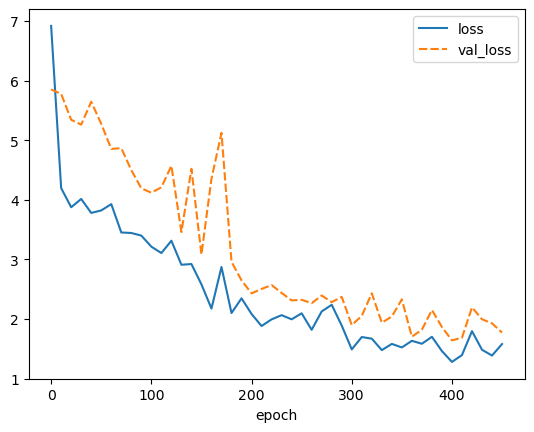

best weights loaded


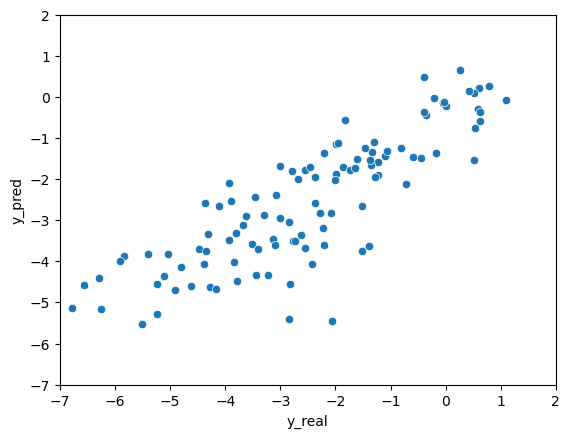

elapsed time: 130.36613607406616
run: 132
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5B149A0>, <torch.utils.data.dataset.Subset object at 0x00000155D5BE78E0>, <torch.utils.data.dataset.Subset object at 0x00000155D5BE7070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.497237062454223 | Validation Loss 7.296834230422974
Epoch 10 | Train Loss 4.294882853825887 | Validation Loss 5.022832632064819
Epoch 20 | Train Loss 3.3064827919006348 | Validation Loss 4.295915961265564
Epoch 30 | Train Loss 3.5955685933430988 | Validation Loss 3.864242434501648
Epoch 40 | Train Loss 2.7248539050420124 | Validation Loss 4.092019319534302
Epoch 50 | Train Loss 2.516686765352885 | Validation Loss 2.8046696186065674
Epoch 60 | Train Loss 2.1655933141708372 | Validation Loss 2.704777956008911
Epoch 70 | Train Loss 1.8558380564053854 | Validation Loss 2.317282974720001
Epoch 80 | Train Loss 2.4605572700500487 | Validation Loss 2.4168760776519775
Epoch 90 | Train Loss 2.246776485443115 | Validation Loss 2.564690947532654
Epoch 100 | Train Loss 2.3150047381718952 | Validation Loss 2.282480239868164
Epoch 110 | Train Loss 1.475084372361501 | Validation Loss 2.217317521572113
Epoch 120 | Train Loss 1.4672618150711059 | Validation Loss 1.8270082473754883

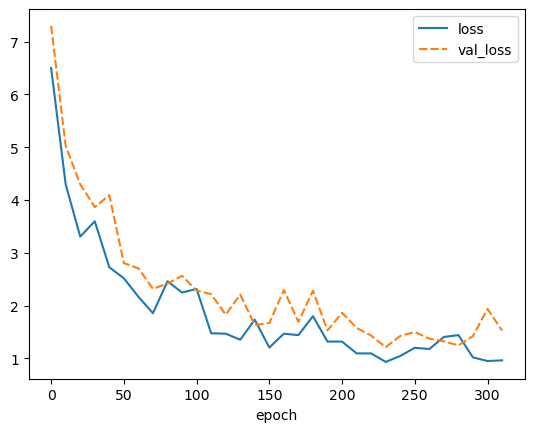

best weights loaded


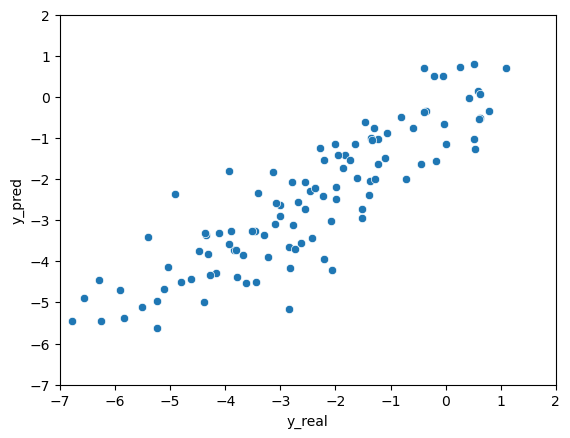

elapsed time: 85.22845768928528
run: 133
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001553BD79FA0>, <torch.utils.data.dataset.Subset object at 0x00000155DB093AF0>, <torch.utils.data.dataset.Subset object at 0x00000155DB093F10>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.9533766746521 | Validation Loss 7.2894062995910645
Epoch 10 | Train Loss 3.8931562741597494 | Validation Loss 4.57499086856842
Epoch 20 | Train Loss 3.3990304470062256 | Validation Loss 4.2869508266448975
Epoch 30 | Train Loss 2.9699241161346435 | Validation Loss 4.948221683502197
Epoch 40 | Train Loss 2.249102214972178 | Validation Loss 2.6820590496063232
Epoch 50 | Train Loss 1.9769306580225627 | Validation Loss 2.9557602405548096
Epoch 60 | Train Loss 1.7289944092432659 | Validation Loss 2.033361494541168
Epoch 70 | Train Loss 1.6080565492312113 | Validation Loss 2.6825249791145325
Epoch 80 | Train Loss 1.791257651646932 | Validation Loss 1.8745179772377014
Epoch 90 | Train Loss 1.5827639897664387 | Validation Loss 1.751848578453064
Epoch 100 | Train Loss 1.1740894714991252 | Validation Loss 1.9218008518218994
Epoch 110 | Train Loss 1.0756803115208944 | Validation Loss 1.8865110278129578
Epoch 120 | Train Loss 0.9991051435470581 | Validation Loss 1.29907184839

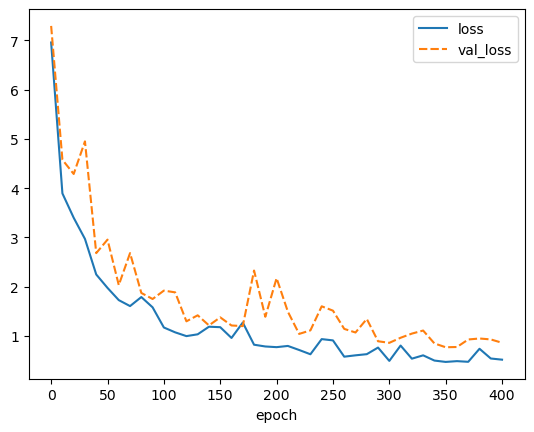

best weights loaded


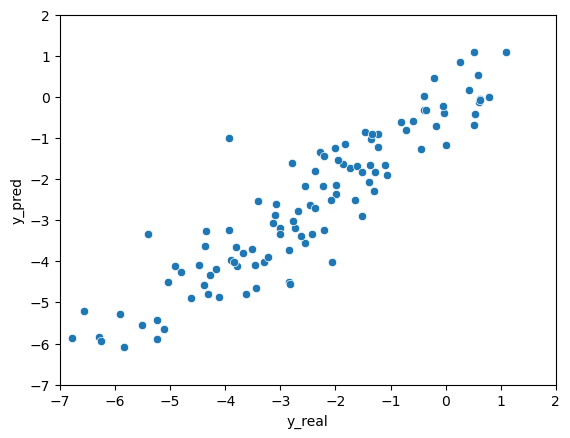

elapsed time: 107.71664333343506
run: 134
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605EB490>, <torch.utils.data.dataset.Subset object at 0x000001551919DBE0>, <torch.utils.data.dataset.Subset object at 0x000001551919D790>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 9.1149645169576 | Validation Loss 7.926885604858398
Epoch 10 | Train Loss 4.187307596206665 | Validation Loss 5.511951923370361
Epoch 20 | Train Loss 3.538459237416585 | Validation Loss 4.776882886886597
Epoch 30 | Train Loss 2.9046751499176025 | Validation Loss 3.842196822166443
Epoch 40 | Train Loss 2.4835891366004943 | Validation Loss 3.071254253387451
Epoch 50 | Train Loss 1.8752989768981934 | Validation Loss 2.2661112546920776
Epoch 60 | Train Loss 2.0230401436487835 | Validation Loss 2.133342683315277
Epoch 70 | Train Loss 1.5781070709228515 | Validation Loss 2.282956898212433
Epoch 80 | Train Loss 1.5385080655415853 | Validation Loss 2.4905542135238647
Epoch 90 | Train Loss 1.280990751584371 | Validation Loss 1.5269809365272522
Epoch 100 | Train Loss 1.1125375668207804 | Validation Loss 1.5795501470565796
Epoch 110 | Train Loss 1.3306116064389546 | Validation Loss 1.5666782855987549
Epoch 120 | Train Loss 0.992006021241347 | Validation Loss 1.502834022045135

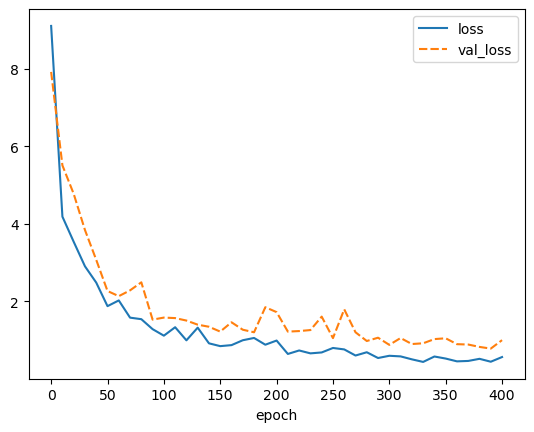

best weights loaded


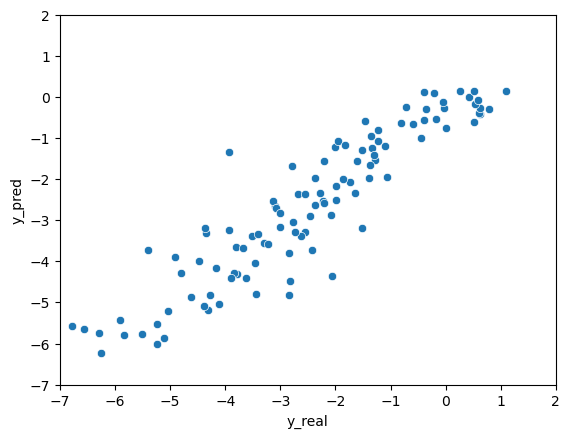

elapsed time: 112.87478876113892
run: 135
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155191A33D0>, <torch.utils.data.dataset.Subset object at 0x00000155D7ED3A90>, <torch.utils.data.dataset.Subset object at 0x00000155D7ED3EB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.239459665616353 | Validation Loss 7.074772834777832
Epoch 10 | Train Loss 4.693171389897665 | Validation Loss 5.486286163330078
Epoch 20 | Train Loss 4.092021910349528 | Validation Loss 5.3329548835754395
Epoch 30 | Train Loss 4.292327292760214 | Validation Loss 5.136114835739136
Epoch 40 | Train Loss 3.65105406443278 | Validation Loss 4.912215828895569
Epoch 50 | Train Loss 3.755077330271403 | Validation Loss 4.620105504989624
Epoch 60 | Train Loss 3.794503339131673 | Validation Loss 4.756764650344849
Epoch 70 | Train Loss 3.428965950012207 | Validation Loss 4.849271059036255
Epoch 80 | Train Loss 3.2625614166259767 | Validation Loss 4.737196207046509
Epoch 90 | Train Loss 3.1952359358469646 | Validation Loss 4.78351092338562
Epoch 100 | Train Loss 3.2767054557800295 | Validation Loss 4.474872469902039
Epoch 110 | Train Loss 2.883565378189087 | Validation Loss 3.725944399833679
Epoch 120 | Train Loss 3.1638033390045166 | Validation Loss 4.314983487129211
Epoch 1

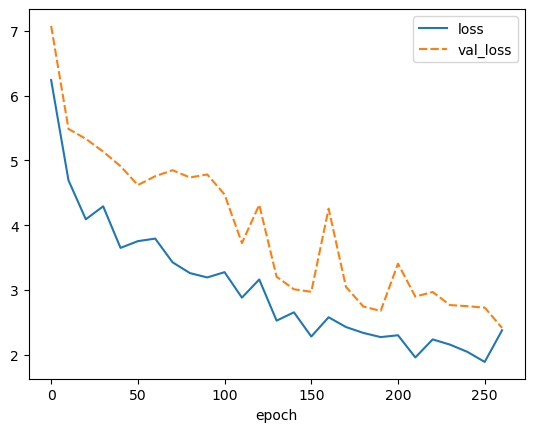

best weights loaded


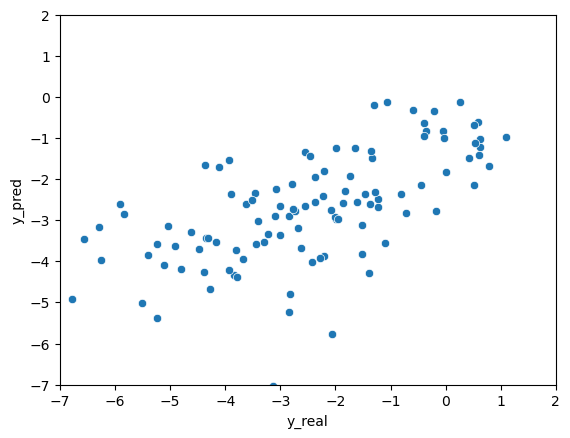

elapsed time: 81.68438482284546
run: 136
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560748070>, <torch.utils.data.dataset.Subset object at 0x00000155605BAAF0>, <torch.utils.data.dataset.Subset object at 0x00000155605BA9A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.042966397603353 | Validation Loss 6.149395227432251
Epoch 10 | Train Loss 4.922890361150106 | Validation Loss 5.2899909019470215
Epoch 20 | Train Loss 4.133792098363241 | Validation Loss 5.1257710456848145
Epoch 30 | Train Loss 3.8951093991597494 | Validation Loss 4.7775726318359375
Epoch 40 | Train Loss 3.89053692817688 | Validation Loss 5.200479984283447
Epoch 50 | Train Loss 3.6122984409332277 | Validation Loss 4.594369411468506
Epoch 60 | Train Loss 4.1750599384307865 | Validation Loss 4.79350471496582
Epoch 70 | Train Loss 3.669560607274373 | Validation Loss 5.696587800979614
Epoch 80 | Train Loss 3.220500119527181 | Validation Loss 4.199315786361694
Epoch 90 | Train Loss 3.1533865133921304 | Validation Loss 4.335200309753418
Epoch 100 | Train Loss 3.061343216896057 | Validation Loss 3.5752272605895996
Epoch 110 | Train Loss 3.055551020304362 | Validation Loss 4.451767086982727
Epoch 120 | Train Loss 2.613235416014989 | Validation Loss 3.6270840167999268
Epo

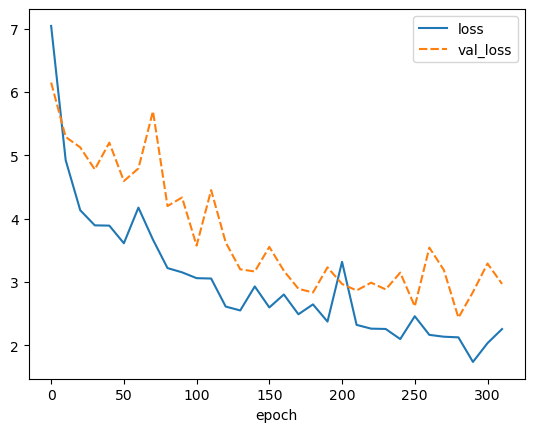

best weights loaded


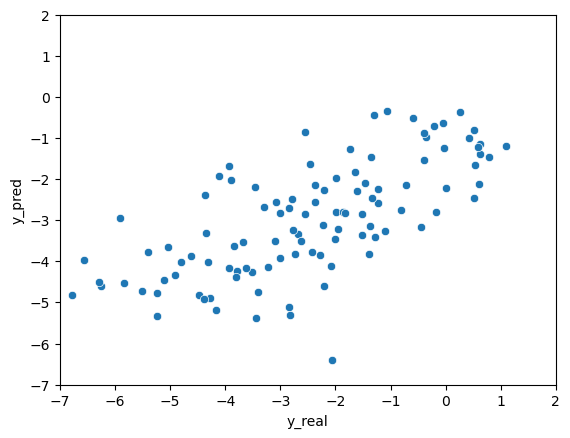

elapsed time: 106.8153166770935
run: 137
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556058D040>, <torch.utils.data.dataset.Subset object at 0x0000015519002070>, <torch.utils.data.dataset.Subset object at 0x0000015519002670>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.74019292195638 | Validation Loss 8.459830522537231
Epoch 10 | Train Loss 4.169231287638346 | Validation Loss 5.290571451187134
Epoch 20 | Train Loss 4.005165417989095 | Validation Loss 4.956254959106445
Epoch 30 | Train Loss 4.175894864400228 | Validation Loss 5.0558671951293945
Epoch 40 | Train Loss 3.966504208246867 | Validation Loss 5.143604040145874
Epoch 50 | Train Loss 4.04110754330953 | Validation Loss 5.569234132766724
Epoch 60 | Train Loss 3.7576202074686686 | Validation Loss 5.210391521453857
Epoch 70 | Train Loss 4.019578742980957 | Validation Loss 4.614468812942505
Epoch 80 | Train Loss 3.578149096171061 | Validation Loss 4.244059085845947
Epoch 90 | Train Loss 3.4777739524841307 | Validation Loss 3.67783784866333
Epoch 100 | Train Loss 3.259150664011637 | Validation Loss 4.34834885597229
Epoch 110 | Train Loss 2.9879360437393188 | Validation Loss 4.020397186279297
Epoch 120 | Train Loss 3.477532132466634 | Validation Loss 3.6579750776290894
Epoch 13

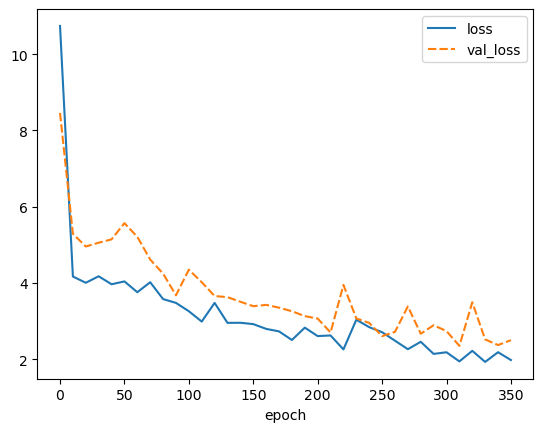

best weights loaded


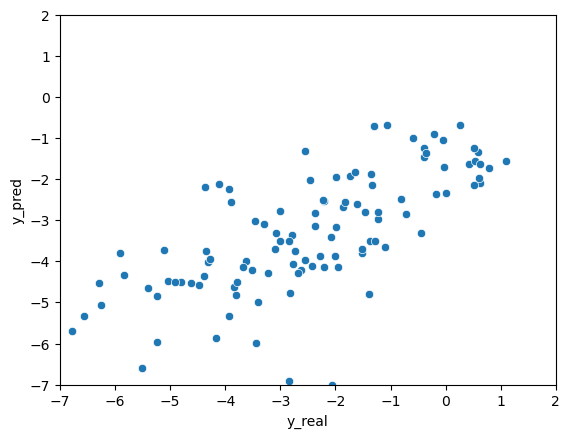

elapsed time: 140.52577686309814
run: 138
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5B643A0>, <torch.utils.data.dataset.Subset object at 0x000001553BD7E5E0>, <torch.utils.data.dataset.Subset object at 0x0000015560620730>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.25689388513565 | Validation Loss 5.96613883972168
Epoch 10 | Train Loss 4.5408559481302895 | Validation Loss 6.684785604476929
Epoch 20 | Train Loss 4.595472685496012 | Validation Loss 5.354820013046265
Epoch 30 | Train Loss 4.070572821299235 | Validation Loss 5.599455833435059
Epoch 40 | Train Loss 3.798344039916992 | Validation Loss 4.973049759864807
Epoch 50 | Train Loss 3.9211350282033286 | Validation Loss 4.711901783943176
Epoch 60 | Train Loss 3.6194710890452066 | Validation Loss 4.626115322113037
Epoch 70 | Train Loss 3.5318894386291504 | Validation Loss 5.016061425209045
Epoch 80 | Train Loss 3.8586618741353353 | Validation Loss 4.627033829689026
Epoch 90 | Train Loss 3.4439090490341187 | Validation Loss 4.375500559806824
Epoch 100 | Train Loss 3.4426902294158936 | Validation Loss 4.3880839347839355
Epoch 110 | Train Loss 3.0809629281361897 | Validation Loss 4.39138126373291
Epoch 120 | Train Loss 3.3407925764719644 | Validation Loss 4.335093975067139
Ep

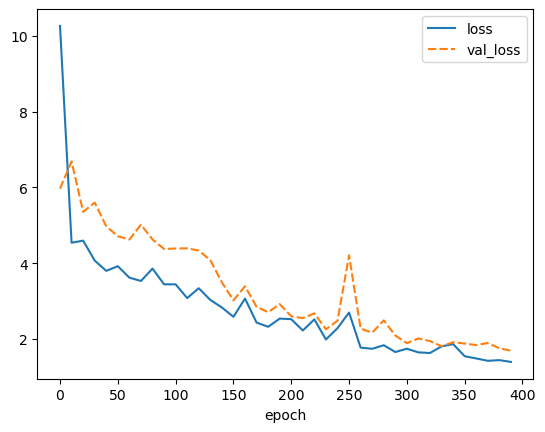

best weights loaded


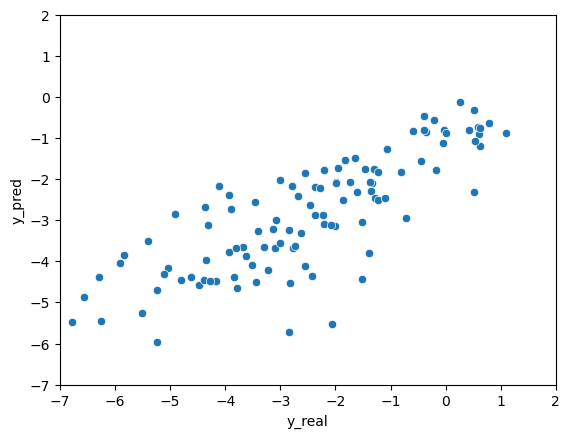

elapsed time: 145.2414755821228
run: 139
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155606482B0>, <torch.utils.data.dataset.Subset object at 0x00000155D5B26130>, <torch.utils.data.dataset.Subset object at 0x00000155D5B269A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.554832776387533 | Validation Loss 5.669559478759766
Epoch 10 | Train Loss 3.9038609345753987 | Validation Loss 5.58883261680603
Epoch 20 | Train Loss 3.3597009658813475 | Validation Loss 4.557243347167969
Epoch 30 | Train Loss 2.8221232493718467 | Validation Loss 3.313538432121277
Epoch 40 | Train Loss 2.5264803091684978 | Validation Loss 3.2424639463424683
Epoch 50 | Train Loss 2.1326595385869345 | Validation Loss 3.180004835128784
Epoch 60 | Train Loss 1.8958067178726197 | Validation Loss 4.666210651397705
Epoch 70 | Train Loss 1.6015198985735575 | Validation Loss 2.096541166305542
Epoch 80 | Train Loss 1.6204179763793944 | Validation Loss 2.058808743953705
Epoch 90 | Train Loss 1.8137873808542888 | Validation Loss 1.890400469303131
Epoch 100 | Train Loss 1.5839631001154582 | Validation Loss 1.888049602508545
Epoch 110 | Train Loss 1.7213146050771078 | Validation Loss 2.3022143840789795
Epoch 120 | Train Loss 1.855404782295227 | Validation Loss 2.9905546903610

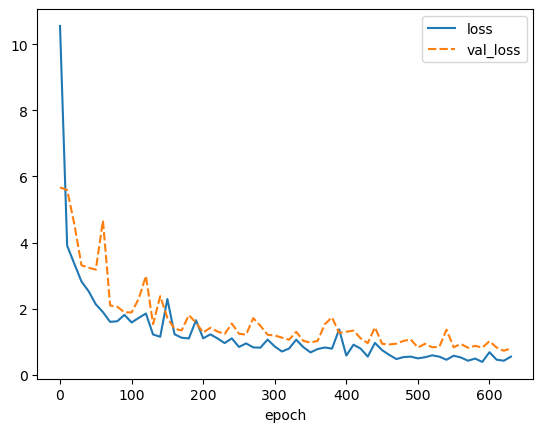

best weights loaded


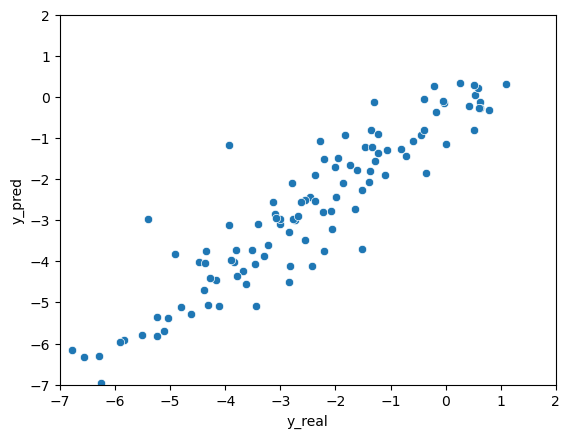

elapsed time: 225.9193150997162
run: 140
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155603F8700>, <torch.utils.data.dataset.Subset object at 0x000001556061AD60>, <torch.utils.data.dataset.Subset object at 0x000001556061A160>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.404127820332845 | Validation Loss 5.363903999328613
Epoch 10 | Train Loss 3.194468593597412 | Validation Loss 3.938767194747925
Epoch 20 | Train Loss 2.1437448024749757 | Validation Loss 2.892156481742859
Epoch 30 | Train Loss 1.6201515913009643 | Validation Loss 1.8559154868125916
Epoch 40 | Train Loss 1.5437325874964396 | Validation Loss 1.7565405368804932
Epoch 50 | Train Loss 1.3699033856391907 | Validation Loss 1.7410496473312378
Epoch 60 | Train Loss 0.9445928653081258 | Validation Loss 1.4539163708686829
Epoch 70 | Train Loss 0.9240723927815755 | Validation Loss 1.9752030968666077
Epoch 80 | Train Loss 0.8671571989854177 | Validation Loss 1.526608407497406
Epoch 90 | Train Loss 0.7533069213231405 | Validation Loss 1.0249089896678925
Epoch 100 | Train Loss 0.7798515737056733 | Validation Loss 0.8863572776317596
Epoch 110 | Train Loss 0.5701969782511394 | Validation Loss 1.3000699877738953
Epoch 120 | Train Loss 0.6389807134866714 | Validation Loss 0.9019839

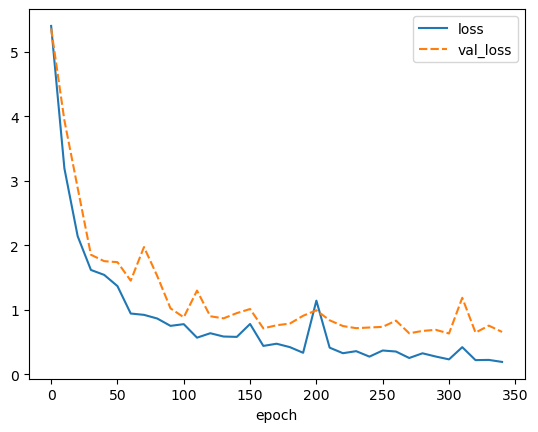

best weights loaded


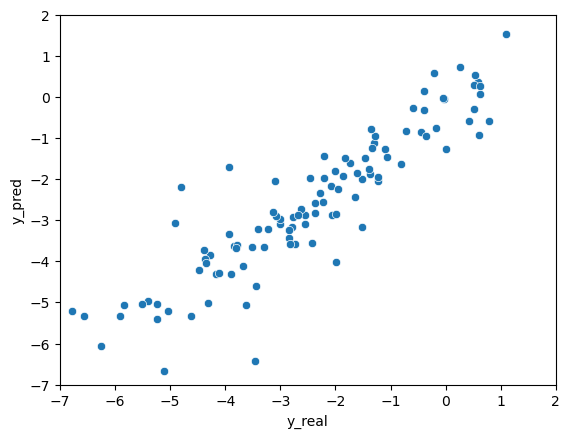

elapsed time: 100.94067001342773
run: 141
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D7F076A0>, <torch.utils.data.dataset.Subset object at 0x0000015516D84B20>, <torch.utils.data.dataset.Subset object at 0x0000015516D95160>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.243115981419881 | Validation Loss 5.307325124740601
Epoch 10 | Train Loss 4.368588638305664 | Validation Loss 5.4787328243255615
Epoch 20 | Train Loss 3.9227538267771402 | Validation Loss 5.621678590774536
Epoch 30 | Train Loss 3.914587656656901 | Validation Loss 5.084682941436768
Epoch 40 | Train Loss 3.4543606440226235 | Validation Loss 4.688026666641235
Epoch 50 | Train Loss 3.407158549626668 | Validation Loss 4.815176010131836
Epoch 60 | Train Loss 3.439618730545044 | Validation Loss 4.450379133224487
Epoch 70 | Train Loss 3.422204860051473 | Validation Loss 4.787415623664856
Epoch 80 | Train Loss 3.426809581120809 | Validation Loss 4.253793478012085
Epoch 90 | Train Loss 3.2365305423736572 | Validation Loss 4.032942056655884
Epoch 100 | Train Loss 2.9975849390029907 | Validation Loss 3.7222251892089844
Epoch 110 | Train Loss 2.828053895632426 | Validation Loss 3.705778121948242
Epoch 120 | Train Loss 2.4461768587430317 | Validation Loss 3.125886082649231
Epo

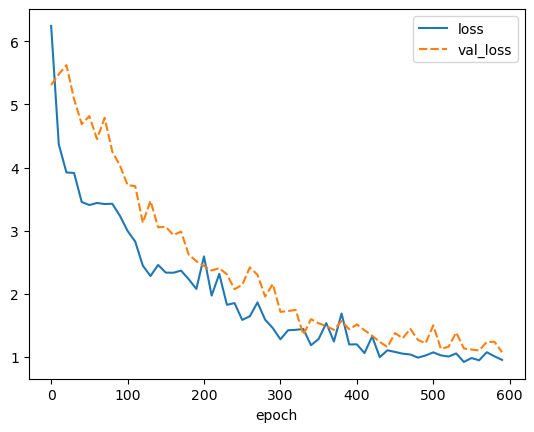

best weights loaded


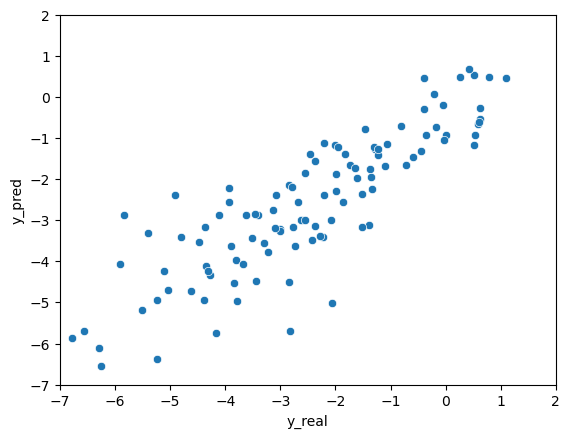

elapsed time: 194.7602732181549
run: 142
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561884040>, <torch.utils.data.dataset.Subset object at 0x00000155DB09FD30>, <torch.utils.data.dataset.Subset object at 0x00000155DB0A7280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.05349375406901 | Validation Loss 7.419504165649414
Epoch 10 | Train Loss 3.953077220916748 | Validation Loss 4.83150053024292
Epoch 20 | Train Loss 4.398841428756714 | Validation Loss 7.296207904815674
Epoch 30 | Train Loss 3.361271683375041 | Validation Loss 4.051504135131836
Epoch 40 | Train Loss 2.9140745321909587 | Validation Loss 4.237372636795044
Epoch 50 | Train Loss 2.8029475847880048 | Validation Loss 3.2513203620910645
Epoch 60 | Train Loss 2.8049669742584227 | Validation Loss 2.884417176246643
Epoch 70 | Train Loss 2.787079644203186 | Validation Loss 3.691765546798706
Epoch 80 | Train Loss 2.2261290709177652 | Validation Loss 2.587247610092163
Epoch 90 | Train Loss 1.9462842067082724 | Validation Loss 2.275377869606018
Epoch 100 | Train Loss 2.3825754006703694 | Validation Loss 2.6907118558883667
Epoch 110 | Train Loss 1.6247345447540282 | Validation Loss 1.83235502243042
Epoch 120 | Train Loss 1.5311166048049927 | Validation Loss 2.403594434261322
Epo

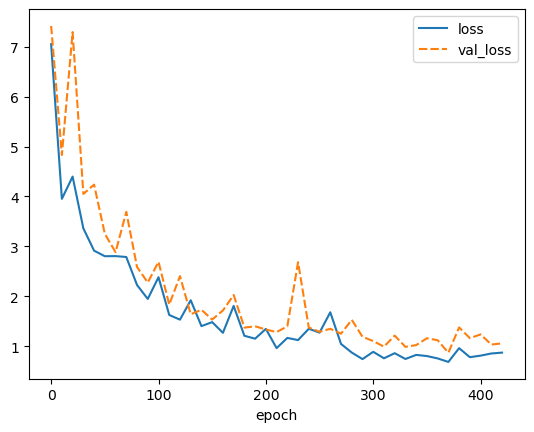

best weights loaded


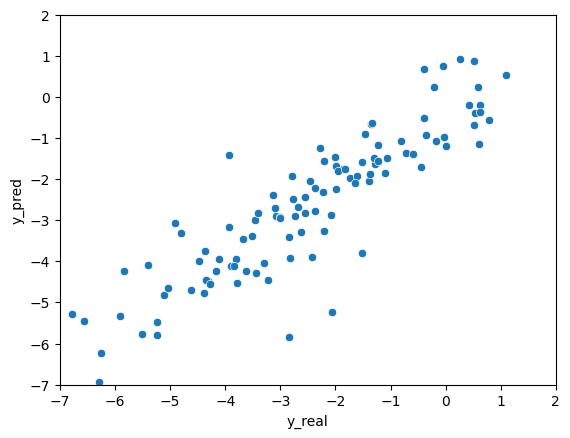

elapsed time: 135.29047966003418
run: 143
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556070DF40>, <torch.utils.data.dataset.Subset object at 0x00000155605BB1C0>, <torch.utils.data.dataset.Subset object at 0x00000155605BB850>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.1858625968297325 | Validation Loss 5.873114824295044
Epoch 10 | Train Loss 4.660845979054769 | Validation Loss 4.87091588973999
Epoch 20 | Train Loss 3.2315591891606648 | Validation Loss 6.971165418624878
Epoch 30 | Train Loss 2.898133071263631 | Validation Loss 3.7896162271499634
Epoch 40 | Train Loss 2.9876452445983888 | Validation Loss 4.5173579454422
Epoch 50 | Train Loss 2.716529369354248 | Validation Loss 3.42128586769104
Epoch 60 | Train Loss 2.939482100804647 | Validation Loss 3.9669634103775024
Epoch 70 | Train Loss 1.7909414609273275 | Validation Loss 2.2510424852371216
Epoch 80 | Train Loss 2.134529376029968 | Validation Loss 2.0276731848716736
Epoch 90 | Train Loss 1.6797228097915649 | Validation Loss 1.961080551147461
Epoch 100 | Train Loss 1.5940698941548666 | Validation Loss 1.6661487817764282
Epoch 110 | Train Loss 1.4175320943196614 | Validation Loss 1.7968985438346863
Epoch 120 | Train Loss 1.3470849792162578 | Validation Loss 1.889070451259613


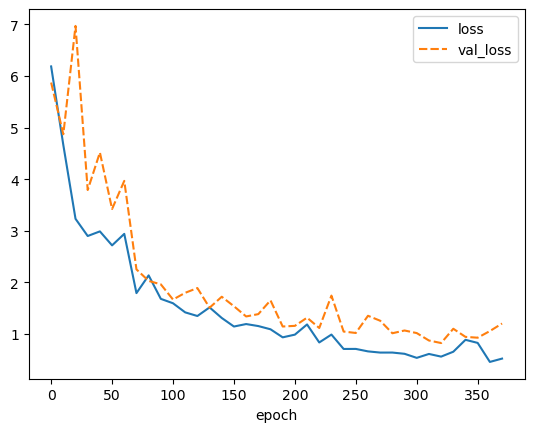

best weights loaded


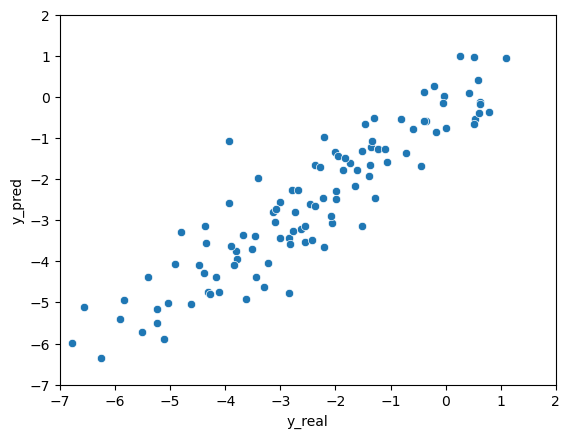

elapsed time: 119.21102786064148
run: 144
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D7E6B5E0>, <torch.utils.data.dataset.Subset object at 0x00000155D7FF3130>, <torch.utils.data.dataset.Subset object at 0x00000155D7FF39A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.505776087443033 | Validation Loss 5.710700511932373
Epoch 10 | Train Loss 4.130570109685262 | Validation Loss 4.996221303939819
Epoch 20 | Train Loss 3.4680250803629558 | Validation Loss 3.9255411624908447
Epoch 30 | Train Loss 3.0557451407114664 | Validation Loss 3.8100290298461914
Epoch 40 | Train Loss 2.5084784587224322 | Validation Loss 2.8281279802322388
Epoch 50 | Train Loss 2.051230490207672 | Validation Loss 2.4664233922958374
Epoch 60 | Train Loss 1.8465705076853434 | Validation Loss 2.0218315720558167
Epoch 70 | Train Loss 1.4970332622528075 | Validation Loss 1.9207396507263184
Epoch 80 | Train Loss 1.943743364016215 | Validation Loss 1.931698203086853
Epoch 90 | Train Loss 1.6597883701324463 | Validation Loss 2.9931503534317017
Epoch 100 | Train Loss 2.0107985655466716 | Validation Loss 1.6480967998504639
Epoch 110 | Train Loss 1.60536527633667 | Validation Loss 1.676255226135254
Epoch 120 | Train Loss 1.3249276280403137 | Validation Loss 1.7114163637

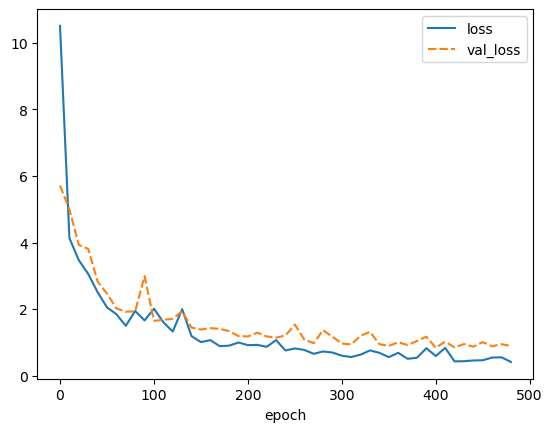

best weights loaded


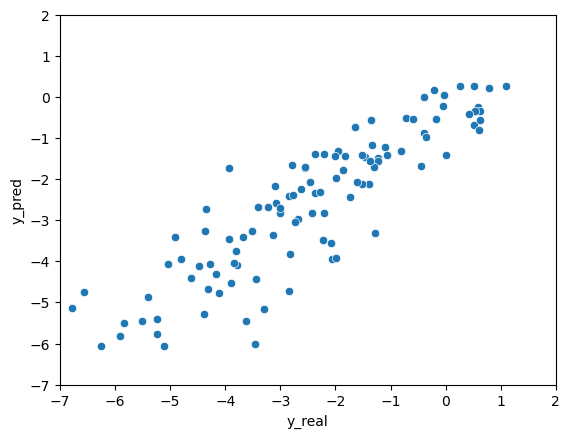

elapsed time: 156.23035621643066
run: 145
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561996A00>, <torch.utils.data.dataset.Subset object at 0x00000155617E9430>, <torch.utils.data.dataset.Subset object at 0x00000155617E9A90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.385655482610066 | Validation Loss 6.213043212890625
Epoch 10 | Train Loss 4.3266387740770975 | Validation Loss 5.269305229187012
Epoch 20 | Train Loss 4.272814512252808 | Validation Loss 5.569560527801514
Epoch 30 | Train Loss 3.5762632369995115 | Validation Loss 4.933261156082153
Epoch 40 | Train Loss 3.5032673597335817 | Validation Loss 4.527302265167236
Epoch 50 | Train Loss 3.618525568644206 | Validation Loss 4.459126234054565
Epoch 60 | Train Loss 3.837075352668762 | Validation Loss 4.745566368103027
Epoch 70 | Train Loss 3.3780478477478026 | Validation Loss 4.195217728614807
Epoch 80 | Train Loss 3.2397151947021485 | Validation Loss 4.149932861328125
Epoch 90 | Train Loss 2.858723433812459 | Validation Loss 3.978922486305237
Epoch 100 | Train Loss 2.9719868659973145 | Validation Loss 3.4645129442214966
Epoch 110 | Train Loss 2.9040268421173097 | Validation Loss 4.251245021820068
Epoch 120 | Train Loss 2.6119497299194334 | Validation Loss 3.2627004384994507


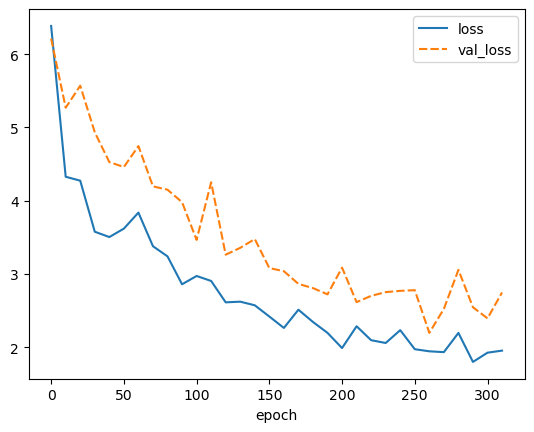

best weights loaded


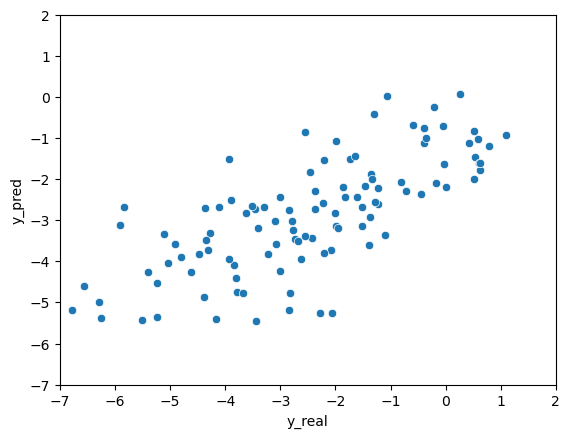

elapsed time: 122.75943350791931
run: 146
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015516DC4DF0>, <torch.utils.data.dataset.Subset object at 0x00000155DB126DF0>, <torch.utils.data.dataset.Subset object at 0x00000155DB1269D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.70357313156128 | Validation Loss 6.110670566558838
Epoch 10 | Train Loss 5.05657107035319 | Validation Loss 7.976073741912842
Epoch 20 | Train Loss 3.9691516558329263 | Validation Loss 5.0312148332595825
Epoch 30 | Train Loss 3.843283748626709 | Validation Loss 4.958879470825195
Epoch 40 | Train Loss 3.6932002862294513 | Validation Loss 4.778669595718384
Epoch 50 | Train Loss 3.9171208222707112 | Validation Loss 4.748201131820679
Epoch 60 | Train Loss 3.6641745567321777 | Validation Loss 5.11381721496582
Epoch 70 | Train Loss 3.7002170006434123 | Validation Loss 5.1369853019714355
Epoch 80 | Train Loss 3.6108863512674967 | Validation Loss 4.317198276519775
Epoch 90 | Train Loss 3.0502301454544067 | Validation Loss 4.645366668701172
Epoch 100 | Train Loss 2.993975814183553 | Validation Loss 3.5782216787338257
Epoch 110 | Train Loss 3.0754387855529783 | Validation Loss 3.735020637512207
Epoch 120 | Train Loss 2.6071138858795164 | Validation Loss 3.9645153284072876


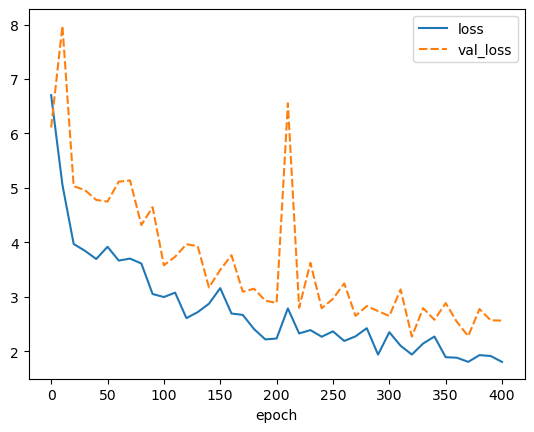

best weights loaded


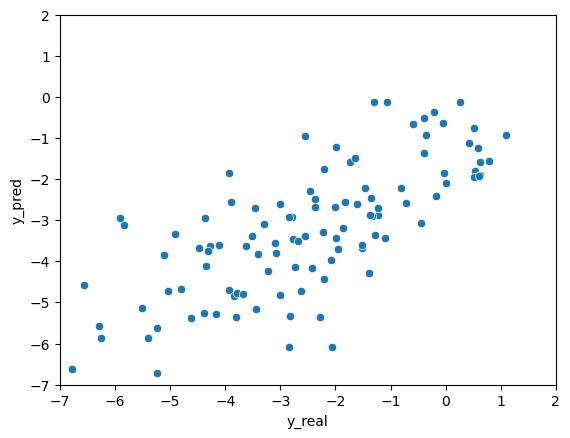

elapsed time: 189.68259954452515
run: 147
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5A9D910>, <torch.utils.data.dataset.Subset object at 0x00000155604450D0>, <torch.utils.data.dataset.Subset object at 0x00000155604456A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.688464832305907 | Validation Loss 5.835863828659058
Epoch 10 | Train Loss 4.4792531331380205 | Validation Loss 5.7613091468811035
Epoch 20 | Train Loss 4.160663378238678 | Validation Loss 5.001797437667847
Epoch 30 | Train Loss 3.8422706921895347 | Validation Loss 4.84127140045166
Epoch 40 | Train Loss 3.7234827200571696 | Validation Loss 4.543651342391968
Epoch 50 | Train Loss 3.911999813715617 | Validation Loss 4.9824395179748535
Epoch 60 | Train Loss 3.4866382598876955 | Validation Loss 4.854797840118408
Epoch 70 | Train Loss 3.5136276880900064 | Validation Loss 4.488618016242981
Epoch 80 | Train Loss 4.468474594751994 | Validation Loss 4.409889459609985
Epoch 90 | Train Loss 3.933702818552653 | Validation Loss 4.360283970832825
Epoch 100 | Train Loss 3.1770477294921875 | Validation Loss 4.508616924285889
Epoch 110 | Train Loss 3.0942593733469645 | Validation Loss 3.4732061624526978
Epoch 120 | Train Loss 2.9090895613034564 | Validation Loss 4.9349775314331055

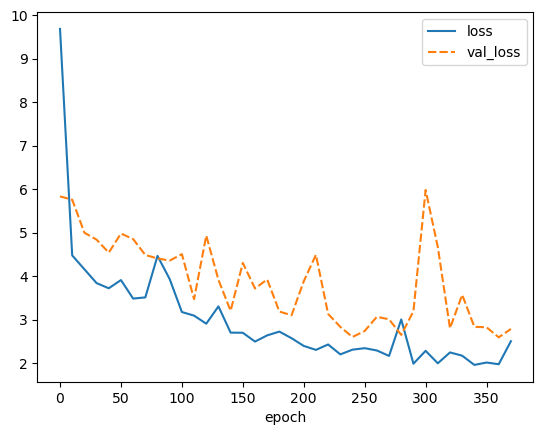

best weights loaded


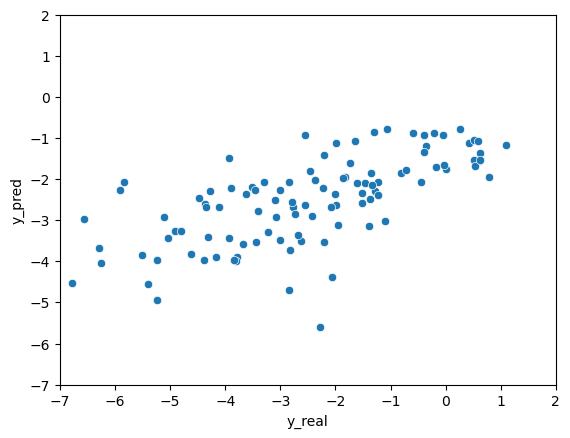

elapsed time: 191.5255994796753
run: 148
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561871D90>, <torch.utils.data.dataset.Subset object at 0x00000155D8043520>, <torch.utils.data.dataset.Subset object at 0x000001551907F2E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.522939642270407 | Validation Loss 6.578210353851318
Epoch 10 | Train Loss 4.992662000656128 | Validation Loss 5.413240432739258
Epoch 20 | Train Loss 4.587766774495443 | Validation Loss 4.7917240858078
Epoch 30 | Train Loss 4.161306651433309 | Validation Loss 5.113543272018433
Epoch 40 | Train Loss 3.8524308999379477 | Validation Loss 4.696247100830078
Epoch 50 | Train Loss 3.762883456548055 | Validation Loss 4.642462730407715
Epoch 60 | Train Loss 3.5447305043538413 | Validation Loss 5.83722996711731
Epoch 70 | Train Loss 3.7313380241394043 | Validation Loss 4.667551517486572
Epoch 80 | Train Loss 3.5030876636505126 | Validation Loss 4.182002902030945
Epoch 90 | Train Loss 3.7173486709594727 | Validation Loss 4.599689245223999
Epoch 100 | Train Loss 3.155307737986247 | Validation Loss 4.120951175689697
Epoch 110 | Train Loss 2.9220051844914754 | Validation Loss 3.954948663711548
Epoch 120 | Train Loss 2.9708834171295164 | Validation Loss 3.9091570377349854
Epoch

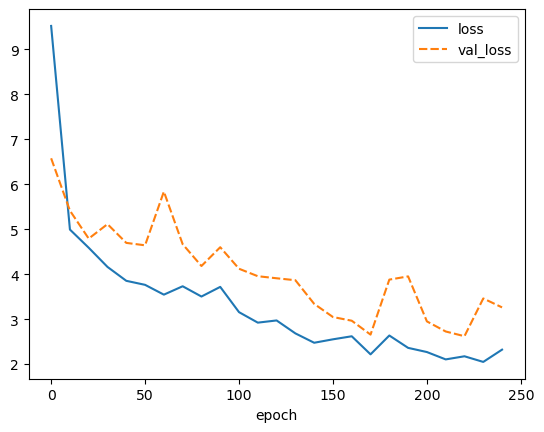

best weights loaded


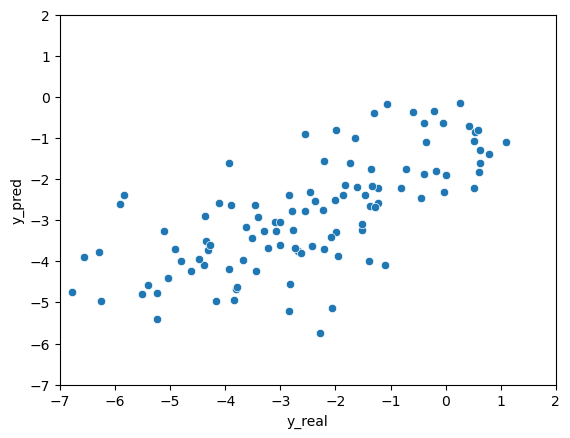

elapsed time: 102.8069794178009
run: 149
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5BC1670>, <torch.utils.data.dataset.Subset object at 0x000001556071A610>, <torch.utils.data.dataset.Subset object at 0x000001556071A4F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.83694674173991 | Validation Loss 6.461264133453369
Epoch 10 | Train Loss 4.092961025238037 | Validation Loss 5.198554515838623
Epoch 20 | Train Loss 3.8615058581034343 | Validation Loss 4.849019646644592
Epoch 30 | Train Loss 3.001590037345886 | Validation Loss 3.2537176609039307
Epoch 40 | Train Loss 2.5118232568105063 | Validation Loss 3.3348859548568726
Epoch 50 | Train Loss 1.970730765660604 | Validation Loss 2.611602544784546
Epoch 60 | Train Loss 2.1347601334253947 | Validation Loss 2.443228304386139
Epoch 70 | Train Loss 2.1608633518218996 | Validation Loss 2.4647945165634155
Epoch 80 | Train Loss 2.2247193336486815 | Validation Loss 3.0519427061080933
Epoch 90 | Train Loss 2.1605008284250897 | Validation Loss 2.038934588432312
Epoch 100 | Train Loss 1.9737059831619264 | Validation Loss 1.790054202079773
Epoch 110 | Train Loss 1.4165414412816366 | Validation Loss 1.789203941822052
Epoch 120 | Train Loss 1.4504205266634622 | Validation Loss 1.78286552429199

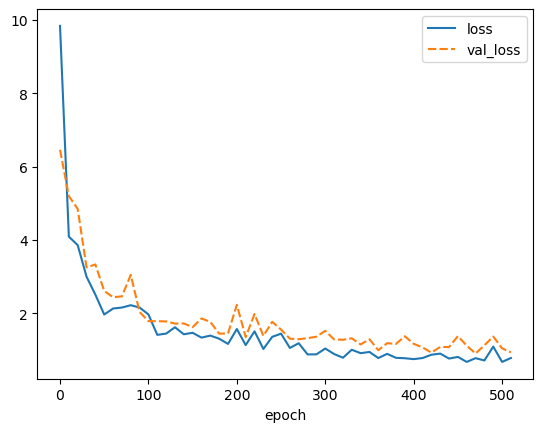

best weights loaded


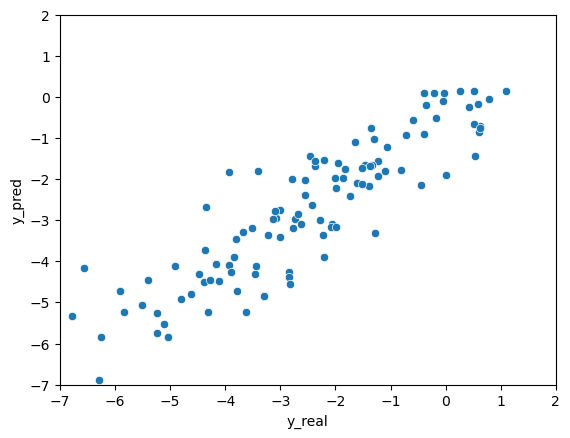

elapsed time: 208.29300713539124
run: 150
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605ABA60>, <torch.utils.data.dataset.Subset object at 0x00000155618C91F0>, <torch.utils.data.dataset.Subset object at 0x00000155618C96D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.592738691965739 | Validation Loss 6.667769193649292
Epoch 10 | Train Loss 3.4105361223220827 | Validation Loss 3.625821113586426
Epoch 20 | Train Loss 2.0342331329981485 | Validation Loss 3.1285157203674316
Epoch 30 | Train Loss 1.677299435933431 | Validation Loss 1.7411580681800842
Epoch 40 | Train Loss 1.4116376201311747 | Validation Loss 1.4437013864517212
Epoch 50 | Train Loss 1.3686692714691162 | Validation Loss 1.5631743669509888
Epoch 60 | Train Loss 1.0276591936747232 | Validation Loss 1.2800065875053406
Epoch 70 | Train Loss 0.9902376572291056 | Validation Loss 1.1784453392028809
Epoch 80 | Train Loss 0.8806281447410583 | Validation Loss 1.3045177459716797
Epoch 90 | Train Loss 0.9028943240642547 | Validation Loss 1.2067373394966125
Epoch 100 | Train Loss 0.7131270349025727 | Validation Loss 1.0199869871139526
Epoch 110 | Train Loss 0.610451877117157 | Validation Loss 0.8587935417890549
Epoch 120 | Train Loss 0.6238008687893549 | Validation Loss 1.109510

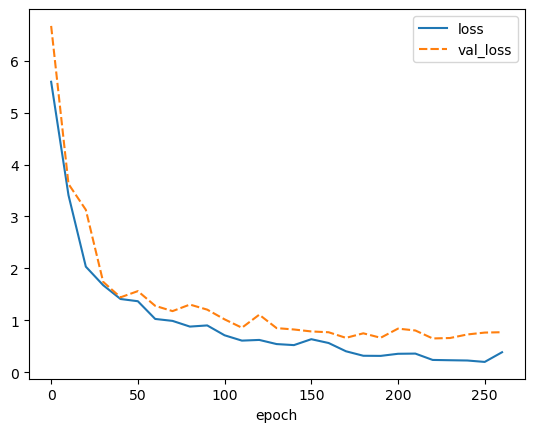

best weights loaded


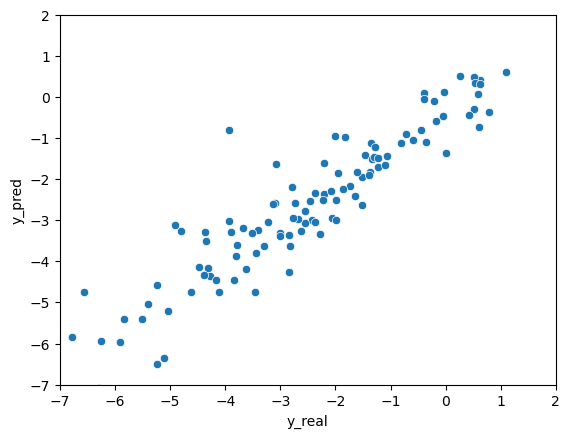

elapsed time: 90.6470901966095
run: 151
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155604D21F0>, <torch.utils.data.dataset.Subset object at 0x00000155618EC760>, <torch.utils.data.dataset.Subset object at 0x00000155618ECEE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.2025113264719645 | Validation Loss 5.66341495513916
Epoch 10 | Train Loss 4.192042620976766 | Validation Loss 5.724151134490967
Epoch 20 | Train Loss 4.108491118748983 | Validation Loss 4.876800179481506
Epoch 30 | Train Loss 3.7768938700358072 | Validation Loss 5.147585868835449
Epoch 40 | Train Loss 3.4627715746561685 | Validation Loss 4.553328990936279
Epoch 50 | Train Loss 3.660615634918213 | Validation Loss 5.046403169631958
Epoch 60 | Train Loss 3.6471996466318766 | Validation Loss 4.687526106834412
Epoch 70 | Train Loss 3.387354818979899 | Validation Loss 4.433199405670166
Epoch 80 | Train Loss 3.248672445615133 | Validation Loss 4.195881962776184
Epoch 90 | Train Loss 3.1758678754170737 | Validation Loss 3.8828623294830322
Epoch 100 | Train Loss 3.287554216384888 | Validation Loss 3.771142840385437
Epoch 110 | Train Loss 2.8017601013183593 | Validation Loss 3.4897316694259644
Epoch 120 | Train Loss 2.506593338648478 | Validation Loss 3.447838544845581
Epo

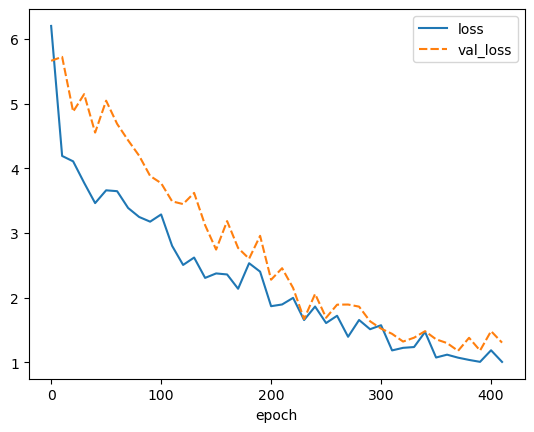

best weights loaded


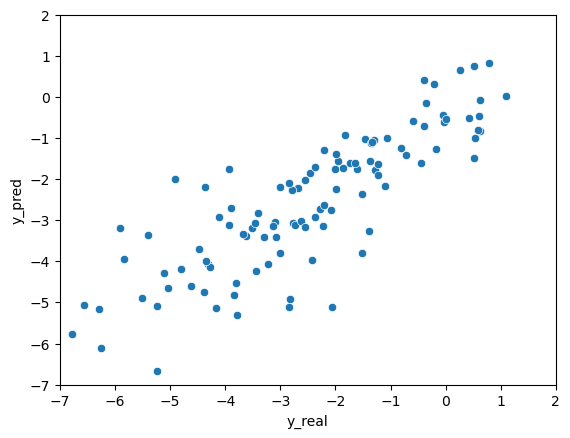

elapsed time: 158.0918047428131
run: 152
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5D2BCA0>, <torch.utils.data.dataset.Subset object at 0x00000155D5D4D220>, <torch.utils.data.dataset.Subset object at 0x00000155D5D4D700>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.616398016611735 | Validation Loss 6.030782222747803
Epoch 10 | Train Loss 3.8637067476908364 | Validation Loss 4.797205209732056
Epoch 20 | Train Loss 3.7192869186401367 | Validation Loss 5.653395652770996
Epoch 30 | Train Loss 3.9835543791453043 | Validation Loss 4.614462375640869
Epoch 40 | Train Loss 2.7693692207336427 | Validation Loss 3.319038987159729
Epoch 50 | Train Loss 3.050221347808838 | Validation Loss 2.9766924381256104
Epoch 60 | Train Loss 2.2010873556137085 | Validation Loss 3.4602948427200317
Epoch 70 | Train Loss 2.001962192853292 | Validation Loss 2.303123712539673
Epoch 80 | Train Loss 1.7226406574249267 | Validation Loss 2.470606565475464
Epoch 90 | Train Loss 1.8117612679799397 | Validation Loss 2.687074065208435
Epoch 100 | Train Loss 2.3401320854822796 | Validation Loss 1.994057834148407
Epoch 110 | Train Loss 1.674570949872335 | Validation Loss 1.8174957036972046
Epoch 120 | Train Loss 1.3383045315742492 | Validation Loss 1.54047214984893

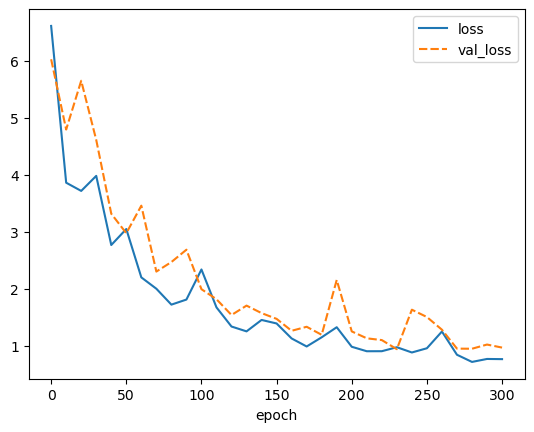

best weights loaded


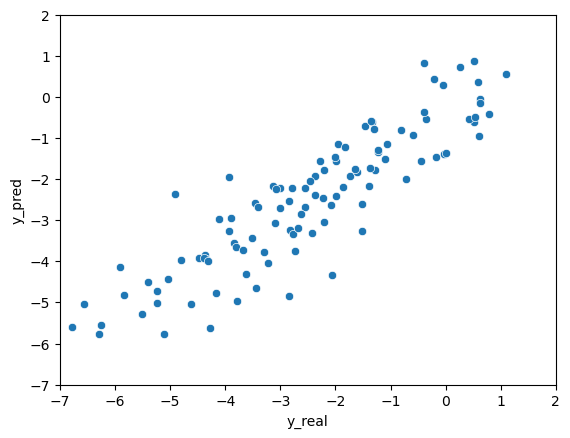

elapsed time: 113.2986912727356
run: 153
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556197A670>, <torch.utils.data.dataset.Subset object at 0x0000015560413520>, <torch.utils.data.dataset.Subset object at 0x00000155618C8610>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.489219125111898 | Validation Loss 8.411706686019897
Epoch 10 | Train Loss 3.7576738357543946 | Validation Loss 5.604450464248657
Epoch 20 | Train Loss 3.6189793745676675 | Validation Loss 5.07449746131897
Epoch 30 | Train Loss 2.8730400343736013 | Validation Loss 3.264910340309143
Epoch 40 | Train Loss 2.3784857352574664 | Validation Loss 2.903551459312439
Epoch 50 | Train Loss 2.1353677193323772 | Validation Loss 2.4874321818351746
Epoch 60 | Train Loss 2.0663445154825846 | Validation Loss 2.4774688482284546
Epoch 70 | Train Loss 2.031085526943207 | Validation Loss 2.4345043897628784
Epoch 80 | Train Loss 1.7706567207972208 | Validation Loss 1.8878865838050842
Epoch 90 | Train Loss 2.123082625865936 | Validation Loss 2.35960054397583
Epoch 100 | Train Loss 1.5946883837381998 | Validation Loss 2.613630712032318
Epoch 110 | Train Loss 1.6632322152455647 | Validation Loss 1.5468036532402039
Epoch 120 | Train Loss 1.9449389775594075 | Validation Loss 2.9000370502471

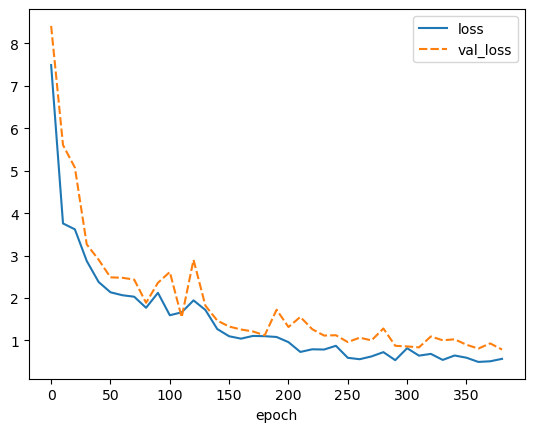

best weights loaded


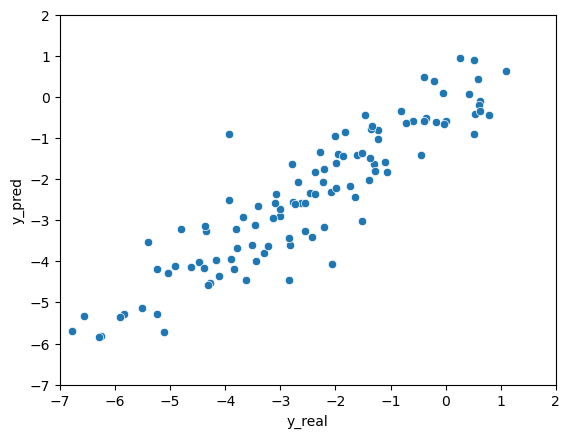

elapsed time: 146.92385864257812
run: 154
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556062BC40>, <torch.utils.data.dataset.Subset object at 0x0000015516DA4250>, <torch.utils.data.dataset.Subset object at 0x0000015516DA4C70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.828110583623251 | Validation Loss 5.878268718719482
Epoch 10 | Train Loss 4.1254903475443525 | Validation Loss 5.007251143455505
Epoch 20 | Train Loss 3.648874537150065 | Validation Loss 6.129101276397705
Epoch 30 | Train Loss 3.474544111887614 | Validation Loss 3.3313326835632324
Epoch 40 | Train Loss 2.312521155675252 | Validation Loss 3.7632884979248047
Epoch 50 | Train Loss 2.151513377825419 | Validation Loss 2.290734052658081
Epoch 60 | Train Loss 1.6221818844477336 | Validation Loss 1.9196332097053528
Epoch 70 | Train Loss 1.4551806449890137 | Validation Loss 1.717566728591919
Epoch 80 | Train Loss 1.39282283782959 | Validation Loss 2.1006722450256348
Epoch 90 | Train Loss 1.156454328695933 | Validation Loss 1.6138814687728882
Epoch 100 | Train Loss 1.2044670740763346 | Validation Loss 2.021616518497467
Epoch 110 | Train Loss 1.9431281010309855 | Validation Loss 1.571329414844513
Epoch 120 | Train Loss 0.9833782156308492 | Validation Loss 1.368231177330017


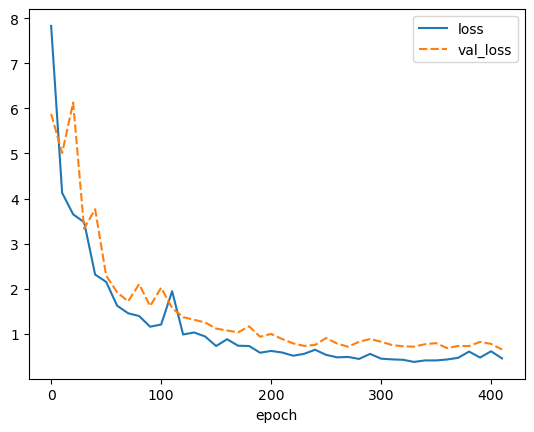

best weights loaded


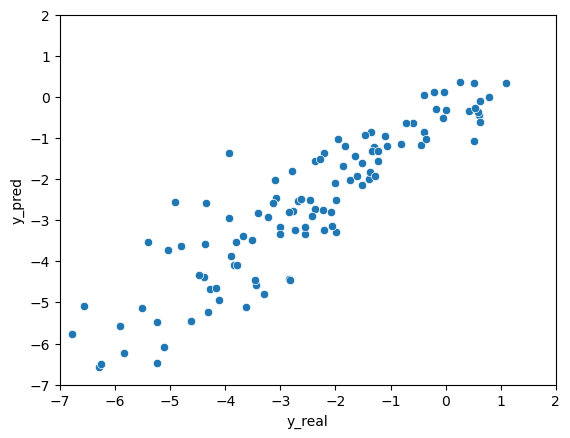

elapsed time: 160.82156562805176
run: 155
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D7EB8E80>, <torch.utils.data.dataset.Subset object at 0x00000155D7F86F40>, <torch.utils.data.dataset.Subset object at 0x00000155D8005280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.570442835489909 | Validation Loss 6.8597412109375
Epoch 10 | Train Loss 4.352298974990845 | Validation Loss 5.57790470123291
Epoch 20 | Train Loss 4.7873996575673425 | Validation Loss 5.139592885971069
Epoch 30 | Train Loss 3.553481403986613 | Validation Loss 5.679392099380493
Epoch 40 | Train Loss 3.623549461364746 | Validation Loss 4.628902554512024
Epoch 50 | Train Loss 3.6942606290181477 | Validation Loss 5.061158180236816
Epoch 60 | Train Loss 3.4795188109079995 | Validation Loss 4.857714891433716
Epoch 70 | Train Loss 3.420132780075073 | Validation Loss 5.199874639511108
Epoch 80 | Train Loss 3.3186538219451904 | Validation Loss 4.406610608100891
Epoch 90 | Train Loss 3.0558071374893188 | Validation Loss 4.869776606559753
Epoch 100 | Train Loss 2.661897414922714 | Validation Loss 3.5765669345855713
Epoch 110 | Train Loss 2.5461124817530316 | Validation Loss 3.7354410886764526
Epoch 120 | Train Loss 2.751801594098409 | Validation Loss 3.1487690210342407
Epoc

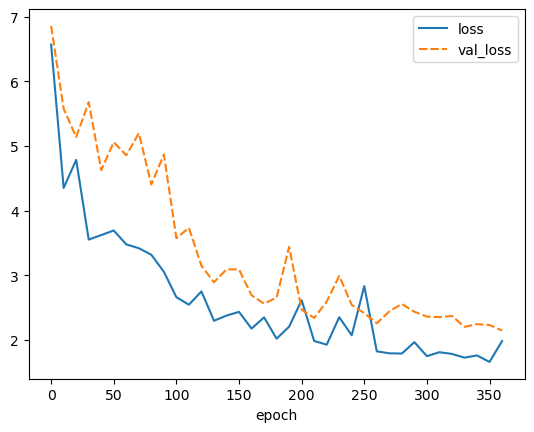

best weights loaded


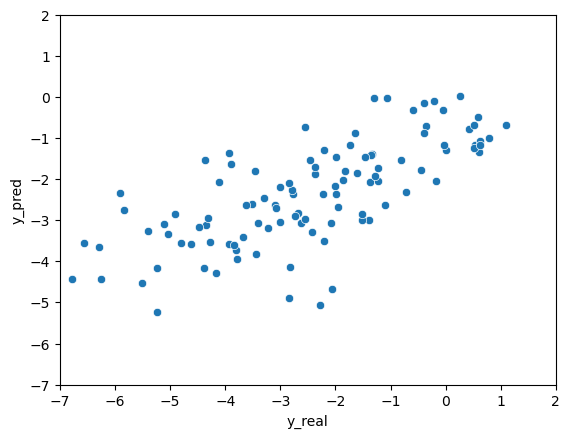

elapsed time: 159.62167048454285
run: 156
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560615790>, <torch.utils.data.dataset.Subset object at 0x0000015561904FD0>, <torch.utils.data.dataset.Subset object at 0x00000155619043D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.973072052001953 | Validation Loss 6.252199649810791
Epoch 10 | Train Loss 4.572000312805176 | Validation Loss 6.258875370025635
Epoch 20 | Train Loss 4.272071456909179 | Validation Loss 5.211460590362549
Epoch 30 | Train Loss 4.485035769144694 | Validation Loss 4.803075551986694
Epoch 40 | Train Loss 3.854292710622152 | Validation Loss 5.034154415130615
Epoch 50 | Train Loss 3.8904470284779866 | Validation Loss 5.560476303100586
Epoch 60 | Train Loss 3.600438674290975 | Validation Loss 4.2748881578445435
Epoch 70 | Train Loss 3.597795597712199 | Validation Loss 4.822866678237915
Epoch 80 | Train Loss 3.1898250420888266 | Validation Loss 4.612682580947876
Epoch 90 | Train Loss 3.936405897140503 | Validation Loss 4.063609480857849
Epoch 100 | Train Loss 2.979418706893921 | Validation Loss 4.059746026992798
Epoch 110 | Train Loss 2.981189219156901 | Validation Loss 3.7491090297698975
Epoch 120 | Train Loss 2.778015899658203 | Validation Loss 3.8886855840682983
Epoch

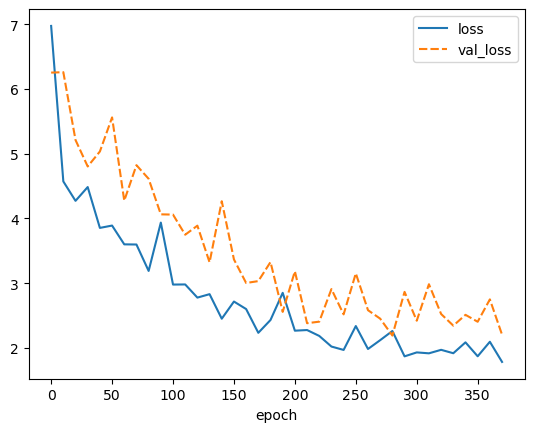

best weights loaded


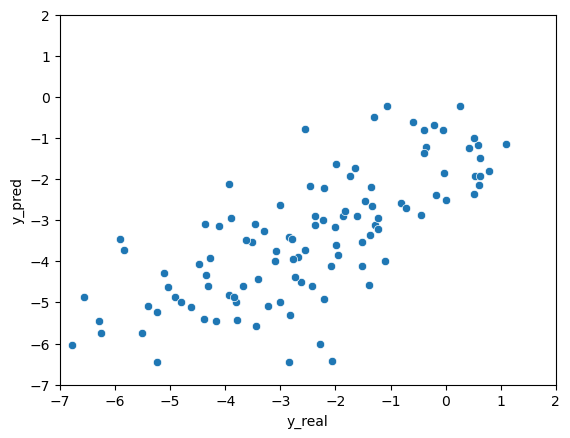

elapsed time: 195.84588360786438
run: 157
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560664550>, <torch.utils.data.dataset.Subset object at 0x0000015560585700>, <torch.utils.data.dataset.Subset object at 0x0000015560585AC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.739736398061117 | Validation Loss 8.073793649673462
Epoch 10 | Train Loss 4.404718208312988 | Validation Loss 5.500821352005005
Epoch 20 | Train Loss 3.9305680354436237 | Validation Loss 5.017756223678589
Epoch 30 | Train Loss 4.421658515930176 | Validation Loss 4.971790552139282
Epoch 40 | Train Loss 3.8322944164276125 | Validation Loss 5.1330389976501465
Epoch 50 | Train Loss 3.6981632709503174 | Validation Loss 4.773927688598633
Epoch 60 | Train Loss 3.552340873082479 | Validation Loss 4.447621583938599
Epoch 70 | Train Loss 3.6900726795196532 | Validation Loss 4.394728899002075
Epoch 80 | Train Loss 3.432796001434326 | Validation Loss 4.715381145477295
Epoch 90 | Train Loss 3.348121150334676 | Validation Loss 3.7905924320220947
Epoch 100 | Train Loss 2.887384064992269 | Validation Loss 4.912553548812866
Epoch 110 | Train Loss 3.0798327207565306 | Validation Loss 3.6298656463623047
Epoch 120 | Train Loss 2.9439205328623452 | Validation Loss 3.4142255783081055


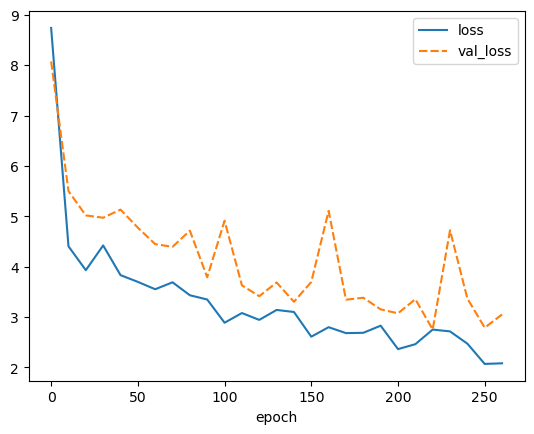

best weights loaded


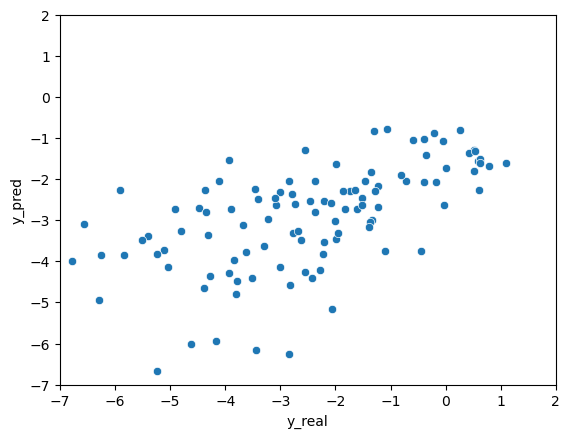

elapsed time: 155.06834721565247
run: 158
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561813190>, <torch.utils.data.dataset.Subset object at 0x00000155618E1D00>, <torch.utils.data.dataset.Subset object at 0x00000155618E1C10>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.303018919626872 | Validation Loss 5.642904281616211
Epoch 10 | Train Loss 4.700242066383362 | Validation Loss 6.661711692810059
Epoch 20 | Train Loss 4.27720456123352 | Validation Loss 5.189244866371155
Epoch 30 | Train Loss 4.007248528798422 | Validation Loss 4.789266109466553
Epoch 40 | Train Loss 4.1196585973103845 | Validation Loss 4.777144908905029
Epoch 50 | Train Loss 4.298023732503255 | Validation Loss 5.008429288864136
Epoch 60 | Train Loss 3.5669068495432534 | Validation Loss 5.44560432434082
Epoch 70 | Train Loss 3.7023491064707437 | Validation Loss 5.286567687988281
Epoch 80 | Train Loss 3.8905314286549886 | Validation Loss 4.701099872589111
Epoch 90 | Train Loss 3.276726547876994 | Validation Loss 4.020127773284912
Epoch 100 | Train Loss 2.9966493129730223 | Validation Loss 3.8659228086471558
Epoch 110 | Train Loss 2.8801756540934247 | Validation Loss 3.514974355697632
Epoch 120 | Train Loss 2.832518378893534 | Validation Loss 3.702501893043518
Epoch

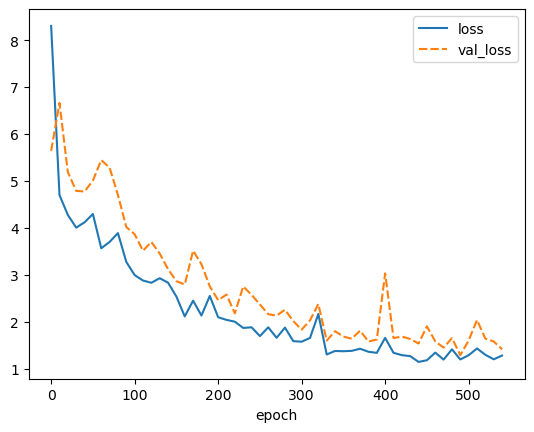

best weights loaded


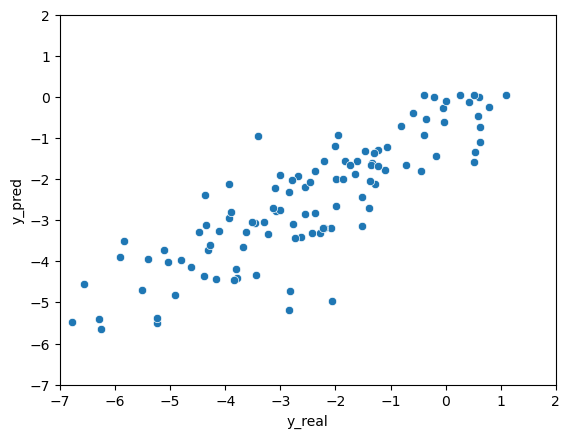

elapsed time: 263.9286789894104
run: 159
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>, <function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5C12E50>, <torch.utils.data.dataset.Subset object at 0x00000155617D0A00>, <torch.utils.data.dataset.Subset object at 0x00000155617D0DC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.055506277084351 | Validation Loss 5.750831604003906
Epoch 10 | Train Loss 3.6355273564656576 | Validation Loss 4.545282363891602
Epoch 20 | Train Loss 2.877083174387614 | Validation Loss 3.8487462997436523
Epoch 30 | Train Loss 3.299484459559123 | Validation Loss 3.366185784339905
Epoch 40 | Train Loss 2.3175511519114176 | Validation Loss 2.6831367015838623
Epoch 50 | Train Loss 2.147665770848592 | Validation Loss 3.241966485977173
Epoch 60 | Train Loss 1.8844874858856202 | Validation Loss 2.630666494369507
Epoch 70 | Train Loss 2.0376449743906657 | Validation Loss 2.164414167404175
Epoch 80 | Train Loss 2.2608274539311726 | Validation Loss 3.1730505228042603
Epoch 90 | Train Loss 1.6964710156122844 | Validation Loss 1.8564569354057312
Epoch 100 | Train Loss 1.5278286774953207 | Validation Loss 2.1387131214141846
Epoch 110 | Train Loss 1.501550062497457 | Validation Loss 1.8098551034927368
Epoch 120 | Train Loss 1.4869499842325846 | Validation Loss 3.161336541175

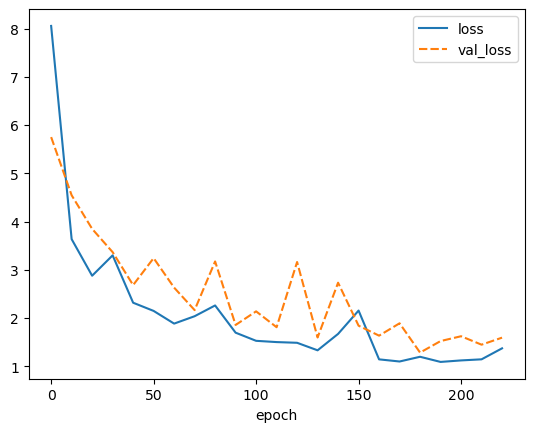

best weights loaded


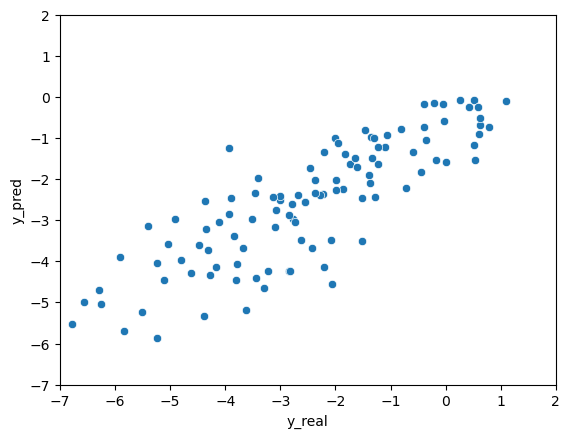

elapsed time: 107.47541689872742
run: 160
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605141F0>, <torch.utils.data.dataset.Subset object at 0x0000015561836790>, <torch.utils.data.dataset.Subset object at 0x0000015561836700>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.0826147874196375 | Validation Loss 5.448907852172852
Epoch 10 | Train Loss 3.601724084218343 | Validation Loss 4.65367579460144
Epoch 20 | Train Loss 2.4843652486801147 | Validation Loss 2.686030864715576
Epoch 30 | Train Loss 2.4986941973368326 | Validation Loss 4.47078013420105
Epoch 40 | Train Loss 1.9951088428497314 | Validation Loss 2.2039228677749634
Epoch 50 | Train Loss 1.9048401991526285 | Validation Loss 2.07907634973526
Epoch 60 | Train Loss 2.2053857882817587 | Validation Loss 3.0155895948410034
Epoch 70 | Train Loss 1.3156195640563966 | Validation Loss 1.6071128249168396
Epoch 80 | Train Loss 1.0997388084729514 | Validation Loss 2.064448654651642
Epoch 90 | Train Loss 1.2283130884170532 | Validation Loss 1.8020451068878174
Epoch 100 | Train Loss 1.0143046398957571 | Validation Loss 1.5111044645309448
Epoch 110 | Train Loss 1.3231454332669577 | Validation Loss 1.6454073786735535
Epoch 120 | Train Loss 0.8771235525608063 | Validation Loss 1.28050327301

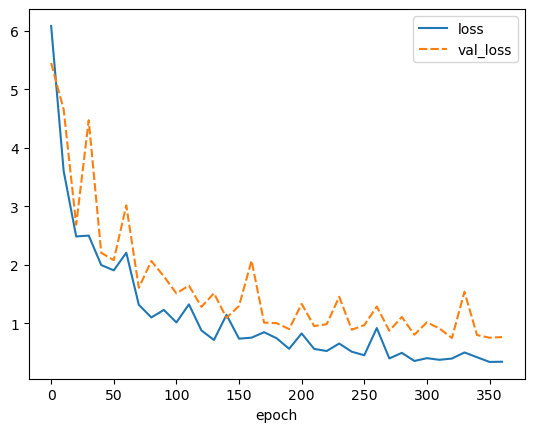

best weights loaded


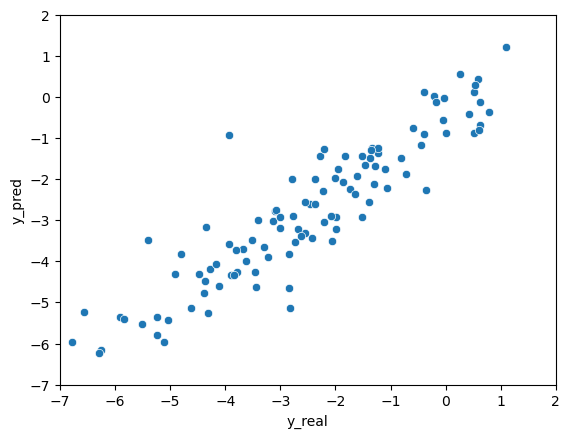

elapsed time: 133.96026945114136
run: 161
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001551916C430>, <torch.utils.data.dataset.Subset object at 0x00000155D7D701C0>, <torch.utils.data.dataset.Subset object at 0x00000155D7D70580>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.373042074839274 | Validation Loss 5.732233762741089
Epoch 10 | Train Loss 4.324772357940674 | Validation Loss 5.3759191036224365
Epoch 20 | Train Loss 4.15460311571757 | Validation Loss 4.933689594268799
Epoch 30 | Train Loss 3.7799241463343303 | Validation Loss 5.219179630279541
Epoch 40 | Train Loss 3.53198877175649 | Validation Loss 5.230184078216553
Epoch 50 | Train Loss 3.838348897298177 | Validation Loss 4.968045711517334
Epoch 60 | Train Loss 3.628821309407552 | Validation Loss 4.71804666519165
Epoch 70 | Train Loss 3.5466650168100995 | Validation Loss 4.417436480522156
Epoch 80 | Train Loss 3.501480770111084 | Validation Loss 4.549672722816467
Epoch 90 | Train Loss 3.233243211110433 | Validation Loss 4.345246076583862
Epoch 100 | Train Loss 3.0725619316101076 | Validation Loss 3.85035240650177
Epoch 110 | Train Loss 2.835998010635376 | Validation Loss 3.9408152103424072
Epoch 120 | Train Loss 2.8115457693735757 | Validation Loss 3.725883960723877
Epoch 13

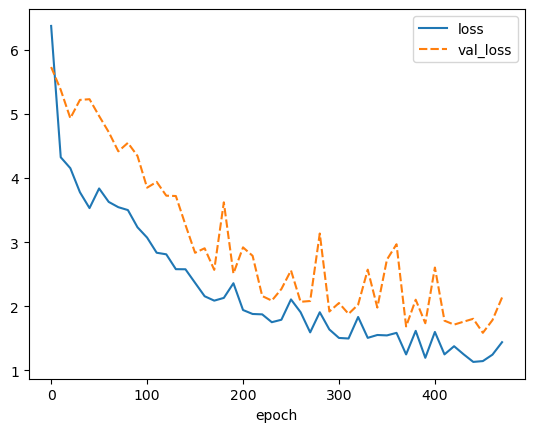

best weights loaded


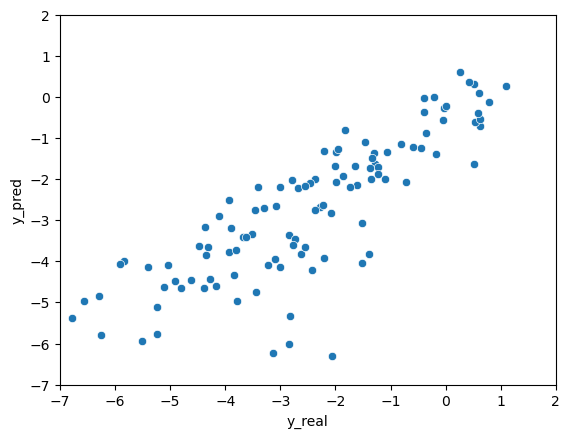

elapsed time: 202.54998683929443
run: 162
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5D346D0>, <torch.utils.data.dataset.Subset object at 0x00000155D5B4D430>, <torch.utils.data.dataset.Subset object at 0x00000155D5B4D160>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.768588495254517 | Validation Loss 7.759613513946533
Epoch 10 | Train Loss 3.9544065316518147 | Validation Loss 5.961373448371887
Epoch 20 | Train Loss 3.7525418917338054 | Validation Loss 4.284009218215942
Epoch 30 | Train Loss 3.7791975657145183 | Validation Loss 4.574015140533447
Epoch 40 | Train Loss 2.5374681055545807 | Validation Loss 4.096814274787903
Epoch 50 | Train Loss 2.28664809068044 | Validation Loss 2.7872631549835205
Epoch 60 | Train Loss 1.9649040778477986 | Validation Loss 2.3560924530029297
Epoch 70 | Train Loss 2.073160266876221 | Validation Loss 3.4322701692581177
Epoch 80 | Train Loss 1.7559033552805583 | Validation Loss 2.616071343421936
Epoch 90 | Train Loss 1.9333455403645834 | Validation Loss 2.33694326877594
Epoch 100 | Train Loss 1.7386375427246095 | Validation Loss 2.5066308975219727
Epoch 110 | Train Loss 1.7918142080307007 | Validation Loss 1.7788934707641602
Epoch 120 | Train Loss 1.6859920064608256 | Validation Loss 1.8199452161788

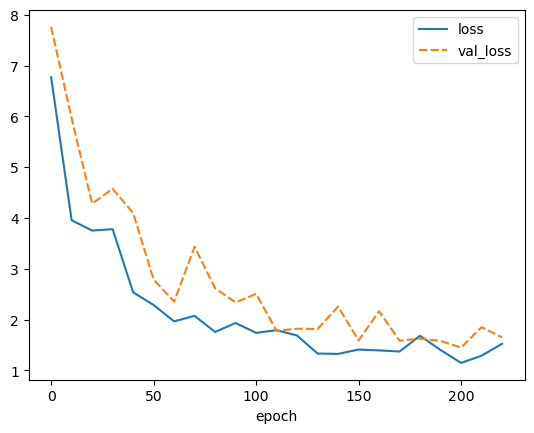

best weights loaded


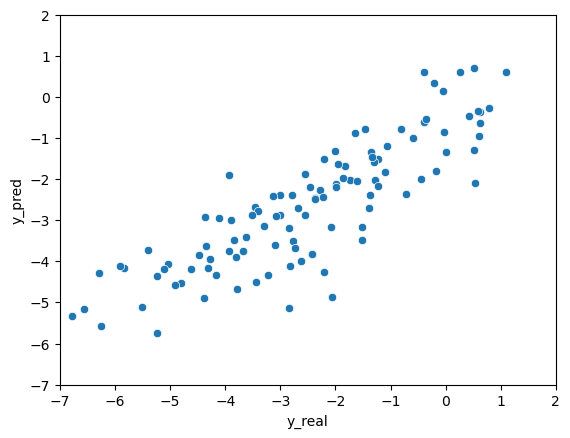

elapsed time: 94.1852388381958
run: 163
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155607A71F0>, <torch.utils.data.dataset.Subset object at 0x000001551901FAC0>, <torch.utils.data.dataset.Subset object at 0x000001551901FEE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.839509042104085 | Validation Loss 8.248361587524414
Epoch 10 | Train Loss 3.748728116353353 | Validation Loss 6.70485258102417
Epoch 20 | Train Loss 3.1813247124354045 | Validation Loss 3.701777935028076
Epoch 30 | Train Loss 2.8351406892140707 | Validation Loss 2.9332767724990845
Epoch 40 | Train Loss 2.3441739082336426 | Validation Loss 2.546813726425171
Epoch 50 | Train Loss 2.2435189723968505 | Validation Loss 2.100104570388794
Epoch 60 | Train Loss 1.7055689493815105 | Validation Loss 2.201112389564514
Epoch 70 | Train Loss 1.4856730461120606 | Validation Loss 2.287375807762146
Epoch 80 | Train Loss 2.0887616157531737 | Validation Loss 2.867118716239929
Epoch 90 | Train Loss 1.8477725982666016 | Validation Loss 1.9231308698654175
Epoch 100 | Train Loss 1.3419543902079265 | Validation Loss 1.6945056319236755
Epoch 110 | Train Loss 1.4292887926101685 | Validation Loss 1.5410916805267334
Epoch 120 | Train Loss 1.2102796216805776 | Validation Loss 1.488103270530

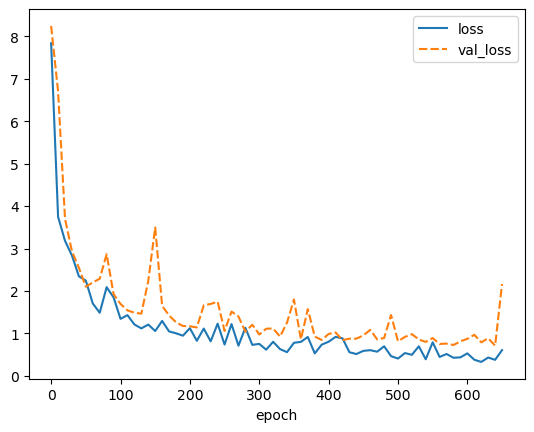

best weights loaded


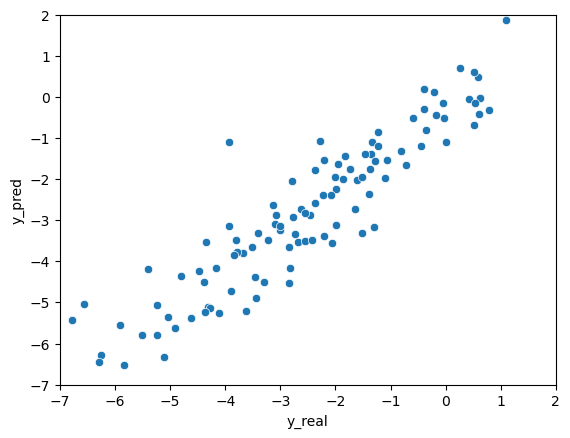

elapsed time: 276.66031432151794
run: 164
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015516DB4490>, <torch.utils.data.dataset.Subset object at 0x0000015560602A60>, <torch.utils.data.dataset.Subset object at 0x0000015560602DC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 9.05204070409139 | Validation Loss 5.867950201034546
Epoch 10 | Train Loss 3.7940417607625325 | Validation Loss 5.198439955711365
Epoch 20 | Train Loss 3.4483373800913495 | Validation Loss 4.479804992675781
Epoch 30 | Train Loss 3.2625380516052247 | Validation Loss 4.073827743530273
Epoch 40 | Train Loss 2.15544277826945 | Validation Loss 3.321656584739685
Epoch 50 | Train Loss 2.672338326772054 | Validation Loss 2.7233515977859497
Epoch 60 | Train Loss 1.804616896311442 | Validation Loss 2.5135666131973267
Epoch 70 | Train Loss 1.5358116507530213 | Validation Loss 1.9581835865974426
Epoch 80 | Train Loss 1.8042299350102742 | Validation Loss 2.913056969642639
Epoch 90 | Train Loss 1.3472292184829713 | Validation Loss 1.676116406917572
Epoch 100 | Train Loss 1.4422101855278016 | Validation Loss 1.484127938747406
Epoch 110 | Train Loss 1.3237837513287862 | Validation Loss 1.8657052516937256
Epoch 120 | Train Loss 1.0387436429659525 | Validation Loss 1.559993207454681

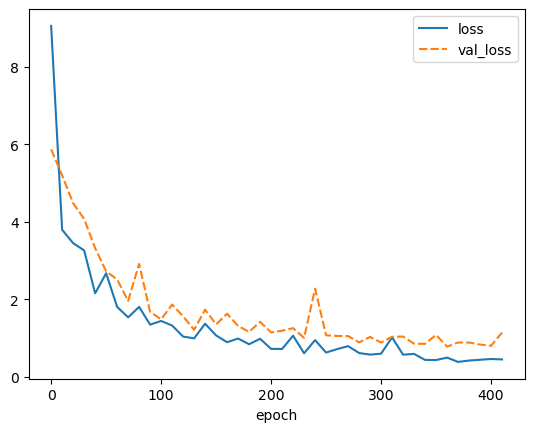

best weights loaded


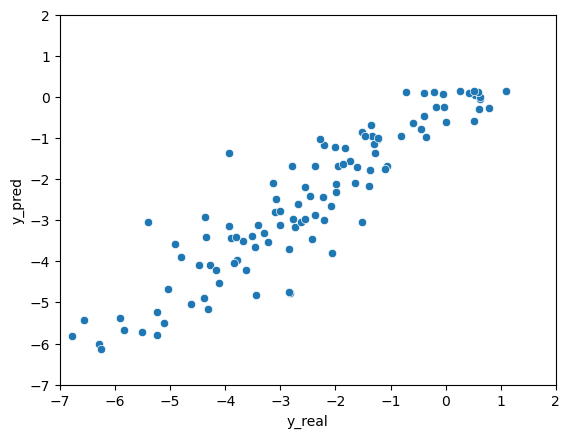

elapsed time: 168.6916103363037
run: 165
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155409A63D0>, <torch.utils.data.dataset.Subset object at 0x00000155D7E64070>, <torch.utils.data.dataset.Subset object at 0x0000015561A09BB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.933066876729329 | Validation Loss 7.714049577713013
Epoch 10 | Train Loss 4.343636004130046 | Validation Loss 5.262241721153259
Epoch 20 | Train Loss 3.9464614550272623 | Validation Loss 5.042787313461304
Epoch 30 | Train Loss 3.9272534370422365 | Validation Loss 5.349594354629517
Epoch 40 | Train Loss 3.7986371835072834 | Validation Loss 5.260425090789795
Epoch 50 | Train Loss 3.6101296027501424 | Validation Loss 4.848071575164795
Epoch 60 | Train Loss 3.481270106633504 | Validation Loss 4.798320770263672
Epoch 70 | Train Loss 3.3449378967285157 | Validation Loss 4.306992411613464
Epoch 80 | Train Loss 3.6473015626271565 | Validation Loss 4.104863524436951
Epoch 90 | Train Loss 2.9078061898549397 | Validation Loss 3.8077179193496704
Epoch 100 | Train Loss 2.631800667444865 | Validation Loss 3.5658819675445557
Epoch 110 | Train Loss 2.7609132130940757 | Validation Loss 3.4817562103271484
Epoch 120 | Train Loss 2.992310802141825 | Validation Loss 3.834660053253174

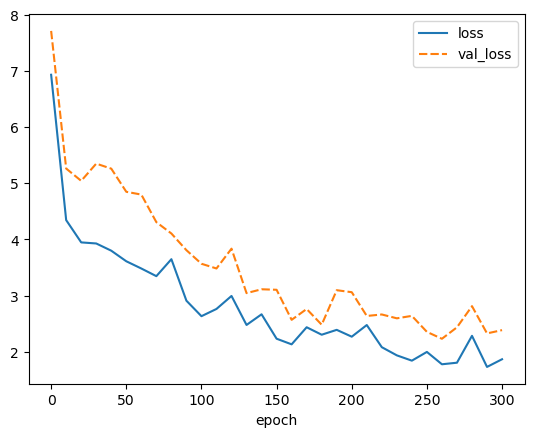

best weights loaded


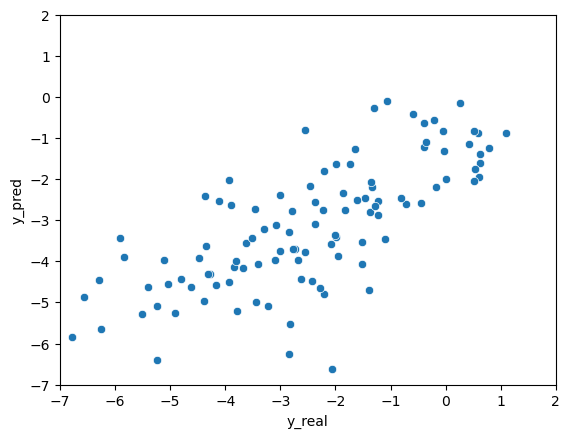

elapsed time: 146.8358976840973
run: 166
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5B57040>, <torch.utils.data.dataset.Subset object at 0x00000155DB15DD00>, <torch.utils.data.dataset.Subset object at 0x00000155DB165340>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.157798115412394 | Validation Loss 7.120941638946533
Epoch 10 | Train Loss 5.109034570058187 | Validation Loss 5.097899913787842
Epoch 20 | Train Loss 4.32827037970225 | Validation Loss 6.197488784790039
Epoch 30 | Train Loss 3.7512080510457357 | Validation Loss 4.9962074756622314
Epoch 40 | Train Loss 3.868709945678711 | Validation Loss 5.343647241592407
Epoch 50 | Train Loss 3.9446963628133136 | Validation Loss 4.919004201889038
Epoch 60 | Train Loss 3.740272219975789 | Validation Loss 4.540488004684448
Epoch 70 | Train Loss 3.6674755096435545 | Validation Loss 5.228311538696289
Epoch 80 | Train Loss 3.6394989490509033 | Validation Loss 4.785706520080566
Epoch 90 | Train Loss 3.354787731170654 | Validation Loss 4.294220685958862
Epoch 100 | Train Loss 3.3243328889211017 | Validation Loss 3.8854291439056396
Epoch 110 | Train Loss 2.6989731470743816 | Validation Loss 3.633593797683716
Epoch 120 | Train Loss 2.642905759811401 | Validation Loss 3.1038084030151367
Ep

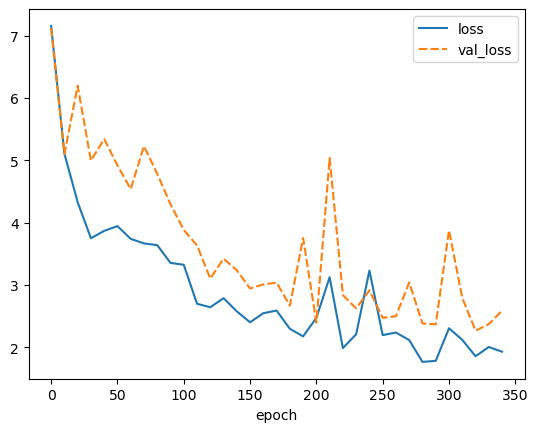

best weights loaded


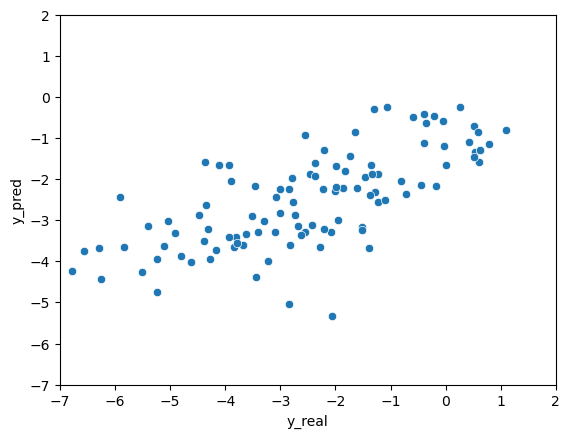

elapsed time: 178.28304934501648
run: 167
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155D5CFF040>, <torch.utils.data.dataset.Subset object at 0x000001556182BE80>, <torch.utils.data.dataset.Subset object at 0x00000155D5C17160>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.308434963226318 | Validation Loss 6.652743339538574
Epoch 10 | Train Loss 4.320799875259399 | Validation Loss 5.332336187362671
Epoch 20 | Train Loss 4.018611288070678 | Validation Loss 5.413601398468018
Epoch 30 | Train Loss 3.925603993733724 | Validation Loss 5.0968406200408936
Epoch 40 | Train Loss 3.8746734778086345 | Validation Loss 4.835190296173096
Epoch 50 | Train Loss 3.7443079153696694 | Validation Loss 5.061386704444885
Epoch 60 | Train Loss 4.035078461964925 | Validation Loss 4.467006683349609
Epoch 70 | Train Loss 3.712726052602132 | Validation Loss 4.665524244308472
Epoch 80 | Train Loss 3.7954976240793865 | Validation Loss 4.889223098754883
Epoch 90 | Train Loss 3.250930182139079 | Validation Loss 3.7808045148849487
Epoch 100 | Train Loss 3.02774879137675 | Validation Loss 4.662475824356079
Epoch 110 | Train Loss 3.443464152018229 | Validation Loss 4.056392788887024
Epoch 120 | Train Loss 3.2916285196940103 | Validation Loss 3.971932291984558
Epoc

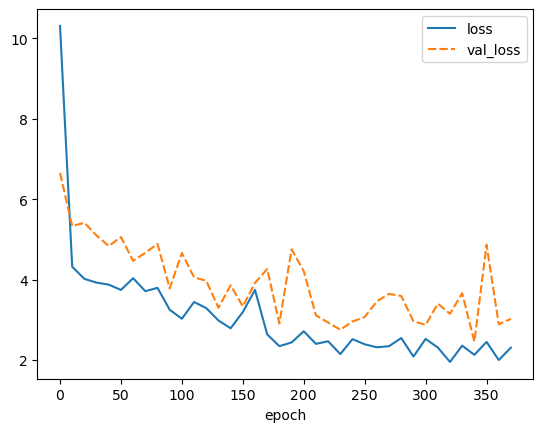

best weights loaded


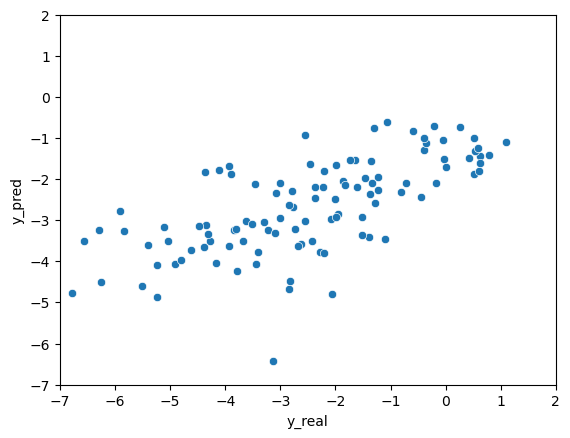

elapsed time: 212.40751838684082
run: 168
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560726E50>, <torch.utils.data.dataset.Subset object at 0x00000155619AED00>, <torch.utils.data.dataset.Subset object at 0x00000155619AE220>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.395116138458253 | Validation Loss 5.869174003601074
Epoch 10 | Train Loss 4.66890762646993 | Validation Loss 6.653769493103027
Epoch 20 | Train Loss 4.271330897013346 | Validation Loss 5.855892658233643
Epoch 30 | Train Loss 4.036533403396606 | Validation Loss 4.733071804046631
Epoch 40 | Train Loss 3.706365529696147 | Validation Loss 5.329595327377319
Epoch 50 | Train Loss 3.74662766456604 | Validation Loss 5.225587606430054
Epoch 60 | Train Loss 3.9888795375823975 | Validation Loss 5.669833421707153
Epoch 70 | Train Loss 3.918140204747518 | Validation Loss 4.945936441421509
Epoch 80 | Train Loss 3.6418185075124105 | Validation Loss 4.952561616897583
Epoch 90 | Train Loss 4.1118929545084635 | Validation Loss 4.951465129852295
Epoch 100 | Train Loss 3.154816206296285 | Validation Loss 4.471134901046753
Epoch 110 | Train Loss 2.9348363955815633 | Validation Loss 3.933409094810486
Epoch 120 | Train Loss 2.9452258507410685 | Validation Loss 3.563589334487915
Epoch 

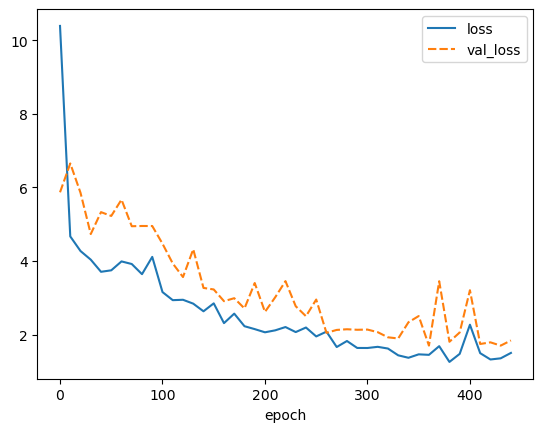

best weights loaded


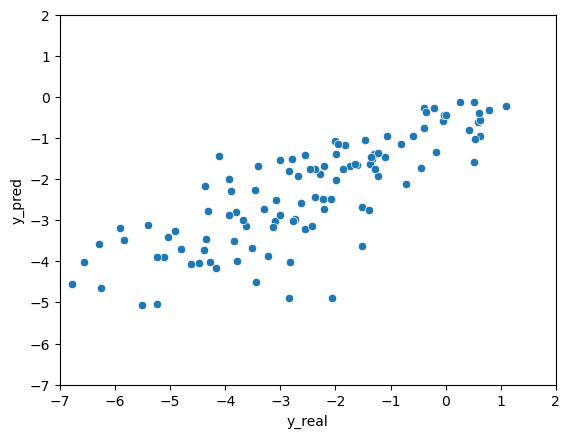

elapsed time: 211.3003978729248
run: 169
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000001555D725B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556067C910>, <torch.utils.data.dataset.Subset object at 0x000001556197CDC0>, <torch.utils.data.dataset.Subset object at 0x000001556197CD00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 11.544802029927572 | Validation Loss 7.199919700622559
Epoch 10 | Train Loss 3.7991636117299397 | Validation Loss 5.1998937129974365
Epoch 20 | Train Loss 3.9222280820210775 | Validation Loss 4.468628764152527
Epoch 30 | Train Loss 3.519205904006958 | Validation Loss 3.9047367572784424
Epoch 40 | Train Loss 2.6714660545190174 | Validation Loss 3.413087844848633
Epoch 50 | Train Loss 2.457668153444926 | Validation Loss 2.6876522302627563
Epoch 60 | Train Loss 2.2348360935846965 | Validation Loss 2.5475891828536987
Epoch 70 | Train Loss 2.135867969195048 | Validation Loss 2.7225019931793213
Epoch 80 | Train Loss 1.812196167310079 | Validation Loss 2.059730291366577
Epoch 90 | Train Loss 1.7215159813563028 | Validation Loss 2.325164318084717
Epoch 100 | Train Loss 1.4338160355885823 | Validation Loss 1.658439815044403
Epoch 110 | Train Loss 1.3358206788698832 | Validation Loss 1.9453710317611694
Epoch 120 | Train Loss 1.4460192521413167 | Validation Loss 1.56765812635

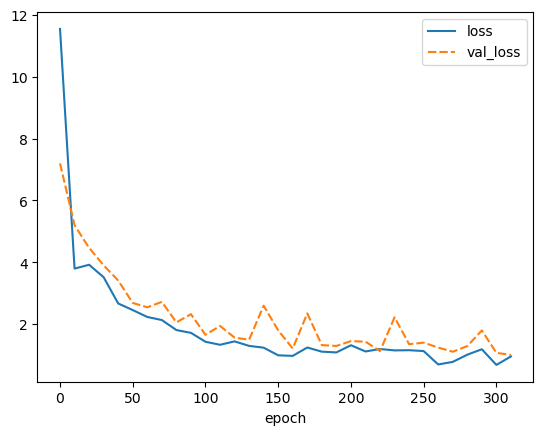

best weights loaded


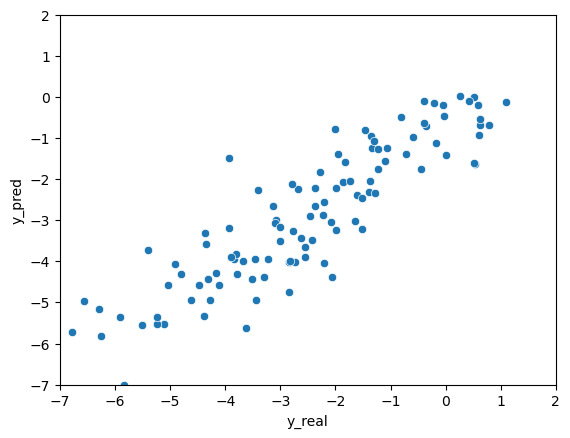

elapsed time: 102.10112524032593
run: 170
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015561820EB0>, <torch.utils.data.dataset.Subset object at 0x0000015560574190>, <torch.utils.data.dataset.Subset object at 0x0000015560574760>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.645453151067098 | Validation Loss 5.936391115188599
Epoch 10 | Train Loss 2.913950872421265 | Validation Loss 3.311293125152588
Epoch 20 | Train Loss 3.234681995709737 | Validation Loss 3.6628544330596924
Epoch 30 | Train Loss 2.2423136234283447 | Validation Loss 2.2640557289123535
Epoch 40 | Train Loss 1.7833722988764444 | Validation Loss 2.197190761566162
Epoch 50 | Train Loss 1.5294003089269002 | Validation Loss 1.8748633861541748
Epoch 60 | Train Loss 1.4103383938471477 | Validation Loss 1.4813892245292664
Epoch 70 | Train Loss 0.8347691396872202 | Validation Loss 1.1589664220809937
Epoch 80 | Train Loss 0.88830752770106 | Validation Loss 1.3749159574508667
Epoch 90 | Train Loss 0.8448659002780914 | Validation Loss 1.2322499752044678
Epoch 100 | Train Loss 0.7707848568757375 | Validation Loss 1.1552935242652893
Epoch 110 | Train Loss 0.6037294824918111 | Validation Loss 1.2329545617103577
Epoch 120 | Train Loss 0.5509993414084117 | Validation Loss 0.934452921

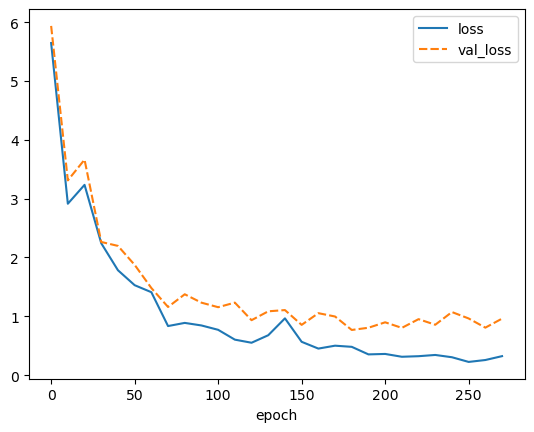

best weights loaded


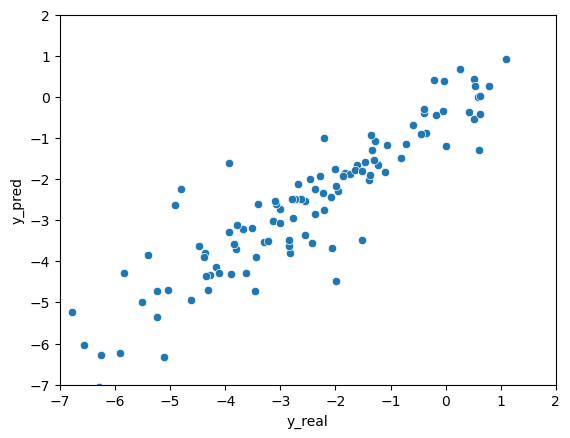

elapsed time: 71.0549156665802
run: 171
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556075E490>, <torch.utils.data.dataset.Subset object at 0x00000155D5B64370>, <torch.utils.data.dataset.Subset object at 0x00000155618665B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.049065764745077 | Validation Loss 6.3094024658203125
Epoch 10 | Train Loss 4.1244524955749515 | Validation Loss 5.411153793334961
Epoch 20 | Train Loss 3.7907624085744223 | Validation Loss 5.074549674987793
Epoch 30 | Train Loss 3.699162785212199 | Validation Loss 4.687440395355225
Epoch 40 | Train Loss 3.43621555964152 | Validation Loss 4.661383152008057
Epoch 50 | Train Loss 3.4079890410105387 | Validation Loss 4.430718421936035
Epoch 60 | Train Loss 3.5249644120534263 | Validation Loss 4.468911647796631
Epoch 70 | Train Loss 3.1630035400390626 | Validation Loss 4.33549964427948
Epoch 80 | Train Loss 3.1180580139160154 | Validation Loss 4.424683332443237
Epoch 90 | Train Loss 3.157769807179769 | Validation Loss 3.8866703510284424
Epoch 100 | Train Loss 3.0351972818374633 | Validation Loss 3.791352152824402
Epoch 110 | Train Loss 2.7523208459218345 | Validation Loss 4.013793706893921
Epoch 120 | Train Loss 2.533431339263916 | Validation Loss 3.920293688774109
Ep

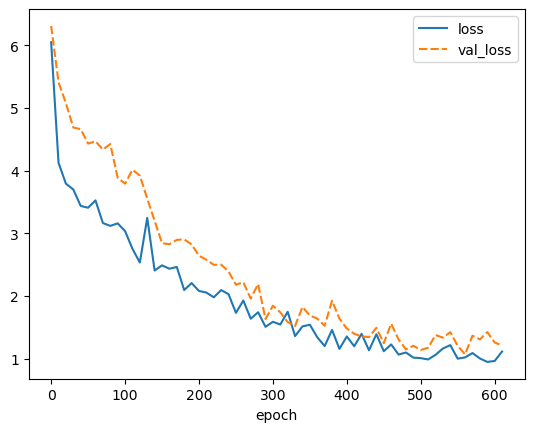

best weights loaded


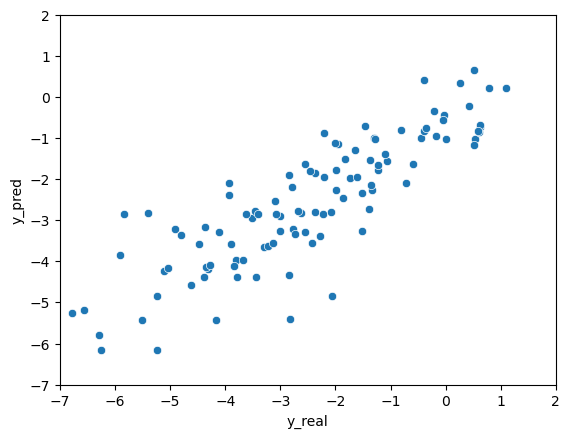

elapsed time: 174.81487488746643
run: 172
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556192A490>, <torch.utils.data.dataset.Subset object at 0x000001551906BEE0>, <torch.utils.data.dataset.Subset object at 0x000001551906B5E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.071279939015707 | Validation Loss 6.2711241245269775
Epoch 10 | Train Loss 3.569933064778646 | Validation Loss 4.464714765548706
Epoch 20 | Train Loss 3.978267947832743 | Validation Loss 4.445690870285034
Epoch 30 | Train Loss 3.7754907449086508 | Validation Loss 4.095209717750549
Epoch 40 | Train Loss 2.709166709582011 | Validation Loss 3.481648325920105
Epoch 50 | Train Loss 2.8932179609934487 | Validation Loss 3.22854220867157
Epoch 60 | Train Loss 2.3692870775858563 | Validation Loss 2.6819212436676025
Epoch 70 | Train Loss 2.427641272544861 | Validation Loss 2.786237955093384
Epoch 80 | Train Loss 1.9114887356758117 | Validation Loss 2.9907509088516235
Epoch 90 | Train Loss 2.150209108988444 | Validation Loss 2.319857954978943
Epoch 100 | Train Loss 1.8600449959437053 | Validation Loss 2.5568935871124268
Epoch 110 | Train Loss 1.7263761123021444 | Validation Loss 2.0964653491973877
Epoch 120 | Train Loss 1.8525696674982706 | Validation Loss 2.075195670127868

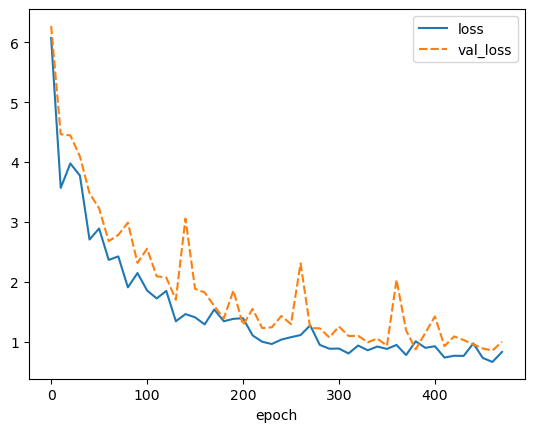

best weights loaded


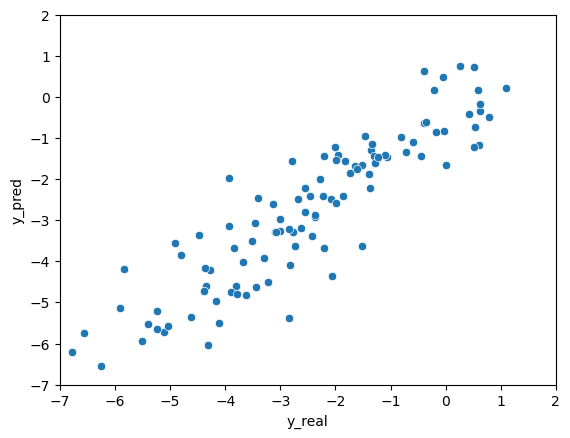

elapsed time: 126.53531241416931
run: 173
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155604575B0>, <torch.utils.data.dataset.Subset object at 0x00000155D5C23E20>, <torch.utils.data.dataset.Subset object at 0x00000155D5B65970>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.4555893262227375 | Validation Loss 8.045044898986816
Epoch 10 | Train Loss 4.104831568400065 | Validation Loss 4.452281951904297
Epoch 20 | Train Loss 3.737585123380025 | Validation Loss 4.322105169296265
Epoch 30 | Train Loss 2.8214713017145794 | Validation Loss 2.905139446258545
Epoch 40 | Train Loss 2.3159415483474732 | Validation Loss 2.6167601346969604
Epoch 50 | Train Loss 2.1528591394424437 | Validation Loss 3.073405623435974
Epoch 60 | Train Loss 2.3771324872970583 | Validation Loss 2.8201481103897095
Epoch 70 | Train Loss 1.8473059336344402 | Validation Loss 2.0026389956474304
Epoch 80 | Train Loss 1.6500438054402669 | Validation Loss 2.528236508369446
Epoch 90 | Train Loss 1.6220101833343505 | Validation Loss 2.143464207649231
Epoch 100 | Train Loss 1.7241052985191345 | Validation Loss 2.7633248567581177
Epoch 110 | Train Loss 2.1505836168924968 | Validation Loss 2.946756958961487
Epoch 120 | Train Loss 1.9726759751637777 | Validation Loss 1.78197008371

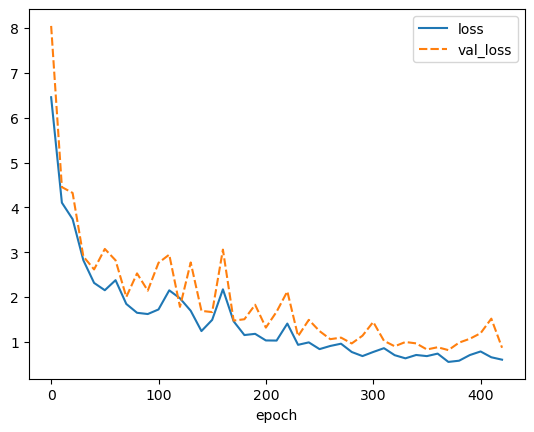

best weights loaded


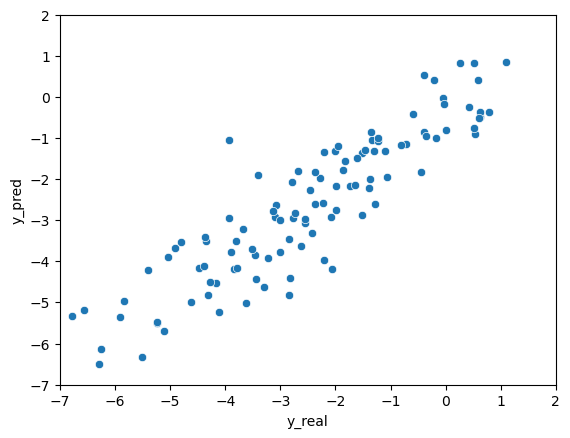

elapsed time: 112.64762020111084
run: 174
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560620AF0>, <torch.utils.data.dataset.Subset object at 0x00000155619AE550>, <torch.utils.data.dataset.Subset object at 0x00000155619AE460>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.698603296279908 | Validation Loss 6.3598713874816895
Epoch 10 | Train Loss 3.791662343343099 | Validation Loss 5.000193357467651
Epoch 20 | Train Loss 3.3058355967203776 | Validation Loss 4.667977809906006
Epoch 30 | Train Loss 3.005198582013448 | Validation Loss 3.2461745738983154
Epoch 40 | Train Loss 2.2474445581436155 | Validation Loss 2.9470962285995483
Epoch 50 | Train Loss 1.861343757311503 | Validation Loss 2.3231589794158936
Epoch 60 | Train Loss 2.095901338259379 | Validation Loss 2.348474383354187
Epoch 70 | Train Loss 1.888804300626119 | Validation Loss 1.9689000248908997
Epoch 80 | Train Loss 1.682175056139628 | Validation Loss 2.0132501125335693
Epoch 90 | Train Loss 1.5206753452618917 | Validation Loss 1.961235523223877
Epoch 100 | Train Loss 1.338003897666931 | Validation Loss 1.5754444599151611
Epoch 110 | Train Loss 1.496083680788676 | Validation Loss 1.5190632343292236
Epoch 120 | Train Loss 1.149317995707194 | Validation Loss 1.51613026857376

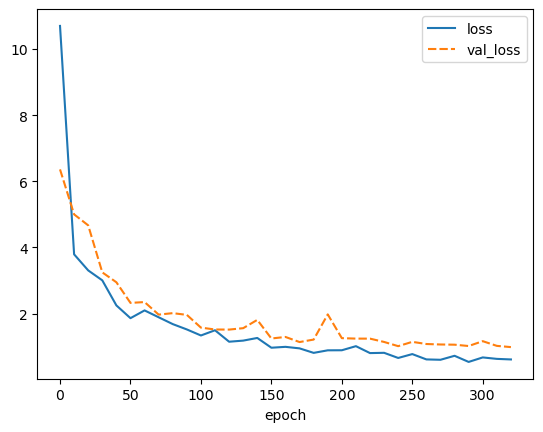

best weights loaded


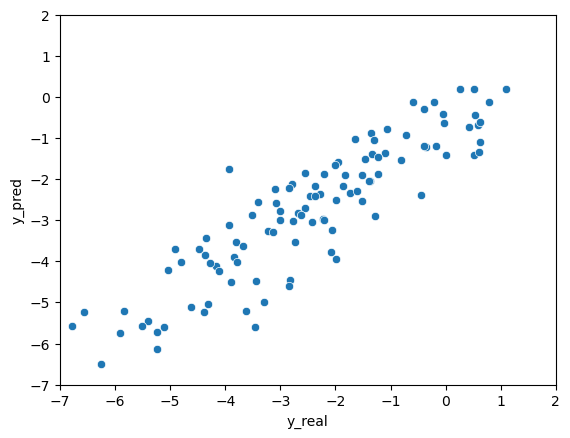

elapsed time: 89.191171169281
run: 175
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155605D4550>, <torch.utils.data.dataset.Subset object at 0x000001556185F250>, <torch.utils.data.dataset.Subset object at 0x000001556185FC70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.402416292826334 | Validation Loss 5.796682119369507
Epoch 10 | Train Loss 4.271765168507894 | Validation Loss 5.538106203079224
Epoch 20 | Train Loss 3.830498774846395 | Validation Loss 5.015340089797974
Epoch 30 | Train Loss 4.013517777125041 | Validation Loss 4.9426000118255615
Epoch 40 | Train Loss 3.7686387221018474 | Validation Loss 4.549952268600464
Epoch 50 | Train Loss 3.5234331925710043 | Validation Loss 4.230804920196533
Epoch 60 | Train Loss 3.3986038684844972 | Validation Loss 4.860515356063843
Epoch 70 | Train Loss 3.5001672903696694 | Validation Loss 4.3273866176605225
Epoch 80 | Train Loss 3.289801502227783 | Validation Loss 4.474488139152527
Epoch 90 | Train Loss 2.9318446636199953 | Validation Loss 3.934613585472107
Epoch 100 | Train Loss 2.8759045362472535 | Validation Loss 3.390773892402649
Epoch 110 | Train Loss 2.86140988667806 | Validation Loss 3.2706485986709595
Epoch 120 | Train Loss 2.931028801202774 | Validation Loss 3.3878389596939087
E

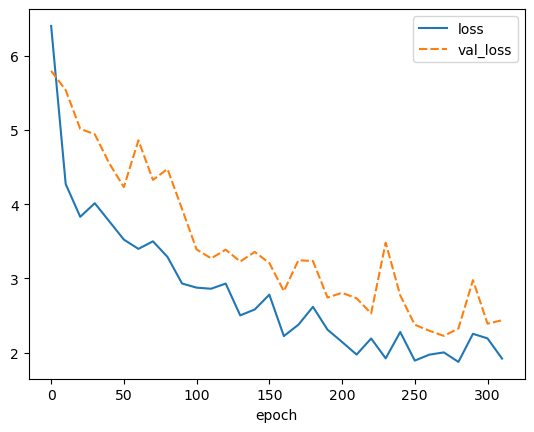

best weights loaded


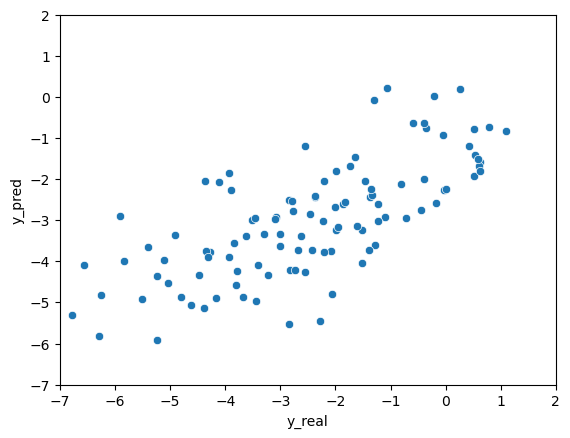

elapsed time: 95.338210105896
run: 176
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155618A1E80>, <torch.utils.data.dataset.Subset object at 0x0000015560689B50>, <torch.utils.data.dataset.Subset object at 0x0000015560689A90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.952511787414551 | Validation Loss 6.094408273696899
Epoch 10 | Train Loss 5.607368771235148 | Validation Loss 5.8830859661102295
Epoch 20 | Train Loss 4.084755341211955 | Validation Loss 5.906744480133057
Epoch 30 | Train Loss 4.010651810963949 | Validation Loss 4.820699453353882
Epoch 40 | Train Loss 3.923128906885783 | Validation Loss 5.383610963821411
Epoch 50 | Train Loss 4.130678033828735 | Validation Loss 6.120000123977661
Epoch 60 | Train Loss 3.624528694152832 | Validation Loss 4.514446139335632
Epoch 70 | Train Loss 3.6343125025431315 | Validation Loss 4.611339688301086
Epoch 80 | Train Loss 3.593103535970052 | Validation Loss 4.169668912887573
Epoch 90 | Train Loss 3.0328593254089355 | Validation Loss 4.806286573410034
Epoch 100 | Train Loss 3.317219877243042 | Validation Loss 3.871591329574585
Epoch 110 | Train Loss 3.0100121021270754 | Validation Loss 3.4887683391571045
Epoch 120 | Train Loss 2.795773243904114 | Validation Loss 3.4136348962783813
Epoc

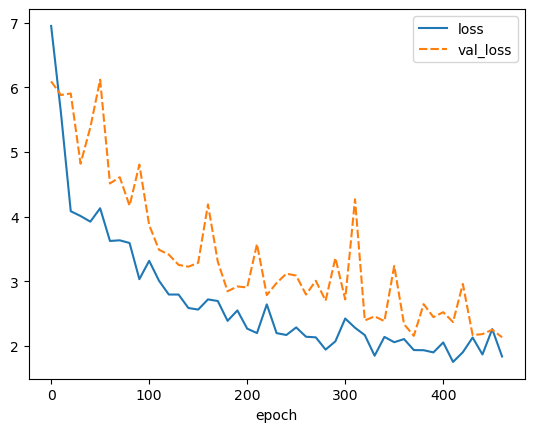

best weights loaded


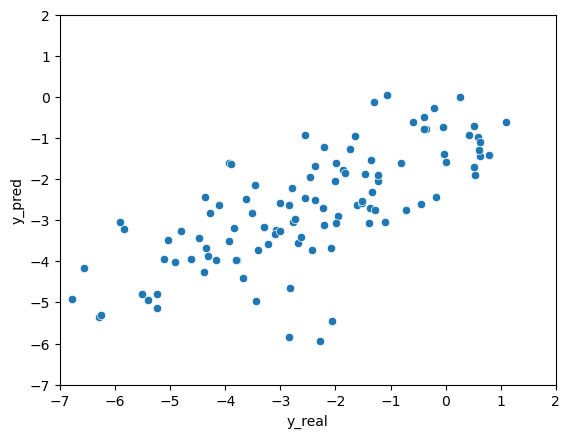

elapsed time: 150.219069480896
run: 177
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000155607C0370>, <torch.utils.data.dataset.Subset object at 0x00000155604DD790>, <torch.utils.data.dataset.Subset object at 0x00000155604DDC70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 12.815871461232502 | Validation Loss 12.582769393920898
Epoch 10 | Train Loss 4.9045319080352785 | Validation Loss 6.346946477890015
Epoch 20 | Train Loss 4.10074470837911 | Validation Loss 5.23908257484436
Epoch 30 | Train Loss 3.9301485697428387 | Validation Loss 4.867844581604004
Epoch 40 | Train Loss 4.245464722315471 | Validation Loss 5.159013748168945
Epoch 50 | Train Loss 3.583385403951009 | Validation Loss 4.539860963821411
Epoch 60 | Train Loss 3.337964089711507 | Validation Loss 4.297020673751831
Epoch 70 | Train Loss 3.7930018107096353 | Validation Loss 4.560171604156494
Epoch 80 | Train Loss 3.179055094718933 | Validation Loss 3.825789213180542
Epoch 90 | Train Loss 3.266901890436808 | Validation Loss 4.94488525390625
Epoch 100 | Train Loss 3.3923865000406903 | Validation Loss 3.6384161710739136
Epoch 110 | Train Loss 3.1647992293039957 | Validation Loss 4.182088494300842
Epoch 120 | Train Loss 3.053962548573812 | Validation Loss 3.515044927597046
Epoch

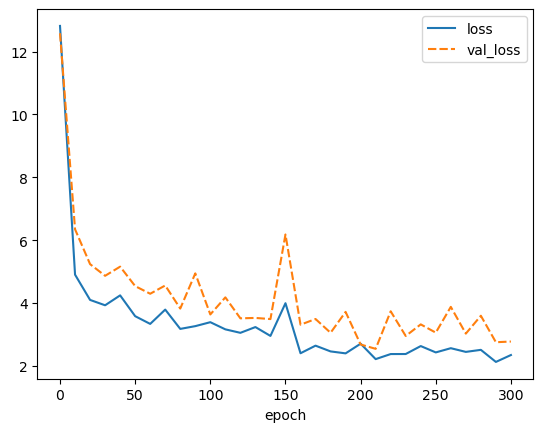

best weights loaded


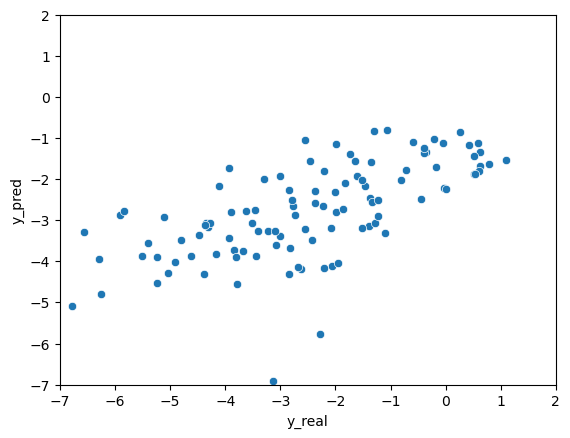

elapsed time: 109.77321696281433
run: 178
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001556072B3D0>, <torch.utils.data.dataset.Subset object at 0x0000015561A82CD0>, <torch.utils.data.dataset.Subset object at 0x0000015561A823D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.100070254007976 | Validation Loss 5.802511930465698
Epoch 10 | Train Loss 4.685818926493327 | Validation Loss 5.376327276229858
Epoch 20 | Train Loss 4.088451520601908 | Validation Loss 5.752236843109131
Epoch 30 | Train Loss 4.167661412556966 | Validation Loss 5.054728031158447
Epoch 40 | Train Loss 3.9903743743896483 | Validation Loss 5.282113790512085
Epoch 50 | Train Loss 4.222334067026774 | Validation Loss 5.131551027297974
Epoch 60 | Train Loss 3.8819450696309405 | Validation Loss 5.454524278640747
Epoch 70 | Train Loss 3.530622371037801 | Validation Loss 4.687965273857117
Epoch 80 | Train Loss 3.672563139597575 | Validation Loss 4.445064067840576
Epoch 90 | Train Loss 3.572020085652669 | Validation Loss 4.152432799339294
Epoch 100 | Train Loss 3.09731449286143 | Validation Loss 4.712228536605835
Epoch 110 | Train Loss 3.2098268429438273 | Validation Loss 3.7786136865615845
Epoch 120 | Train Loss 3.174138832092285 | Validation Loss 3.4262698888778687
Epoch 

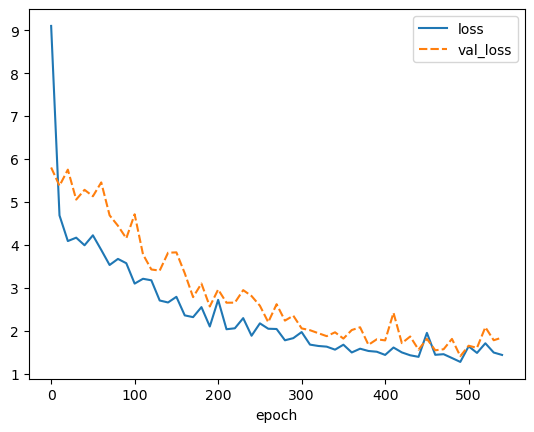

best weights loaded


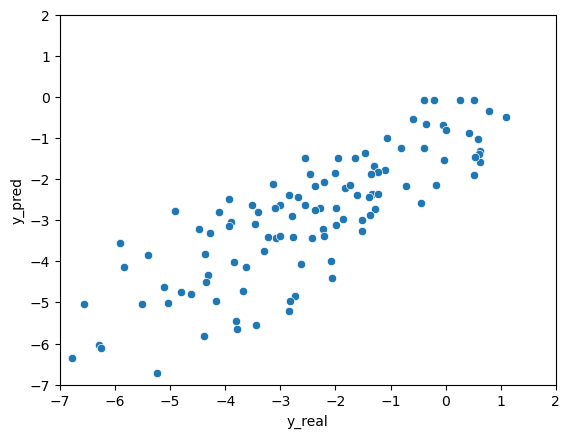

elapsed time: 163.6886866092682
run: 179
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000001555D73D550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000015560608340>, <torch.utils.data.dataset.Subset object at 0x00000155D5B18FA0>, <torch.utils.data.dataset.Subset object at 0x00000155D5B18C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.629276116689047 | Validation Loss 6.947945833206177
Epoch 10 | Train Loss 3.569296455383301 | Validation Loss 5.022623538970947
Epoch 20 | Train Loss 3.225891335805257 | Validation Loss 3.8978753089904785
Epoch 30 | Train Loss 2.6248308261235556 | Validation Loss 3.2642630338668823
Epoch 40 | Train Loss 2.384189959367116 | Validation Loss 2.9081629514694214
Epoch 50 | Train Loss 2.1148485422134398 | Validation Loss 2.6697123050689697
Epoch 60 | Train Loss 2.069341278076172 | Validation Loss 2.411096751689911
Epoch 70 | Train Loss 1.9421499013900756 | Validation Loss 2.380217432975769
Epoch 80 | Train Loss 1.9065175771713256 | Validation Loss 1.9710568189620972
Epoch 90 | Train Loss 1.6408658067385355 | Validation Loss 1.940971553325653
Epoch 100 | Train Loss 2.403095555305481 | Validation Loss 1.9368699789047241
Epoch 110 | Train Loss 1.5046319643656412 | Validation Loss 1.9358254671096802
Epoch 120 | Train Loss 1.8023052612940471 | Validation Loss 2.479641437530

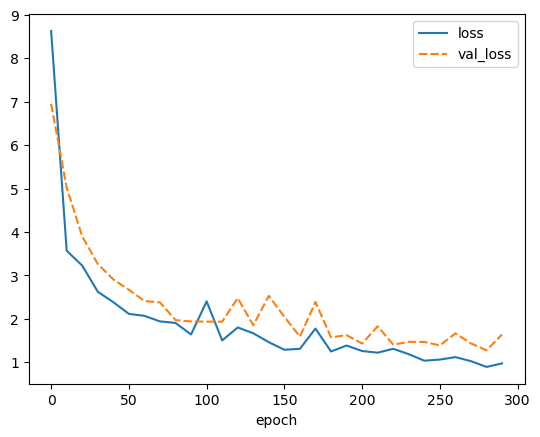

best weights loaded


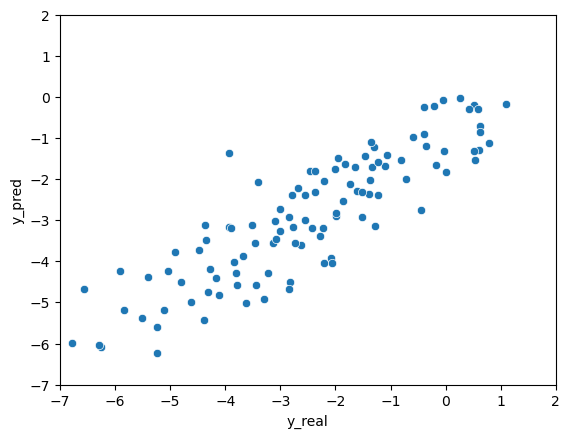

elapsed time: 88.55418872833252


In [13]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])

        permute_index=combination_dict["permute_layer_list"]
        pre_act_permute_gcn=combination_dict["pre_act_permute_gcn_list"]
        post_act_permute_gcn=combination_dict["post_act_permute_gcn_list"]
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
            #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate, permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names

        save_dict["permute_index"] = permute_index
        save_dict["pre_act_permute_gcn"] = pre_act_permute_gcn
        save_dict["post_act_permute_gcn"] = post_act_permute_gcn


    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp



    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    